Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!

  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github


# CoronaVirus Prediction

### Number of Day to Predict 63

In [1]:
%autosave 360

Autosaving every 360 seconds


In [2]:
num_days_R_prediction=63

In [3]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [4]:
%%R
max_days_prediction<-num_days_R_prediction

In [5]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=27 # =(6/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020
#
max_countries_map=50
#
## DROP_N=15 => 06/02
## DROP_N=45 => 08/03
## DROP_N=75 => 07/04
## DROP_N=145 => 15/06
## DROP_N=175 => 15/07
#
drop_n_dataset_days=235
#

### Load Data from Github - John Hopkins Institute 

In [6]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [7]:
confirmed.iloc[:,:]

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
244                                           NaN             Timor-Leste   
245                                           NaN                    Togo   
246                                           NaN     Trinidad and Tobago   
247                                           NaN                 Tunisia   
248                                           NaN                  Turkey   
249                                           NaN           United States   
250                                           NaN                  Uganda   
251                                           NaN                 Ukraine   
252                                           NaN    United Arab Emirates   
253                                      Anguilla          United Kingdom   
254                                       Bermuda          United Kingdom   
255                        British Virgin Islands          United Kingdom   
256                                Cayman Islands          United Kingdom   
257                               Channel Islands          United Kingdom   
258                   Falkland Islands (Malvinas)          United Kingdom   
259                                     Gibraltar          United Kingdom   
260                                   Isle of Man          United Kingdom   
261                                    Montserrat          United Kingdom   
262  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
263                      Turks and Caicos Islands          United Kingdom   
264                            

## Get Population

In [8]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [9]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
250                                           NaN             Timor-Leste   
251                                           NaN                    Togo   
252                                           NaN     Trinidad and Tobago   
253                                           NaN                 Tunisia   
254                                           NaN                  Turkey   
255                                           NaN           United States   
256                                           NaN                  Uganda   
257                                           NaN                 Ukraine   
258                                           NaN    United Arab Emirates   
259                                      Anguilla          United Kingdom   
260                                       Bermuda          United Kingdom   
261                        British Virgin Islands          United Kingdom   
262                                Cayman Islands          United Kingdom   
263                               Channel Islands          United Kingdom   
264                   Falkland Islands (Malvinas)          United Kingdom   
265                                     Gibraltar          United Kingdom   
266                                   Isle of Man          United Kingdom   
267                                    Montserrat          United Kingdom   
268  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
269                      Turks and Caicos Islands          United Kingdom   
270                            

In [10]:
# merge region death
death.iloc[185:195,:]

Province/State Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN     Mauritania  21.007900  -10.940800        0        0   
186            NaN      Mauritius -20.348404   57.552152        0        0   
187            NaN         Mexico  23.634500 -102.552800        0        0   
188            NaN     Micronesia   7.425600  150.550800        0        0   
189            NaN        Moldova  47.411600   28.369900        0        0   
190            NaN         Monaco  43.733300    7.416700        0        0   
191            NaN       Mongolia  46.862500  103.846700        0        0   
192            NaN     Montenegro  42.708678   19.374390        0        0   
193            NaN        Morocco  31.791700   -7.092600        0        0   
194            NaN     Mozambique -18.665695   35.529562        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/6/21  3/7/21  3/8/21  3/9/21  \
185        0        0        0        0  ...     442     442     442     442   
186        0        0        0        0  ...      10      10      10      10   
187        0        0        0        0  ...  190357  190604  190923  191789   
188        0        0        0        0  ...       0       0       0       0   
189        0        0        0        0  ...    4091    4111    4129    4150   
190        0        0        0        0  ...      26      26      26      26   
191        0        0        0        0  ...       2       2       3       3   
192        0        0        0        0  ...    1059    1067    1085    1092   
193        0        0        0        0  ...    8676    8682    8683    8695   
194        0        0        0        0  ...     686     693     698     700   

     3/10/21  3/11/21  3/12/21  3/13/21   Population           region  
185      442      442      442      443     4,649,658  Mauritania_nan  
186       10       10       10       10           NaN   Mauritius_nan  
187   192491   193152   193851   194490   128,640,794      Mexico_nan  
188        0        0        0        0           NaN  Micronesia_nan  
189     4183     4220     4258     4294     4,035,942     Moldova_nan  
190       26       26       27       27        39,183      Monaco_nan  
191        3        4        4        4     3,278,290    Mongolia_nan  
192     1100     1113     1117     1122       622 500  Montenegro_nan  
193     8705     8712     8716     8718    36,817,128     Morocco_nan  
194      707      711      719      722    31,542,919  Mozambique_nan  

[10 rows x 423 columns]

In [11]:
# merge region recover
recover.iloc[175:185,:]

Province/State Country/Region        Lat      Long  \
175                               NaN     Montenegro  42.708678  19.37439   
176                               NaN        Morocco  31.791700  -7.09260   
177                               NaN     Mozambique -18.665700  35.52960   
178                               NaN        Namibia -22.957600  18.49040   
179                               NaN          Nepal  28.166700  84.25000   
180                             Aruba    Netherlands  12.521100 -69.96830   
181  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400 -68.23850   
182                           Curacao    Netherlands  12.169600 -68.99000   
183                      Sint Maarten    Netherlands  18.042500 -63.05480   
184                               NaN    Netherlands  52.132600   5.29130   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/6/21  \
175        0        0        0        0        0        0  ...   69209   
176        0        0        0        0        0        0  ...  471919   
177        0        0        0        0        0        0  ...   46294   
178        0        0        0        0        0        0  ...   37366   
179        0        0        0        0        0        0  ...  270828   
180        0        0        0        0        0        0  ...    7811   
181        0        0        0        0        0        0  ...     180   
182        0        0        0        0        0        0  ...    4671   
183        0        0        0        0        0        0  ...    2025   
184        0        0        0        0        0        0  ...       0   

     3/7/21  3/8/21  3/9/21  3/10/21  3/11/21  3/12/21  3/13/21   Population   \
175   69645   70137   70648    71233    71864    72490    72944       622 500   
176  472240  472544  473208   473738   474257   474938   475457    36,817,128   
177   46421   46594   47729    48451    48616    48938    49814    31,542,919   
178   37520   37578   37893    38043    38104    38217    38264     2,540,905   
179  270886  270927  270987   271050   271116   271177   271249    29,300,000   
180    7828    7828    7893     7929     7974     8009     8028       116,600   
181     180     180     180      180      180      180      180           NaN   
182    4673    4677    4682     4686     4688     4698     4705       158,665   
183    2025    2028    2031     2034     2035     2041     2041           NaN   
184       0       0       0        0        0        0        0    17,180,000   

                                           region  
175                                Montenegro_nan  
176                                   Morocco_nan  
177                                Mozambique_nan  
178                                   Namibia_nan  
179                                     Nepal_nan  
180                             Netherlands_Aruba  
181  Netherlands_Bonaire, Sint Eustatius and Saba  
182                           Netherlands_Curacao  
183                      Netherlands_Sint Maarten  
184                               Netherlands_nan  

[10 rows x 423 columns]

In [12]:
confirmed.iloc[185:195,:]

Province/State Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN     Mauritania  21.007900  -10.940800        0        0   
186            NaN      Mauritius -20.348404   57.552152        0        0   
187            NaN         Mexico  23.634500 -102.552800        0        0   
188            NaN     Micronesia   7.425600  150.550800        0        0   
189            NaN        Moldova  47.411600   28.369900        0        0   
190            NaN         Monaco  43.733300    7.416700        0        0   
191            NaN       Mongolia  46.862500  103.846700        0        0   
192            NaN     Montenegro  42.708678   19.374390        0        0   
193            NaN        Morocco  31.791700   -7.092600        0        0   
194            NaN     Mozambique -18.665695   35.529562        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...   3/6/21   3/7/21   3/8/21  \
185        0        0        0        0  ...    17309    17322    17340   
186        0        0        0        0  ...      639      641      641   
187        0        0        0        0  ...  2125866  2128600  2130477   
188        0        0        0        0  ...        1        1        1   
189        0        0        0        0  ...   194605   195252   195602   
190        0        0        0        0  ...     2019     2023     2028   
191        0        0        0        0  ...     3228     3336     3372   
192        0        0        0        0  ...    79237    79774    80191   
193        0        0        0        0  ...   485974   486223   486325   
194        0        0        0        0  ...    62131    62520    62703   

      3/9/21  3/10/21  3/11/21  3/12/21  3/13/21   Population           region  
185    17365    17385    17394    17410    17424     4,649,658  Mauritania_nan  
186      641      641      664      711      739           NaN   Mauritius_nan  
187  2137884  2144486  2150955  2157771  2163875   128,640,794      Mexico_nan  
188        1        1        1        1        1           NaN  Micronesia_nan  
189   196475   198228   200124   201909   203710     4,035,942     Moldova_nan  
190     2048     2062     2075     2097     2106        39,183      Monaco_nan  
191     3481     3481     3664     3833     3961     3,278,290    Mongolia_nan  
192    80803    81457    82029    82610    83165       622 500  Montenegro_nan  
193   486833   487286   487750   488181   488632    36,817,128     Morocco_nan  
194    62882    63174    63645    64004    64296    31,542,919  Mozambique_nan  

[10 rows x 423 columns]

In [13]:
confirmed.iloc[220:230,:]

Province/State                    Country/Region        Lat        Long  \
220            NaN                            Rwanda  -1.940300   29.873900   
221            NaN             Saint Kitts and Nevis  17.357822  -62.782998   
222            NaN                       Saint Lucia  13.909400  -60.978900   
223            NaN  Saint Vincent and the Grenadines  12.984300  -61.287200   
224            NaN                             Samoa -13.759000 -172.104600   
225            NaN                        San Marino  43.942400   12.457800   
226            NaN             Sao Tome and Principe   0.186400    6.613100   
227            NaN                      Saudi Arabia  23.885942   45.079162   
228            NaN                           Senegal  14.497400  -14.452400   
229            NaN                            Serbia  44.016500   21.005900   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/6/21  \
220        0        0        0        0        0        0  ...   19509   
221        0        0        0        0        0        0  ...      41   
222        0        0        0        0        0        0  ...    3843   
223        0        0        0        0        0        0  ...    1645   
224        0        0        0        0        0        0  ...       3   
225        0        0        0        0        0        0  ...    3922   
226        0        0        0        0        0        0  ...    1944   
227        0        0        0        0        0        0  ...  379474   
228        0        0        0        0        0        0  ...   35632   
229        0        0        0        0        0        0  ...  482397   

     3/7/21  3/8/21  3/9/21  3/10/21  3/11/21  3/12/21  3/13/21   Population   \
220   19551   19659   19779    19846    19945    20057    20143    12,952,218   
221      41      41      41       41       42       42       43           NaN   
222    3866    3871    3902     3941     3966     3989     3989       184,106   
223    1663    1663    1663     1670     1674     1674     1680       110,940   
224       3       3       3        3        3        3        3           NaN   
225    3922    3935    3984     4030     4062     4096     4126        33,916   
226    1950    1961    1977     2010     2035     2057     2078           NaN   
227  379831  380182  380572   380958   381348   381708   382059    34,695,447   
228   35857   35959   36039    36195    36371    36569    36726    16,743,927   
229  485439  489530  494106   498696   503291   507959   512051     8,744,671   

                                   region  
220                            Rwanda_nan  
221             Saint Kitts and Nevis_nan  
222                       Saint Lucia_nan  
223  Saint Vincent and the Grenadines_nan  
224                             Samoa_nan  
225                        San Marino_nan  
226             Sao Tome and Principe_nan  
227                      Saudi Arabia_nan  
228                           Senegal_nan  
229                            Serbia_nan  

[10 rows x 423 columns]

## Create Time Series + Plots

In [14]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [15]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [16]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

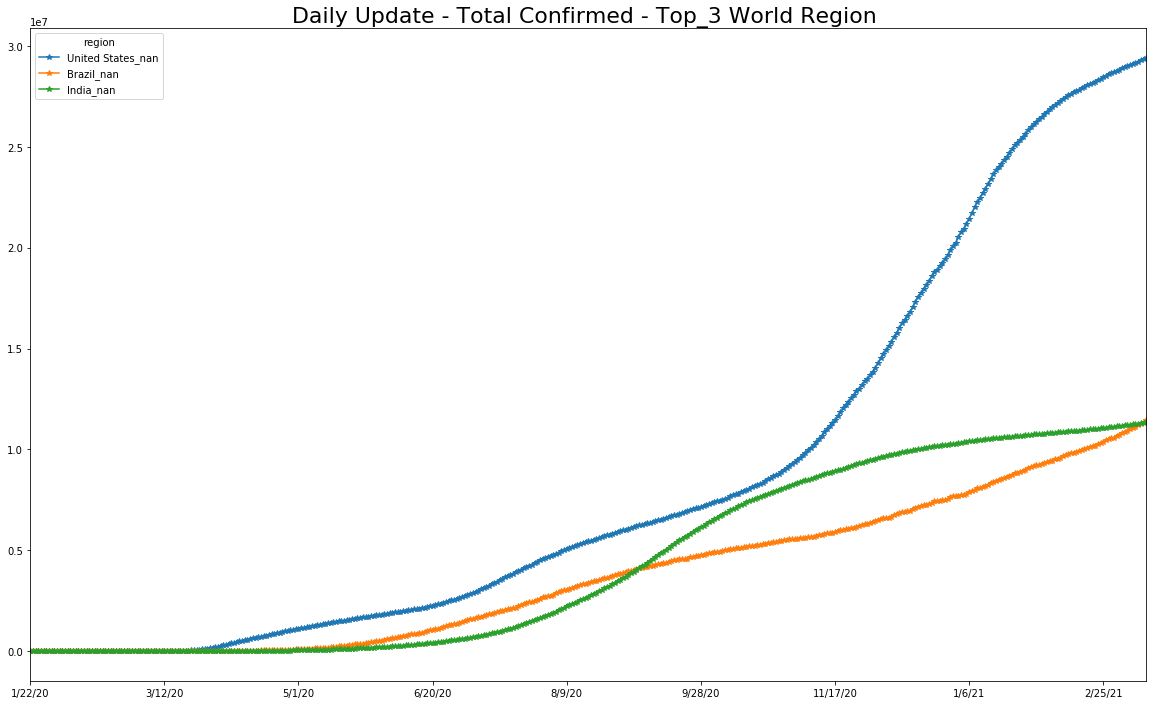

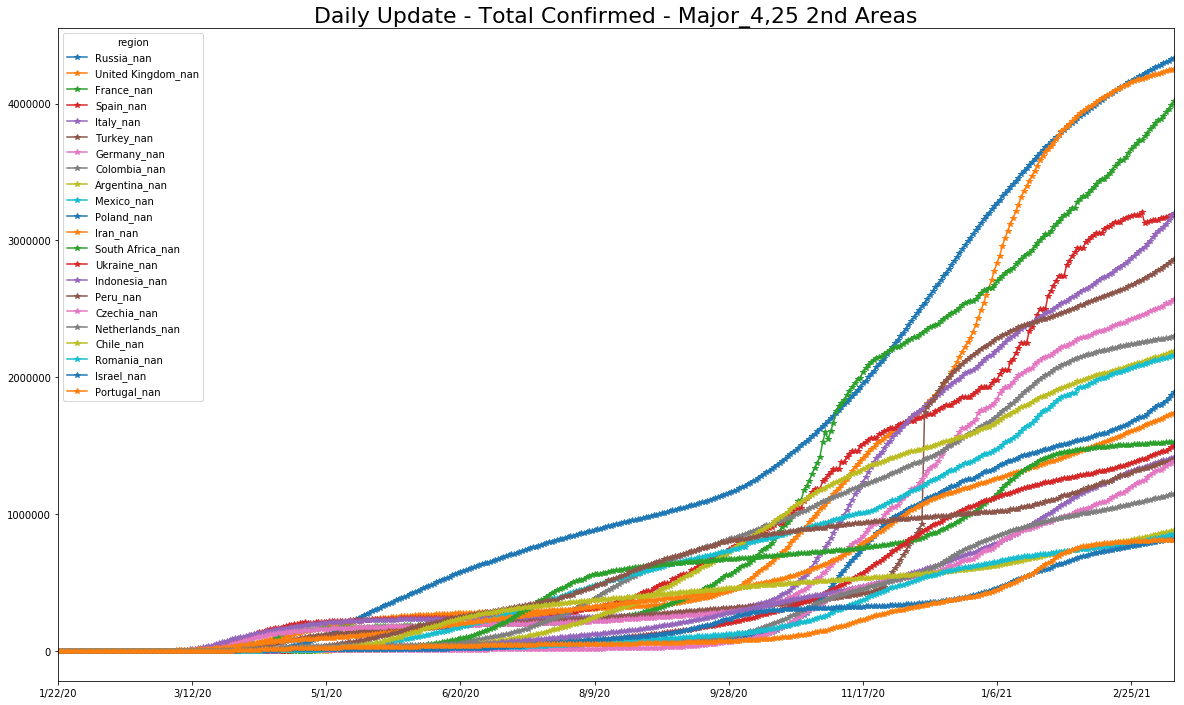

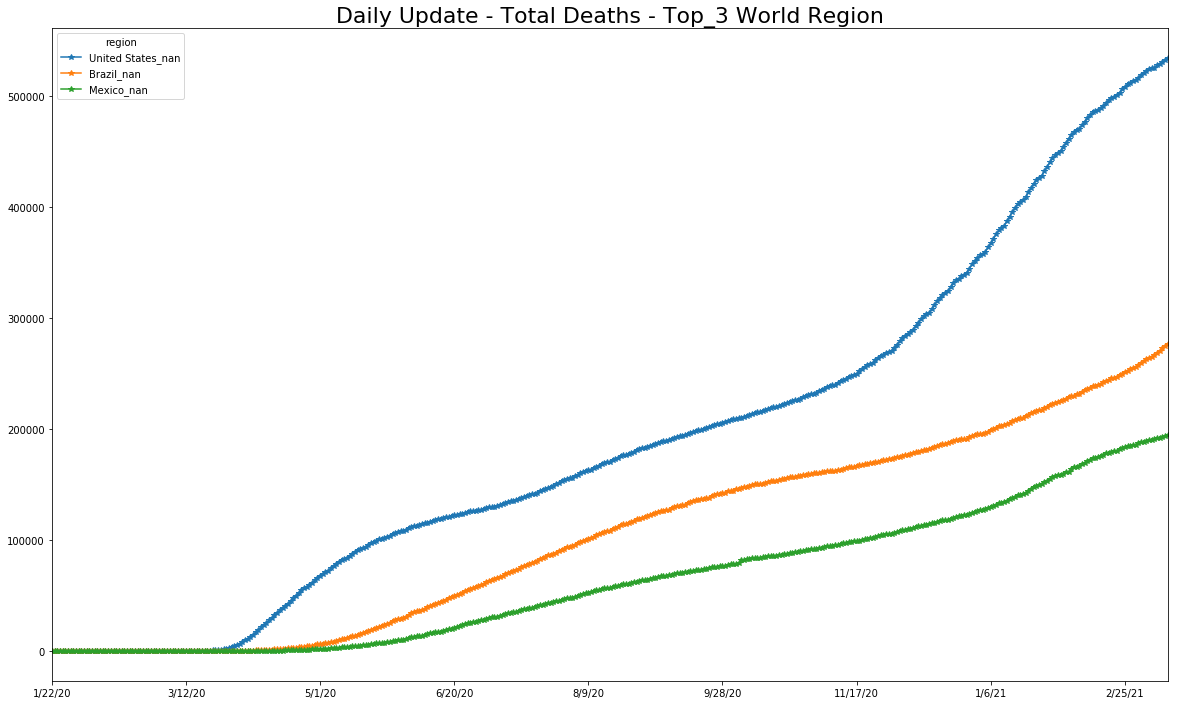

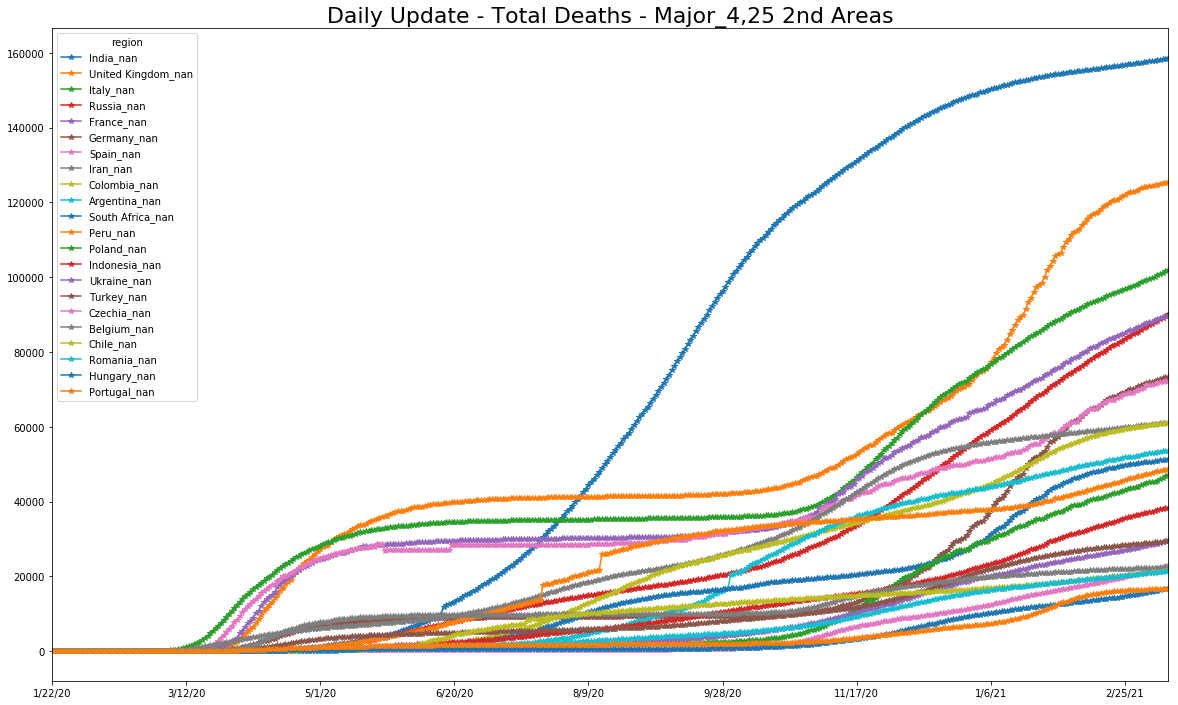

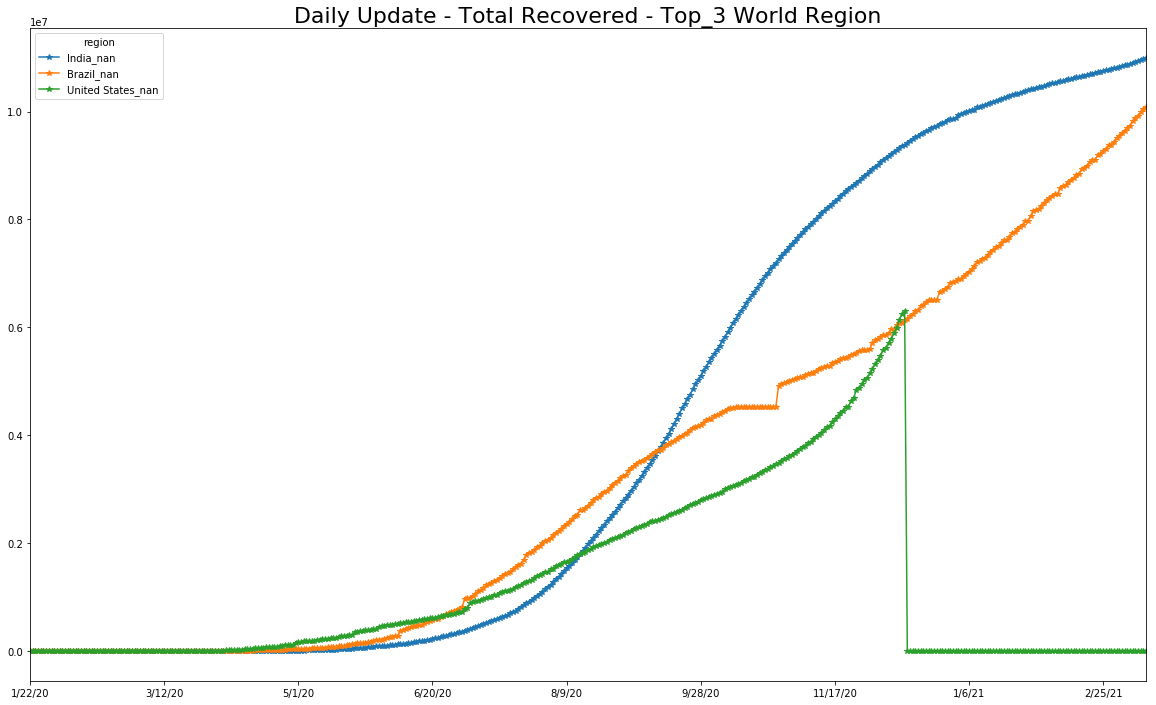

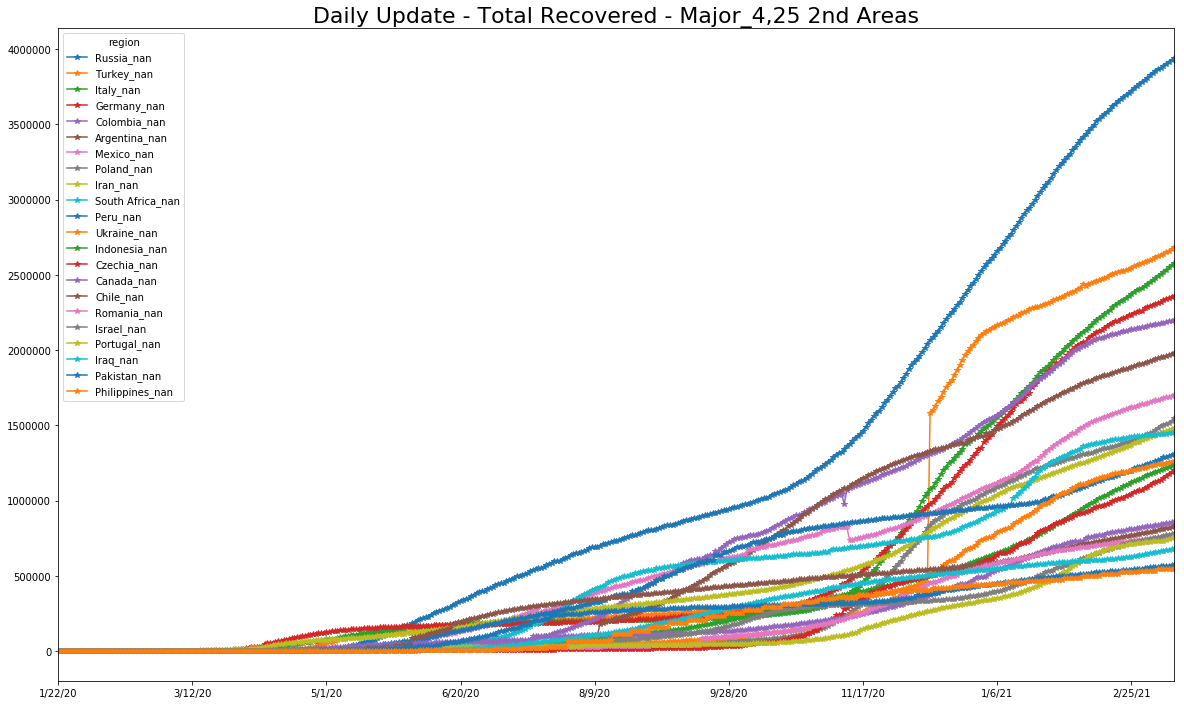

In [17]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [18]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime

#
api_key="29d9e51c56b94621b16297bcdeee9c4d" # hxj@mail.xcom
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [19]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [20]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2021/03/14


In [21]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [22]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [23]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!
#
## DROP_N=75 => 07/04

drop_n=drop_n_dataset_days

ts=ts[drop_n:]
ts_d=ts_d[drop_n:]
ts_rec=ts_rec[drop_n:]

In [24]:
ts[:3]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
9/13/20            38716        11353        48254         1344        3388   
9/14/20            38772        11520        48496         1438        3439   
9/15/20            38815        11672        48734         1438        3569   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
9/13/20                       95         555537        45862   
9/14/20                       95         565446        45969   
9/15/20                       95         577338        46119   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
9/13/20                                     113                       4170   
9/14/20                                     113                       4177   
9/15/20                                     113                       4185   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
9/13/20  ...            6522802         1808           47287            0   
9/14/20  ...            6557228         1812           47836            0   
9/15/20  ...            6596784         1827           48429            0   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
9/13/20          60540         1063                   30574       2011   
9/14/20          61569         1063                   31362       2013   
9/15/20          62655         1063                   32250       2016   

region   Zambia_nan  Zimbabwe_nan  
9/13/20       13539          7526  
9/14/20       13720          7531  
9/15/20       13819          7576  

[3 rows x 274 columns]

In [25]:
ts[-4:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
3/10/21            55894       114840       114681        11130       21161   
3/11/21            55917       115442       114851        11130       21205   
3/12/21            55959       116123       115008        11199       21265   
3/13/21            55959       116821       115143        11228       21323   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
3/10/21                      882        2169694       175538   
3/11/21                      882        2177898       176286   
3/12/21                      945        2185747       177104   
3/13/21                      962        2192025       177899   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
3/10/21                                     123                       5226   
3/11/21                                     123                       5234   
3/12/21                                     123                       5234   
3/13/21                                     123                       5237   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
3/10/21  ...           29223730        66484           80268            3   
3/11/21  ...           29286134        67717           80392            3   
3/12/21  ...           29347338        69074           80392            3   
3/13/21  ...           29399980        70133           80481            3   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
3/10/21         143321         2529                  202378       2627   
3/11/21         144277         2533                  203669       2667   
3/12/21         144786         2550                  205652       2729   
3/13/21         145379         2553                  207436       2771   

region   Zambia_nan  Zimbabwe_nan  
3/10/21       83333         36341  
3/11/21       83913         36377  
3/12/21       84240         36423  
3/13/21       84474         36471  

[4 rows x 274 columns]

In [26]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [27]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [28]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [29]:
p=%R pred_all

In [30]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [31]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [32]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [33]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [34]:
w_in_model.tail(2)

date       region   min   max
8379 2020-05-10  Vietnam_nan  26.9  33.0
8380 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [35]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [36]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [37]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
1     2020-09-14  Afghanistan_nan      38772             0             0   
2     2020-09-15  Afghanistan_nan      38815            56             0   
3     2020-09-16  Afghanistan_nan      38855            43             0   
4     2020-09-17  Afghanistan_nan      38872            40           139   
5     2020-09-18  Afghanistan_nan      38897            17           100   
6     2020-09-19  Afghanistan_nan      38919            25            82   
7     2020-09-20  Afghanistan_nan      39044            22            64   
8     2020-09-21  Afghanistan_nan      39074           125           172   
9     2020-09-22  Afghanistan_nan      39096            30           177   
10    2020-09-23  Afghanistan_nan      39145            22           177   
11    2020-09-24  Afghanistan_nan      39170            49           101   
12    2020-09-25  Afghanistan_nan      39186            25            96   
13    2020-09-26  Afghanistan_nan      39192            16            90   
14    2020-09-27  Afghanistan_nan      39227             6            47   
15    2020-09-28  Afghanistan_nan      39239            35            57   
16    2020-09-29  Afghanistan_nan      39254            12            53   
17    2020-09-30  Afghanistan_nan      39268            15            62   
18    2020-10-01  Afghanistan_nan      39285            14            41   
19    2020-10-02  Afghanistan_nan      39290            17            46   
20    2020-10-03  Afghanistan_nan      39297             5            36   
21    2020-10-04  Afghanistan_nan      39341             7            29   
22    2020-10-05  Afghanistan_nan      39422            44            56   
23    2020-10-06  Afghanistan_nan      39486            81           132   
24    2020-10-07  Afghanistan_nan      39548            64           189   
25    2020-10-08  Afghanistan_nan      39616            62           207   
26    2020-10-09  Afghanistan_nan      39693            68           194   
27    2020-10-10  Afghanistan_nan      39703            77           207   
28    2020-10-11  Afghanistan_nan      39799            10           155   
29    2020-10-12  Afghanistan_nan      39870            96           183   
30    2020-10-13  Afghanistan_nan      39928            71           177   
...          ...              ...        ...           ...           ...   
51210 2021-02-13     Zimbabwe_nan      35104           181           264   
51211 2021-02-14     Zimbabwe_nan      35172            59           240   
51212 2021-02-15     Zimbabwe_nan      35222            68           308   
51213 2021-02-16     Zimbabwe_nan      35315            50           177   
51214 2021-02-17     Zimbabwe_nan      35423            93           211   
51215 2021-02-18     Zimbabwe_nan      35543           108           251   
51216 2021-02-19     Zimbabwe_nan      35710           120           321   
51217 2021-02-20     Zimbabwe_nan      35768           167           395   
51218 2021-02-21     Zimbabwe_nan      35796            58           345   
51219 2021-02-22     Zimbabwe_nan      35862            28           253   
51220 2021-02-23     Zimbabwe_nan      35910            66           152   
51221 2021-02-24     Zimbabwe_nan      35960            48           142   
51222 2021-02-25     Zimbabwe_nan      35994            50           164   
51223 2021-02-26     Zimbabwe_nan      36044            34           132   
51224 2021-02-27     Zimbabwe_nan      36058            50           134   
51225 2021-02-28     Zimbabwe_nan      36089            14            98   
51226 2021-03-01     Zimbabwe_nan      36115            31            95   
51227 2021-03-02     Zimbabwe_nan      36148            26            71   
51228 2021-03-03     Zimbabwe_nan      36179            33            90   
51229 2021-03-04     Zimbabwe_nan      36223            31            90   
51230 2021-03-05     Zimbabwe_nan      36248            44  

In [38]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [39]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
51239 2021-03-14  Zimbabwe_nan          0            48           130   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
51239           211         100.131812          100.35775         100.581936   

       last_day  kalman_prediction  population  infected_rate  min  max  
51239     36471            36485.0    14862924       0.000025  NaN  NaN

In [40]:
## JOAO - FIX Drop Duplicates
train=train.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
## JOAO - FIX Drop empty region='nan_nan'
train=train[train['region']!='nan_nan']
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
51239 2021-03-14  Zimbabwe_nan          0            48           130   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
51239           211         100.131812          100.35775         100.581936   

       last_day  kalman_prediction  population  infected_rate  min  max  
51239     36471            36485.0    14862924       0.000025  NaN  NaN

In [41]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
### Assumption : Each affected person can contact up to 9 others that not report or are assimptomatic COVID19 cases.
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=np.clip(ratiod['infected_rate']*900,0.0,1.0)
#
ratiod['delta : pred new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : pred new_cases per 1M hab']=ratiod['delta : pred new_cases']/ratiod['population']*1000000

### roling 7day_AVG
ratiod['delta : roling 7day AVG']=ratiod['7_day_change']/7
ratiod['delta : aprox 14-day case notification rate per 100k hab']=(ratiod['7_day_change']*2)/ratiod['population']*100000
###

ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})
ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)
ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
50139  2021-03-12  Zimbabwe_nan      36423            36            88   
50140  2021-03-13  Zimbabwe_nan      36471            46           102   
50141  2021-03-14  Zimbabwe_nan          0            48           130   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
50139           154         100.099089         100.242525         100.425172   
50140           175         100.126481         100.280857         100.482813   
50141           211         100.131812         100.357750         100.581936   

       confirmed_yesterday  ...  population  infected_rate  min  max  \
50139                36377  ...    14862924       0.000024  NaN  NaN   
50140                36423  ...    14862924       0.000025  NaN  NaN   
50141                36471  ...    14862924       0.000025  NaN  NaN   

       population_percentage : infected_rate confirmed  \
50139                                         0.002448   
50140                                         0.002451   
50141                                         0.002454   

       population_percentage : factor 9/10 infected_rate confirmed  \
50139                                           0.022028             
50140                                           0.022056             
50141                                           0.022085             

       delta : pred new_cases  delta : pred new_cases per 1M hab  \
50139                    15.0                           1.009223   
50140                    11.0                           0.740097   
50141                    14.0                           0.941941   

       delta : roling 7day AVG  \
50139                22.000000   
50140                25.000000   
50141                30.142857   

       delta : aprox 14-day case notification rate per 100k hab  
50139                                           2.072271         
50140                                           2.354853         
50141                                           2.839280         

[3 rows x 21 columns]

## Kalman 1 day Prediction with Evaluation

                region           mse          rmse       mae
264  United States_nan  4.774117e+12  2.184975e+06  194018.5


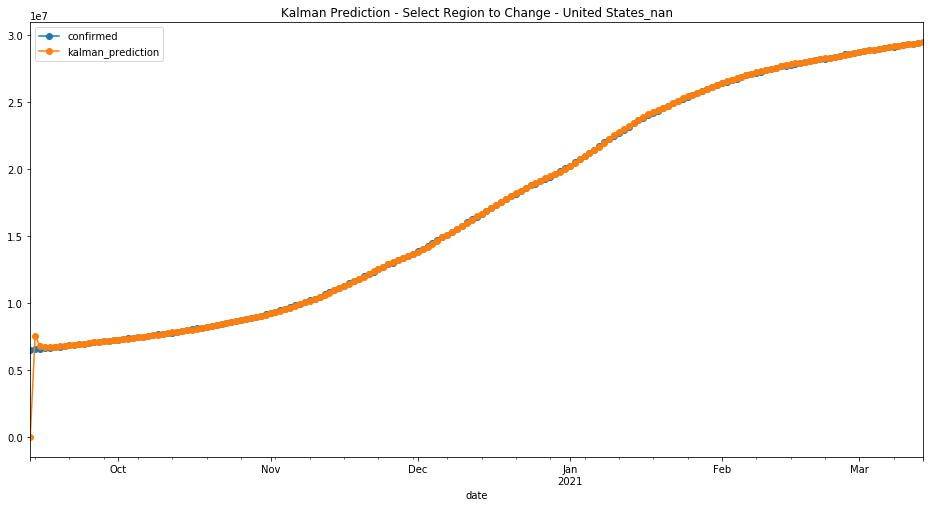

In [42]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse           rmse           mae
213  Russia_nan  1.037041e+11  322031.159845  26874.604396


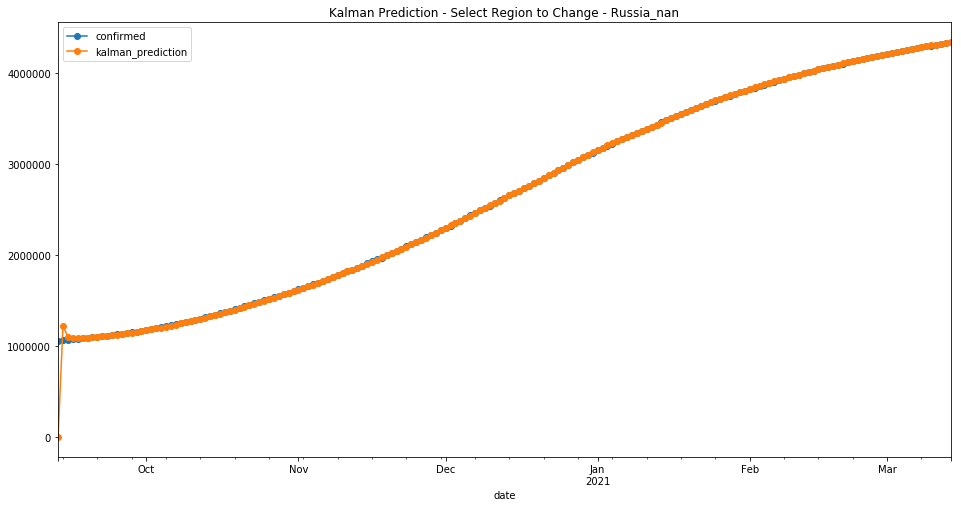

In [43]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse           rmse           mae
30  Brazil_nan  7.304007e+11  854634.849812  85030.076923


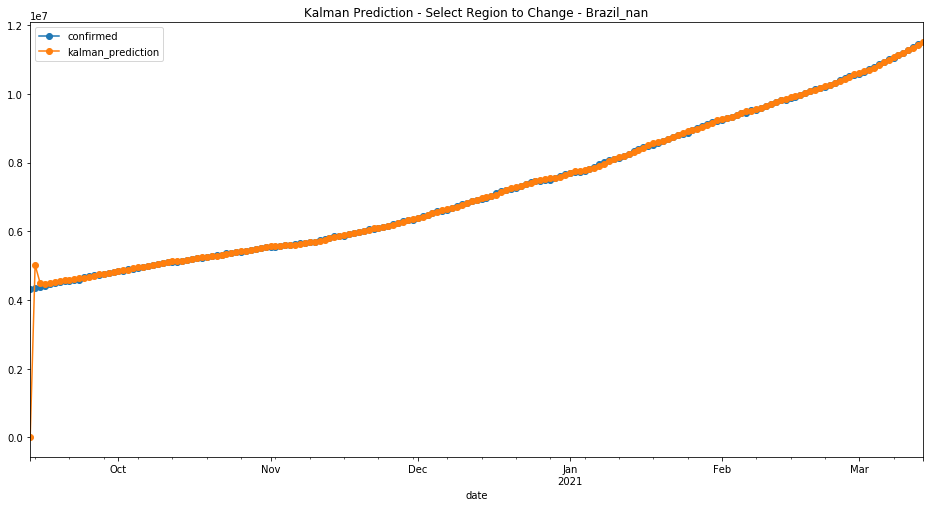

In [44]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse         rmse          mae
263  United Kingdom_nan  9.977020e+10  315864.2126  29324.28022


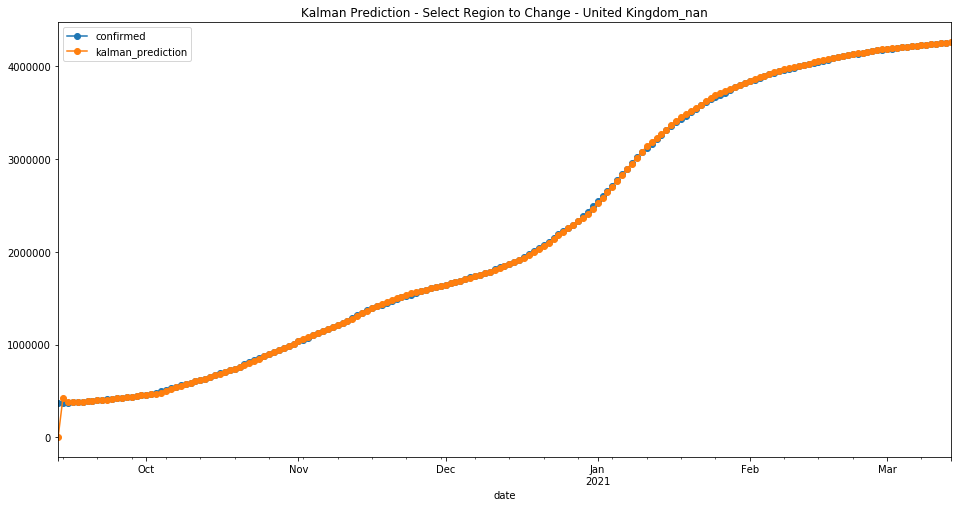

In [45]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [46]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpfj9z0e3i
  JVM stdout: /tmp/tmpfj9z0e3i/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpfj9z0e3i/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    2 years, 4 months and 15 days !!!
H2O cluster name:           H2O_from_python_unknownUser_a2wjst
H2O cluster total nodes:    1
H2O cluster free memory:    3.543 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.7 final
--------------------------  ----------------------------------------

In [47]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2021-02-15
last_train_date= 2021-03-13
first_bootstrap_date= 2021-03-05
boost_bootstrap_date= 2021-03-10
first_test_date= 2021-03-04
last_test_date= 2021-03-14
first_valid_date= 2021-03-12


In [48]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [49]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [50]:
pred2.iloc[:25]

0  confirmed       date           region
0    55972.0      55827 2021-03-05  Afghanistan_nan
1    56010.0      55840 2021-03-06  Afghanistan_nan
2    56033.0      55847 2021-03-07  Afghanistan_nan
3    56048.0      55876 2021-03-08  Afghanistan_nan
4    56069.0      55876 2021-03-09  Afghanistan_nan
5    56077.0      55894 2021-03-10  Afghanistan_nan
6    56091.0      55917 2021-03-11  Afghanistan_nan
7    56108.0      55959 2021-03-12  Afghanistan_nan
8    56147.0      55959 2021-03-13  Afghanistan_nan
9    56159.0          0 2021-03-14  Afghanistan_nan
10  111498.0     111301 2021-03-05      Albania_nan
11  112256.0     112078 2021-03-06      Albania_nan
12  113018.0     112897 2021-03-07      Albania_nan
13  113812.0     113580 2021-03-08      Albania_nan
14  114479.0     114209 2021-03-09      Albania_nan
15  115103.0     114840 2021-03-10      Albania_nan
16  115706.0     115442 2021-03-11      Albania_nan
17  116275.0     116123 2021-03-12      Albania_nan
18  116915.0     116821 2021-03-13      Albania_nan
19  117579.0          0 2021-03-14      Albania_nan
20  114076.0     113948 2021-03-05      Algeria_nan
21  114263.0     114104 2021-03-06      Algeria_nan
22  114422.0     114234 2021-03-07      Algeria_nan
23  114557.0     114382 2021-03-08      Algeria_nan
24  114703.0     114543 2021-03-09      Algeria_nan

In [51]:
pred2.iloc[175:195]

0  confirmed       date          region
175  237734.0     237775 2021-03-10  Azerbaijan_nan
176  238238.0     238383 2021-03-11  Azerbaijan_nan
177  238840.0     238959 2021-03-12  Azerbaijan_nan
178  239444.0     239692 2021-03-13  Azerbaijan_nan
179  240230.0          0 2021-03-14  Azerbaijan_nan
180    8777.0       8600 2021-03-05     Bahamas_nan
181    8746.0       8600 2021-03-06     Bahamas_nan
182    8804.0       8600 2021-03-07     Bahamas_nan
183    8807.0       8600 2021-03-08     Bahamas_nan
184    8799.0       8642 2021-03-09     Bahamas_nan
185    8738.0       8642 2021-03-10     Bahamas_nan
186    8847.0       8642 2021-03-11     Bahamas_nan
187    8851.0       8658 2021-03-12     Bahamas_nan
188    8816.0       8658 2021-03-13     Bahamas_nan
189    8856.0          0 2021-03-14     Bahamas_nan
190  125548.0     125514 2021-03-05     Bahrain_nan
191  126217.0     126126 2021-03-06     Bahrain_nan
192  126824.0     126602 2021-03-07     Bahrain_nan
193  127316.0     127255 2021-03-08     Bahrain_nan
194  127959.0     127800 2021-03-09     Bahrain_nan

In [52]:
pred2.iloc[220:240]

0  confirmed       date       region
220  292892.0     293103 2021-03-05  Belarus_nan
221  294390.0     294432 2021-03-06  Belarus_nan
222  295699.0     295511 2021-03-07  Belarus_nan
223  296822.0     296441 2021-03-08  Belarus_nan
224  297764.0     297514 2021-03-09  Belarus_nan
225  298813.0     298123 2021-03-10  Belarus_nan
226  299362.0     298960 2021-03-11  Belarus_nan
227  300176.0     300146 2021-03-12  Belarus_nan
228  301282.0     301328 2021-03-13  Belarus_nan
229  302402.0          0 2021-03-14  Belarus_nan
230  782602.0     783010 2021-03-05  Belgium_nan
231  785478.0     785809 2021-03-06  Belgium_nan
232  788371.0     787891 2021-03-07  Belgium_nan
233  790497.0     789008 2021-03-08  Belgium_nan
234  791558.0     791171 2021-03-09  Belgium_nan
235  793784.0     794605 2021-03-10  Belgium_nan
236  797148.0     798108 2021-03-11  Belgium_nan
237  800552.0     801723 2021-03-12  Belgium_nan
238  804324.0     805321 2021-03-13  Belgium_nan
239  808159.0          0 2021-03-14  Belgium_nan

In [53]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [54]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  6433613981.575773
# MSE on the validation data =  9932139615897.246
# R^2 on the training data =  0.9995275263316811
# R^2 on the validation data =  0.4882570144348509


In [55]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1615704541574_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 6433613981.575773
RMSE: 80209.81225246555
MAE: 7584.38707724196
RMSLE: 0.20804374861691843
Mean Residual Deviance: 6433613981.575773

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 9932139615897.246
RMSE: 3151529.726322956
MAE: 842258.3083738126
RMSLE: 7.541106256892563
Mean Residual Deviance: 9932139615897.246
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae     validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  -----------------  ---------------------
     2021-03-14 06:49:08  0.072 sec   0.0                nan                 nan                 nan                  nan                 nan                nan
     2021-03-14 06:49:09  0.518 sec   1.0                118323.56755185987  21026.913228379737  14000466638.199547   3313562.435760899   833960.665888056   10979696015685.703
     2021-03-14 06:49:09  0.656 sec   2.0                115413.62782322482  22238.061157317512  13320305487.317854   3317485.4172666944  829388.4181942639  11005709493777.172
     2021-03-14 06:49:09  0.872 sec   3.0                99500.11433261166   19661.30377759379   9900272752.202793    3289581.4092598585  821916.5125054711  10821345848148.076
     2021-03-14 06:49:09  0.958 sec   4.0                136038.6379580412   22713.43626689582   18506511017.479008   3286940.8486064486  824407.846407538   10803980142237.68
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                ---
     2021-03-14 06:49:20  12.154 sec  212.0              86810.06395874743   8278.657888445763   7535987204.52182     3190414.407325532   850100.212818092   10178744090470.324
     2021-03-14 06:49:24  16.184 sec  304.0              83940.666158381     7827.084982474619   7046035435.112771    3168267.97792609    846475.9420544463  10037921979951.873
     2021-03-14 06:49:28  20.197 sec  393.0              83123.70801954018   7579.445636951526   6909550834.9177685   3161249.8177291565  844967.0692239731  9993500410092.625
     2021-03-14 06:49:32  24.226 sec  482.0              80377.49187751467   7585.916821151729   6460541200.519936    3155680.1725715576  842546.9278649196  9958317351561.256
     2021-03-14 06:49:34  25.376 sec  500.0              80209.81225246555   7584.38707724196    6433613981.575773    3151529.726322956   842258.3083738126  9932139615897.246


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
last_day           1.44491e+19            1                    0.339019
kalman_prediction  1.11346e+19            0.770609             0.261251
region             6.45399e+18            0.446672             0.15143
7_day_change       3.56039e+18            0.24641              0.0835377
3_day_change       2.39066e+18            0.165454             0.0560922
infected_rate      1.75877e+18            0.121722             0.0412661
1_day_change       1.23369e+18            0.0853818            0.028946
max                7.40898e+17            0.0512766            0.0173837
min                6.83072e+17            0.0472744            0.0160269
7_day_change_rate  1.09927e+17            0.0076079            0.00257922
3_day_change_rate  7.77301e+16            0.00537959           0.00182378
1_day_change_rate  2.74567e+16            0.00190024           0.000644217

In [56]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0            last_day         1.444906e+19           1.000000    0.339019
1   kalman_prediction         1.113457e+19           0.770609    0.261251
2              region         6.453995e+18           0.446672    0.151430
3        7_day_change         3.560395e+18           0.246410    0.083538
4        3_day_change         2.390661e+18           0.165454    0.056092
5       infected_rate         1.758773e+18           0.121722    0.041266
6        1_day_change         1.233687e+18           0.085382    0.028946
7                 max         7.408984e+17           0.051277    0.017384
8                 min         6.830715e+17           0.047274    0.016027
9   7_day_change_rate         1.099271e+17           0.007608    0.002579
10  3_day_change_rate         7.773008e+16           0.005380    0.001824
11  1_day_change_rate         2.745666e+16           0.001900    0.000644

In [57]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


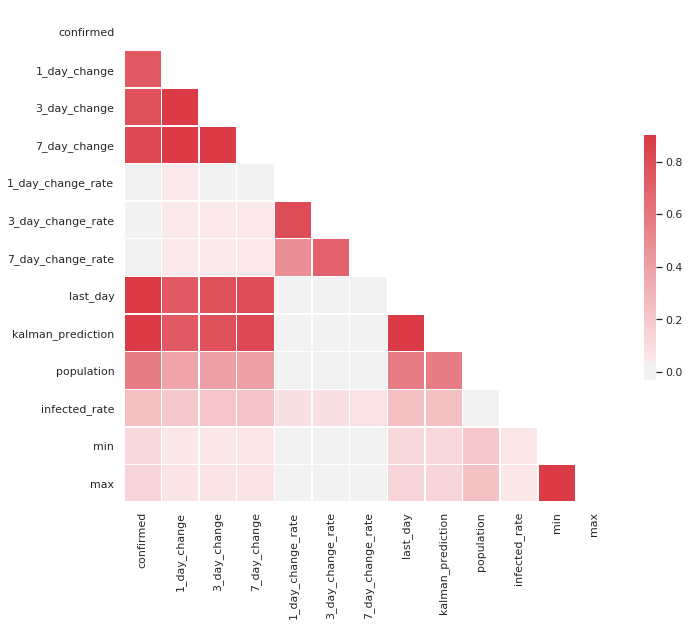

In [58]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [59]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.750602
3_day_change         0.793617
7_day_change         0.814723
1_day_change_rate    0.023410
3_day_change_rate    0.021812
7_day_change_rate    0.015688
last_day             0.992653
kalman_prediction    0.993164
population           0.575433
infected_rate        0.249501
min                  0.121681
max                  0.143528
Name: confirmed, dtype: float64


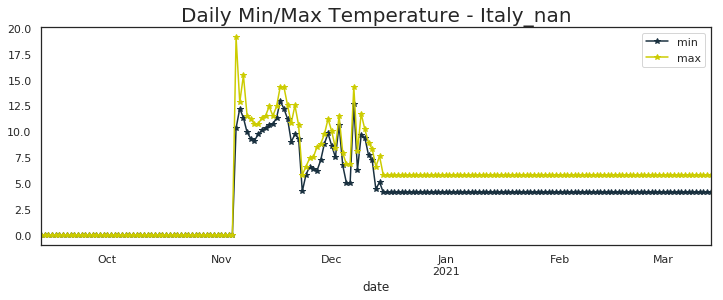

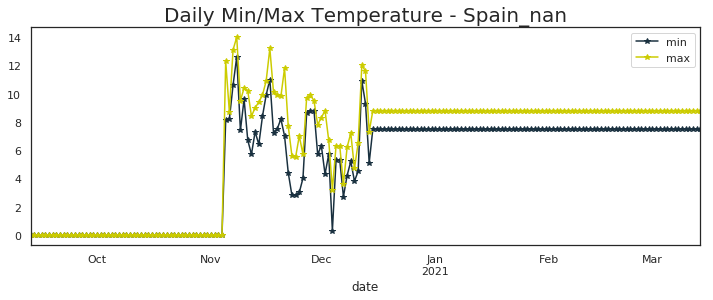

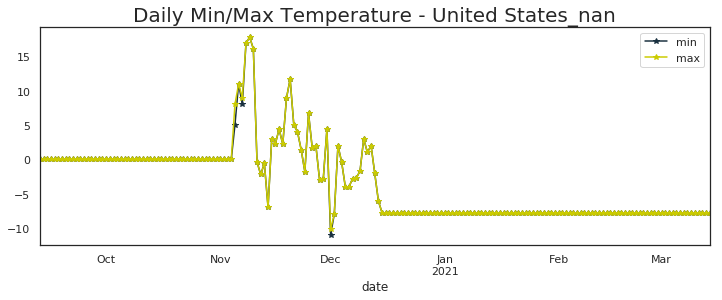

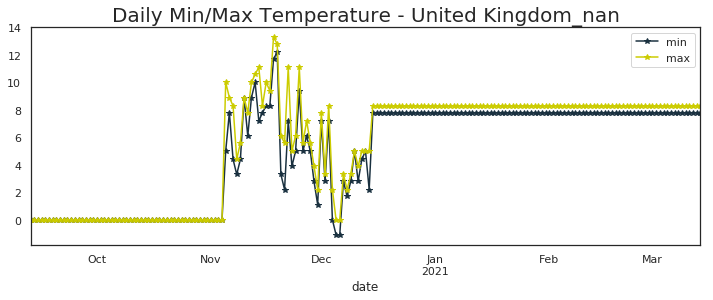

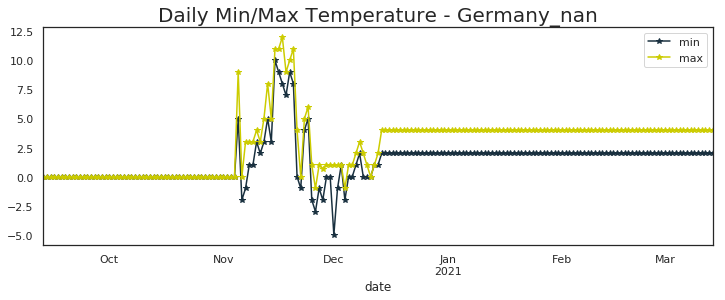

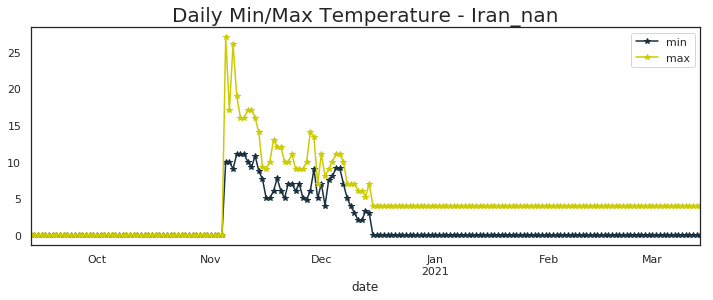

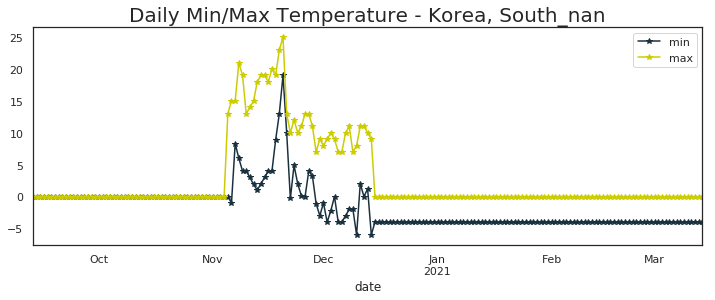

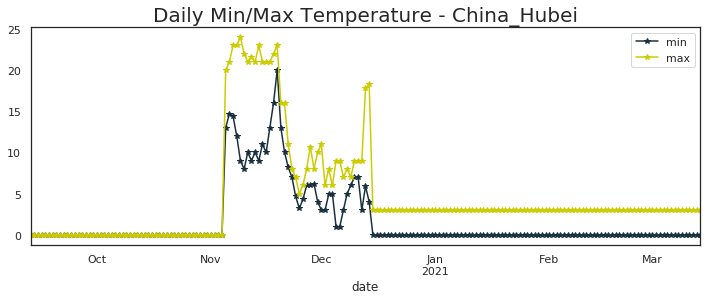

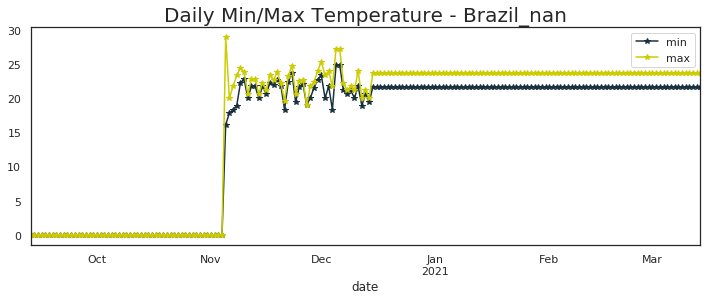

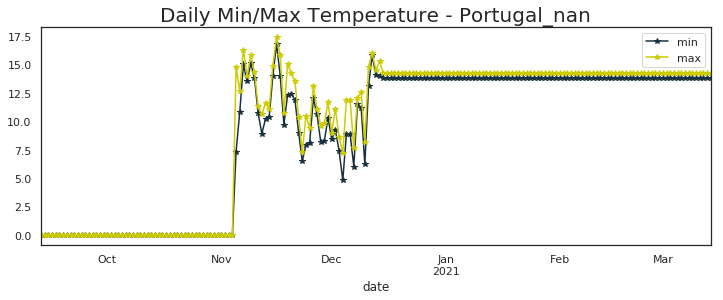

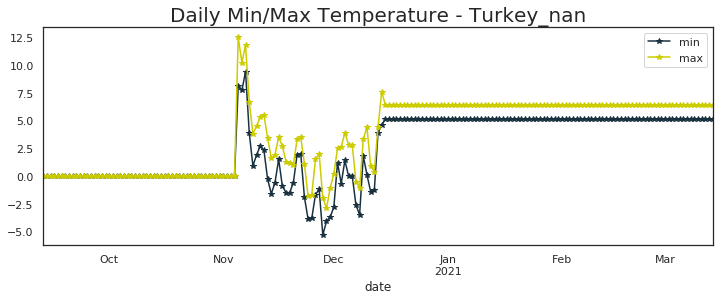

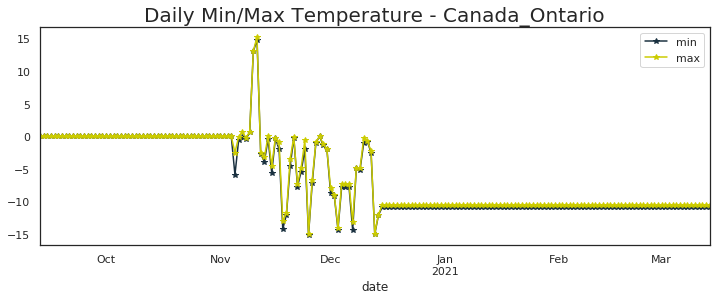

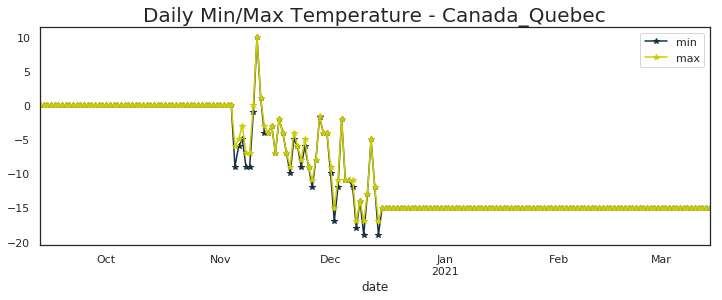

In [60]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [61]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.8  17.8
Brazil_nan                  24.8  28.9
India_nan                   22.0  31.0
Russia_nan                   0.0   4.0
United Kingdom_nan          12.2  13.3
France_nan                  12.1  13.3
Spain_nan                   12.6  14.0
Italy_nan                   12.9  19.1
Turkey_nan                   9.4  12.5
Germany_nan                 10.0  12.0
Colombia_nan                 0.0   0.0
Argentina_nan                0.0   0.0
Mexico_nan                  15.1  15.1
Poland_nan                   8.9  10.6
Iran_nan                    11.0  27.0
South Africa_nan             0.0   0.0
Ukraine_nan                  0.0   0.0
Indonesia_nan                0.0   0.0
Peru_nan                    24.6  29.9
Czechia_nan                  0.0   0.0
Netherlands_nan             14.4  16.1
Chile_nan                   18.0  22.0
Romania_nan                 

### Kalman X Days Ahead Prediction

In [62]:
%%R

#install.packages('reshape')

NULL


In [63]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [64]:
all_new=%R all_new

In [65]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

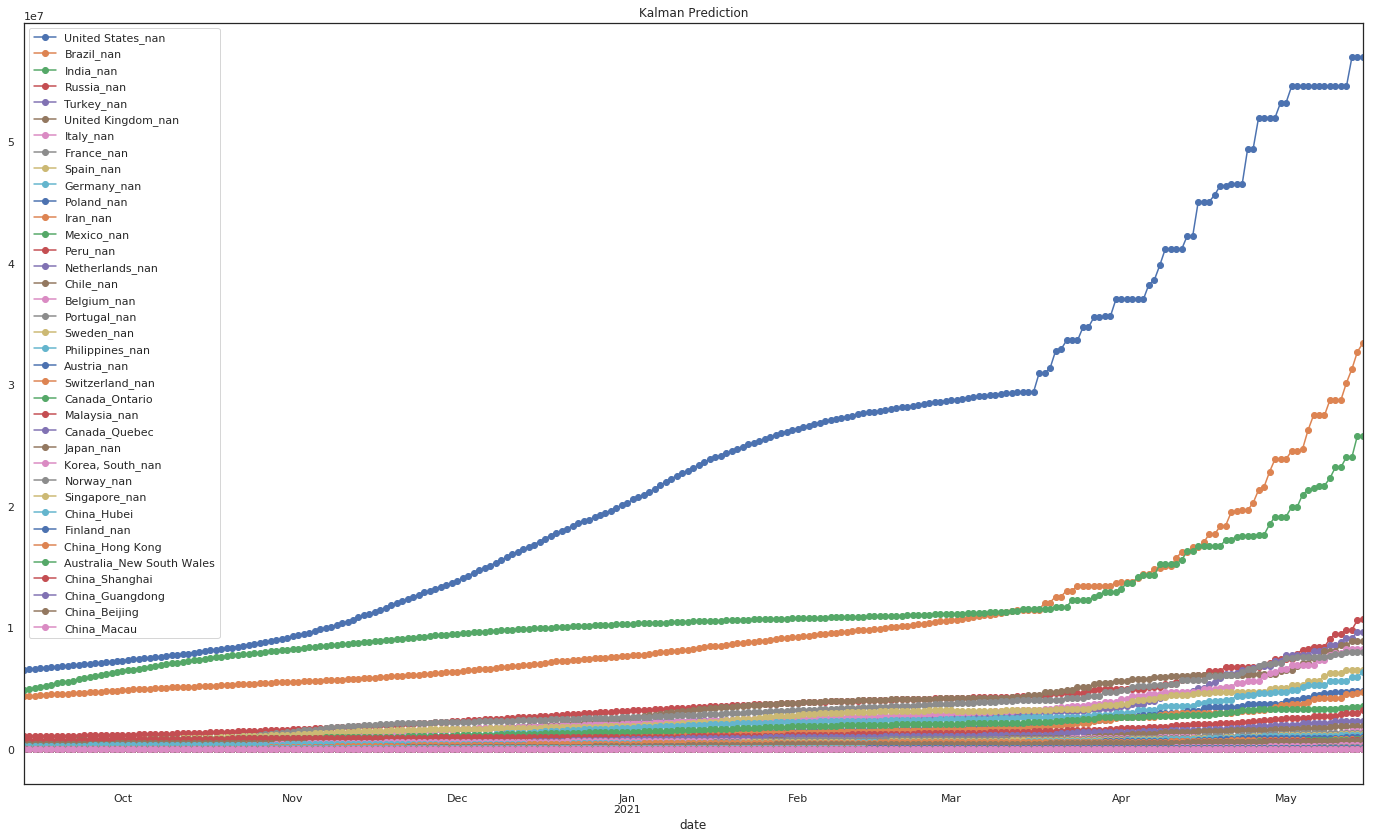

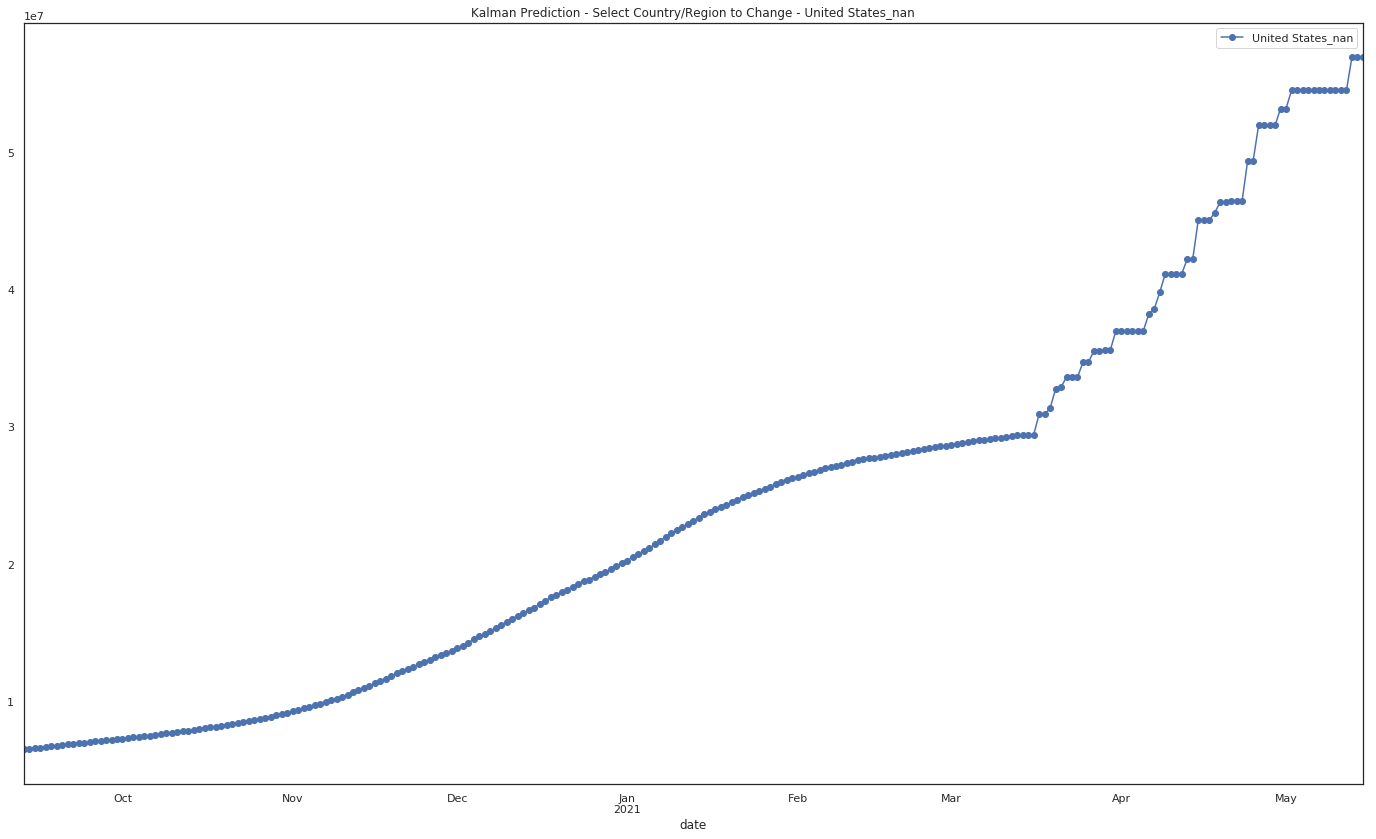

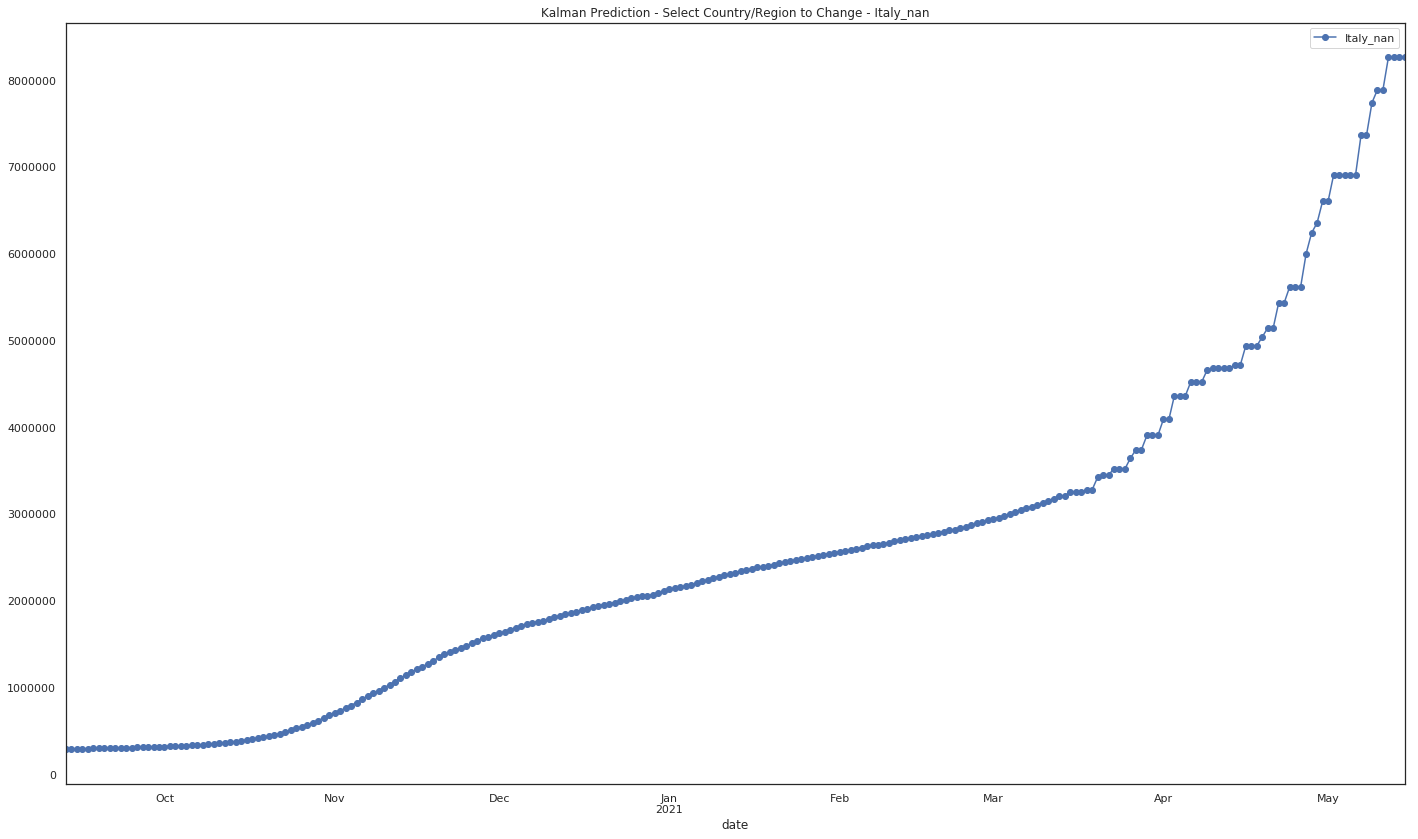

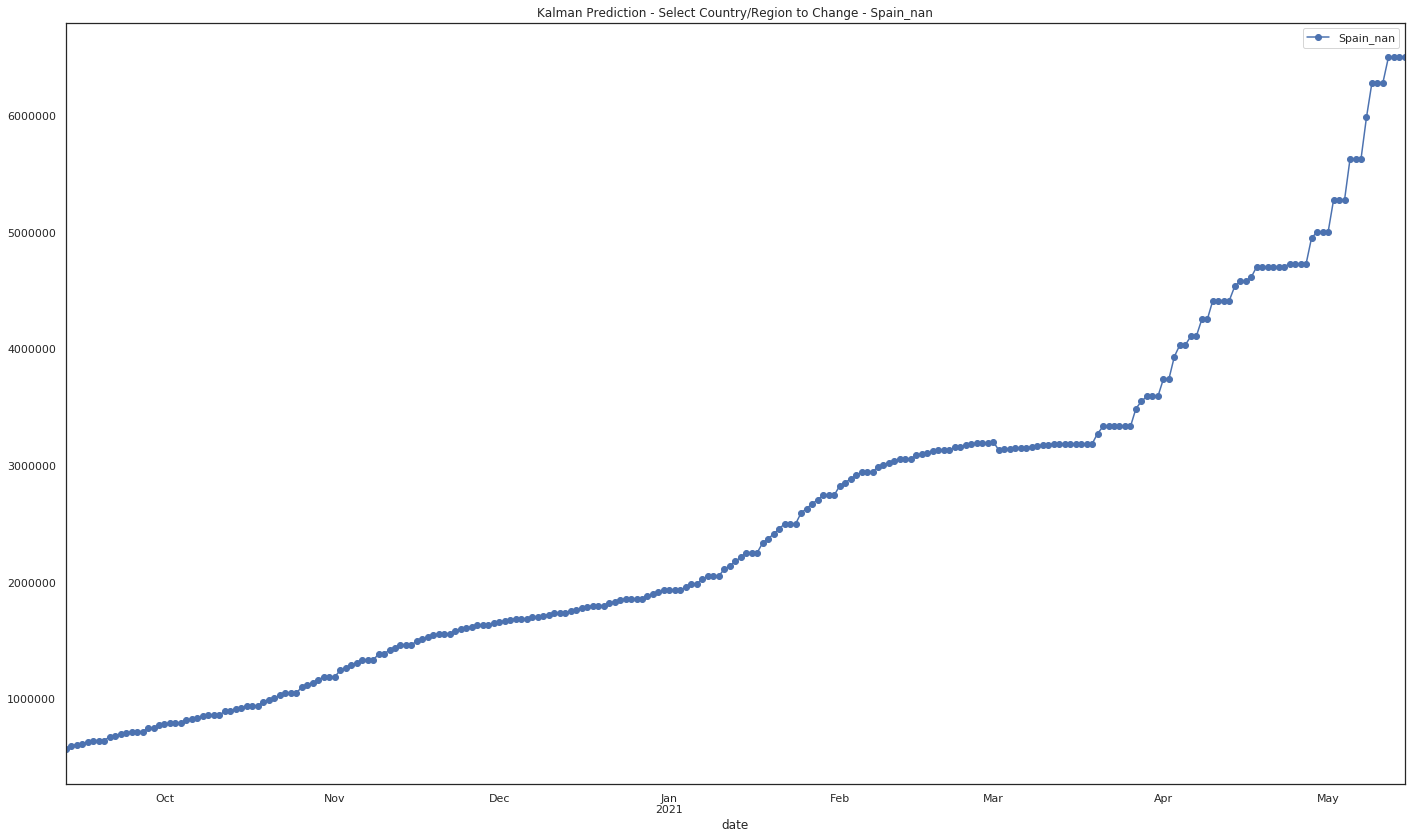

In [66]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


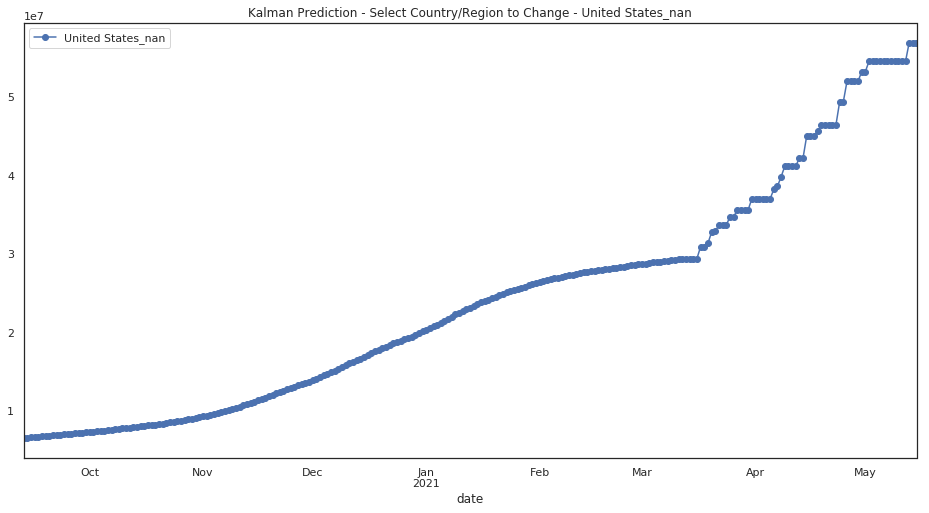

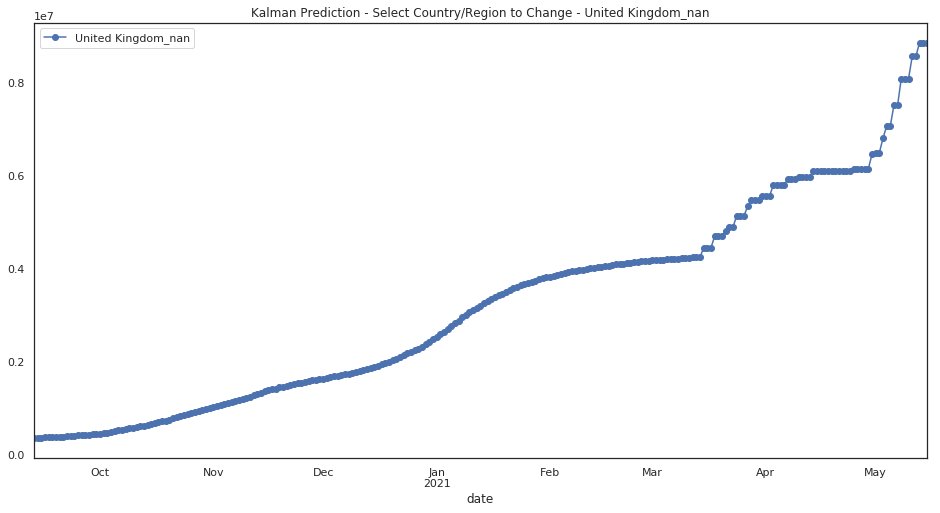

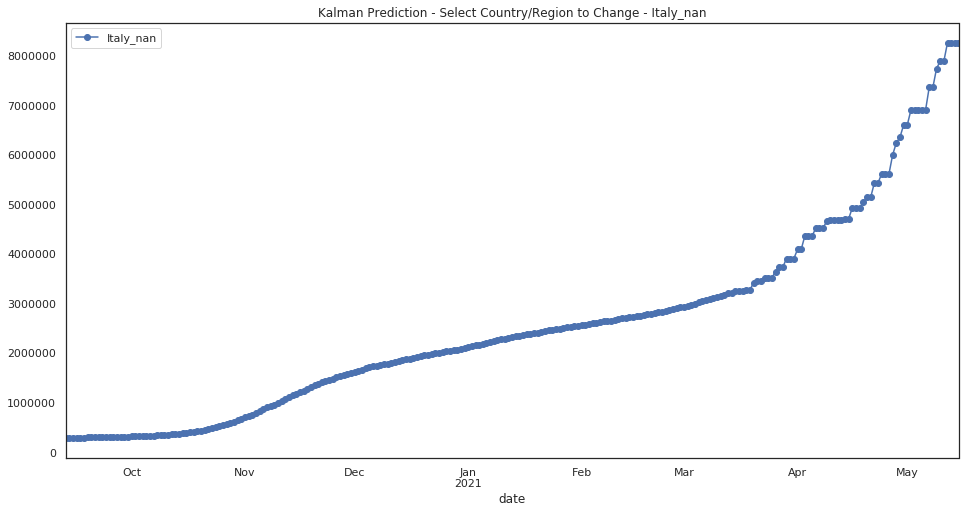

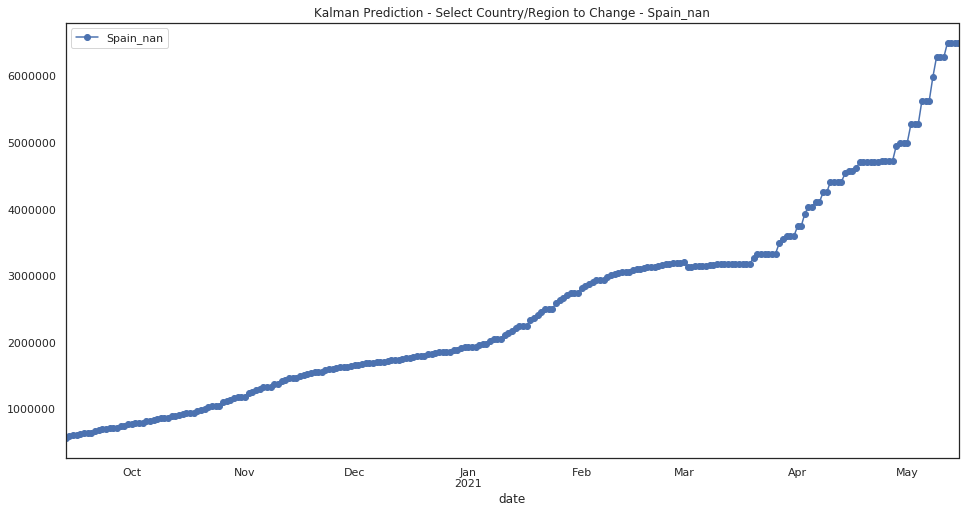

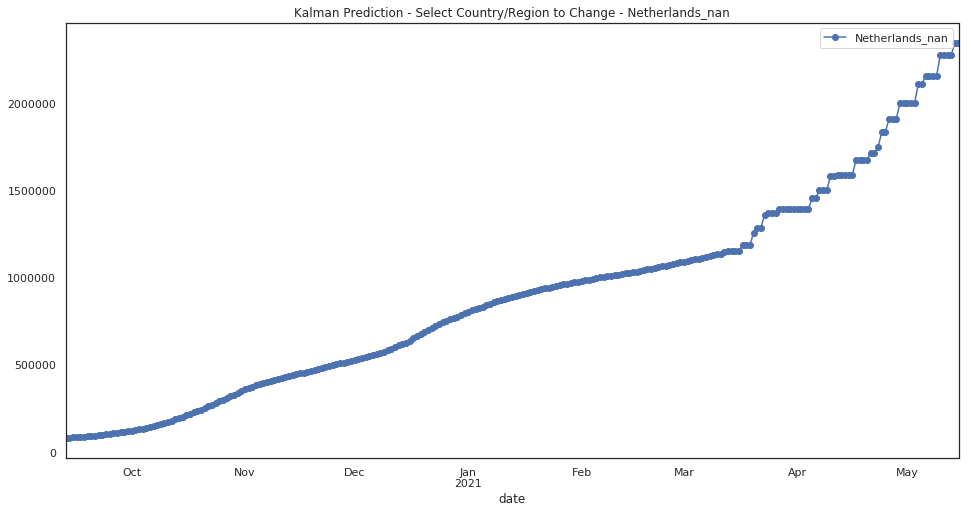

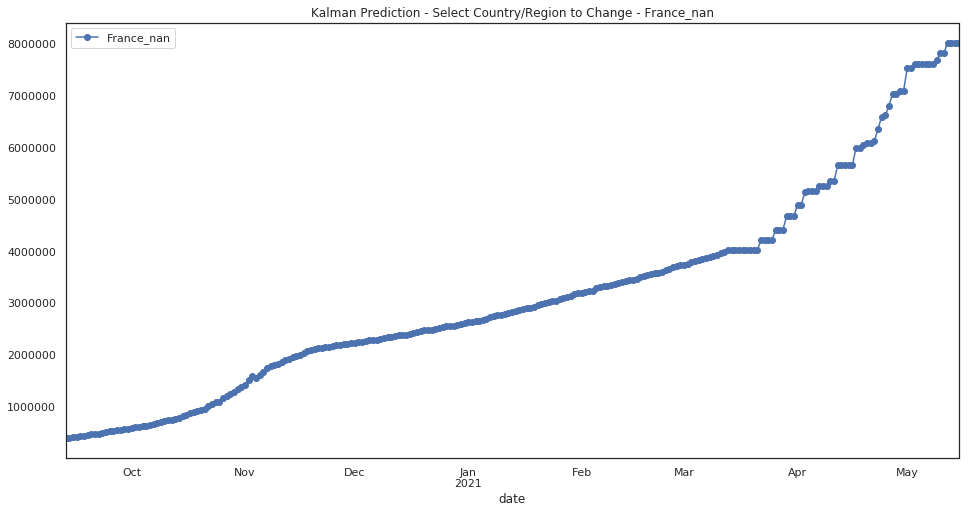

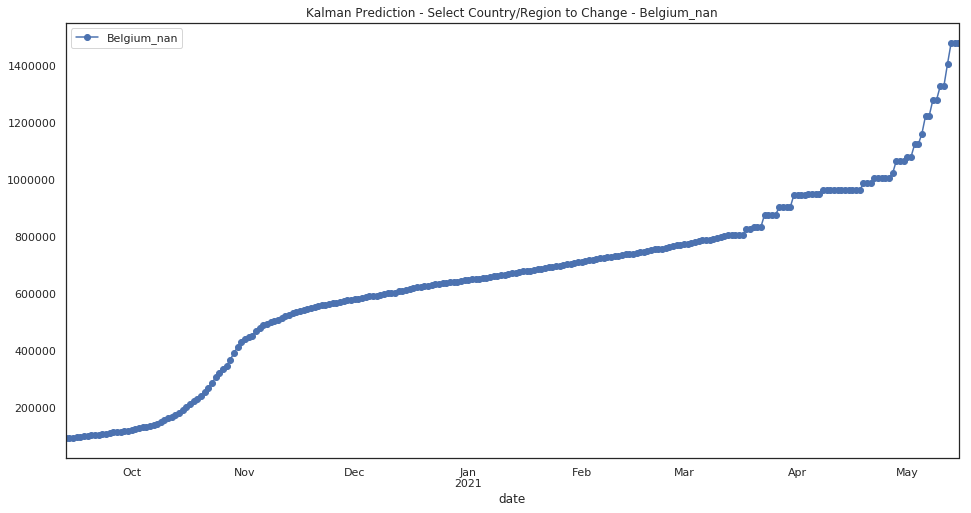

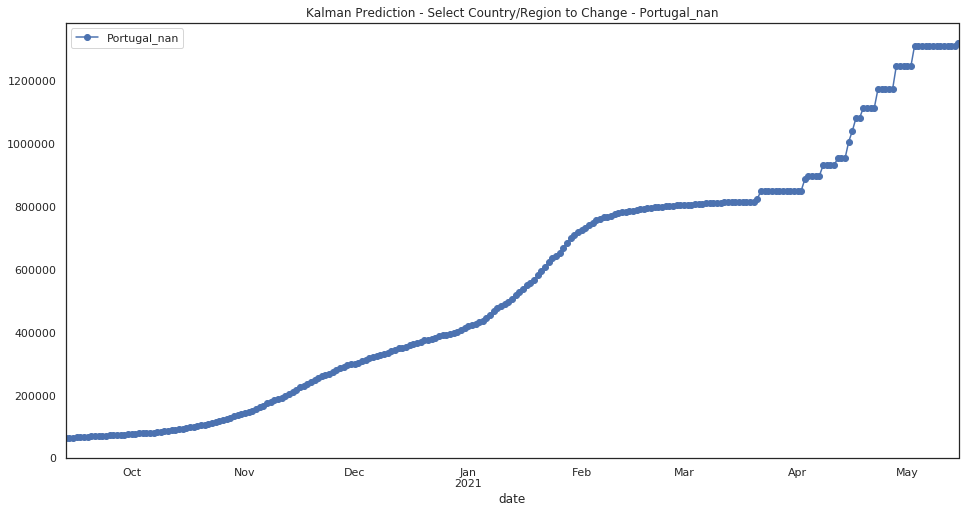

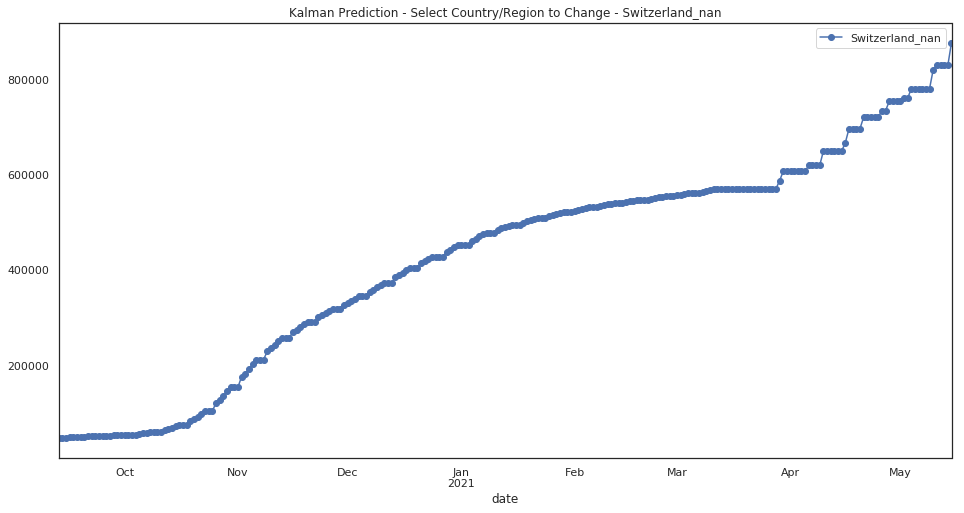

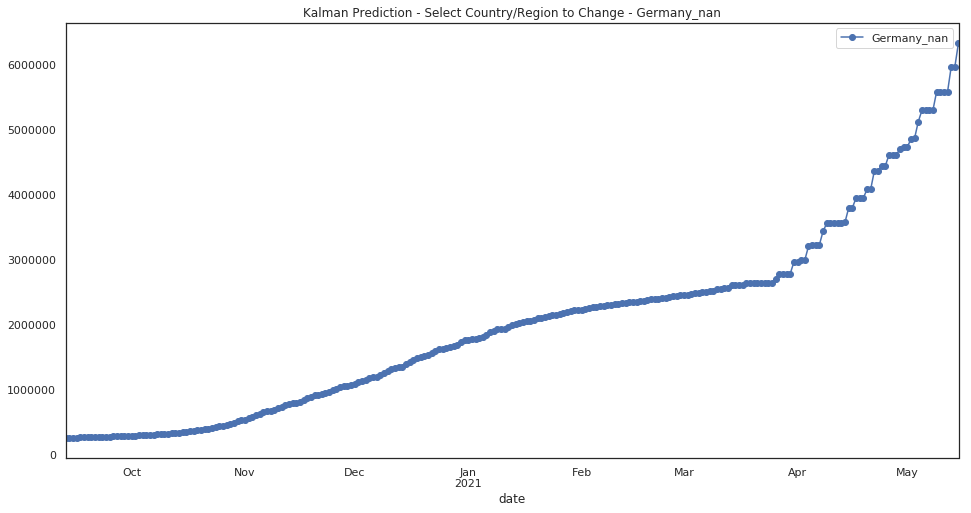

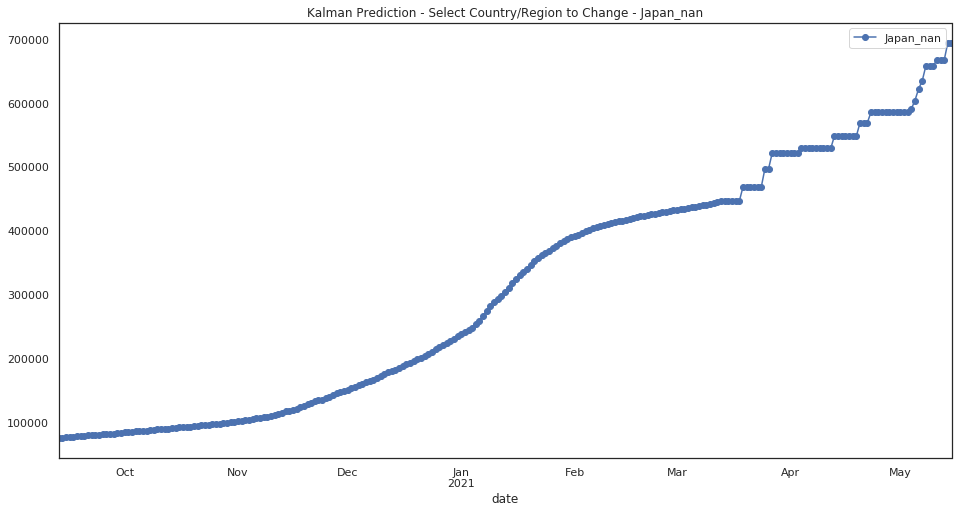

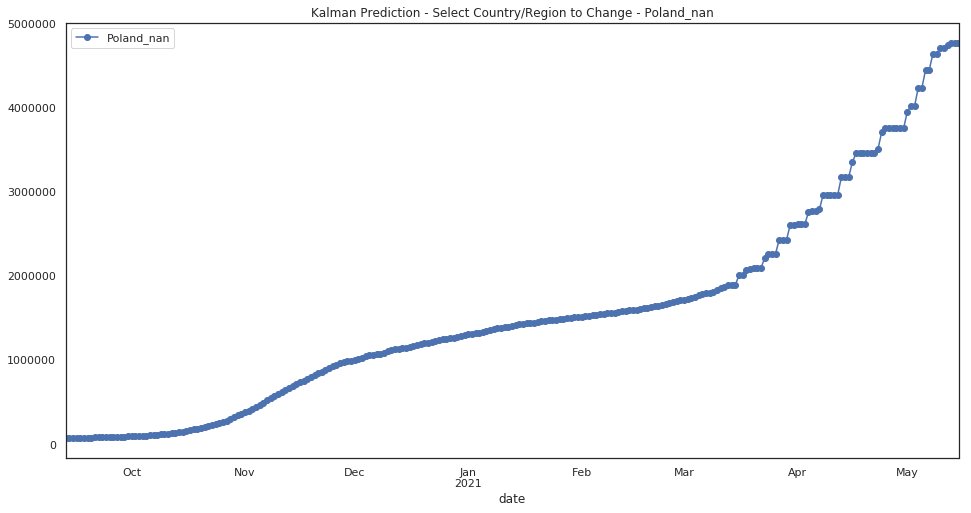

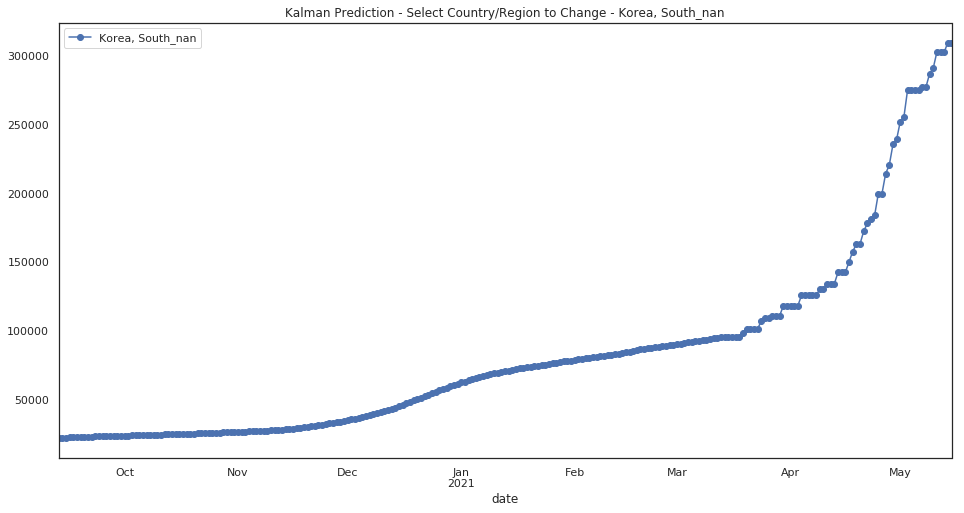

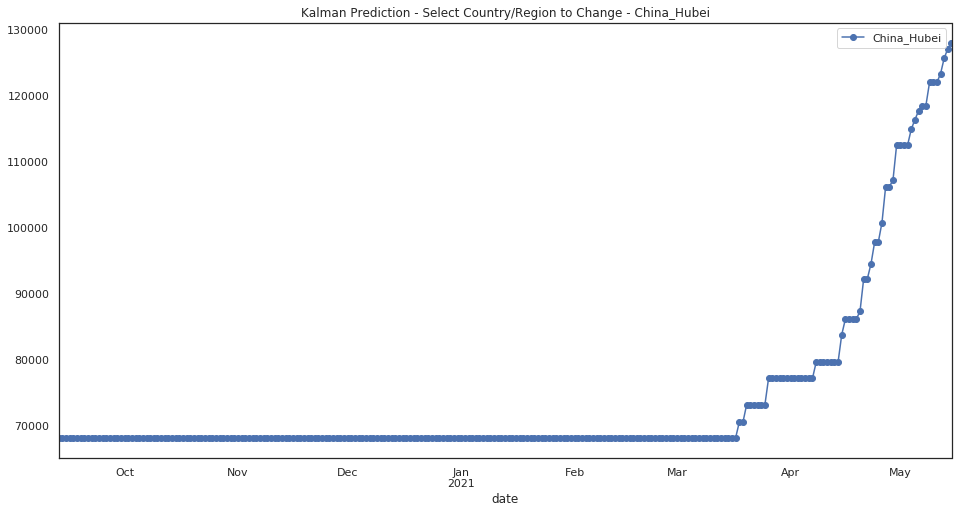

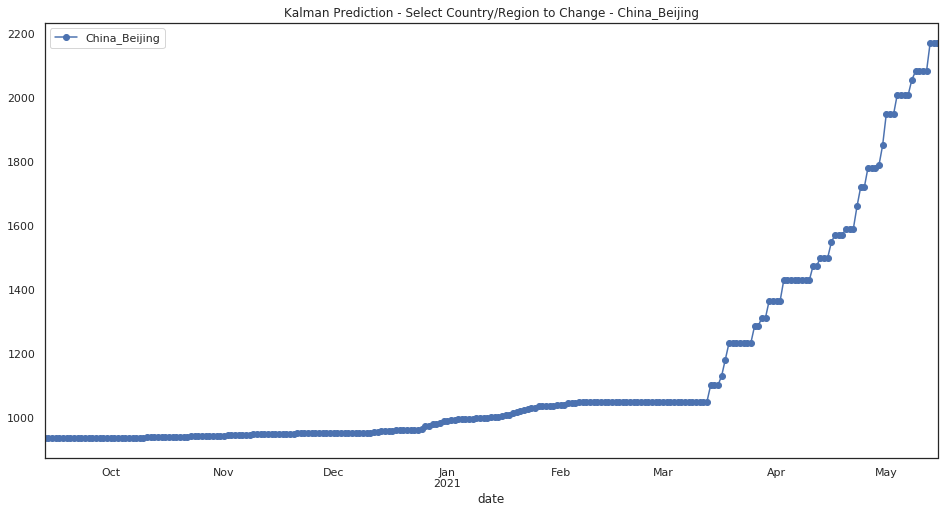

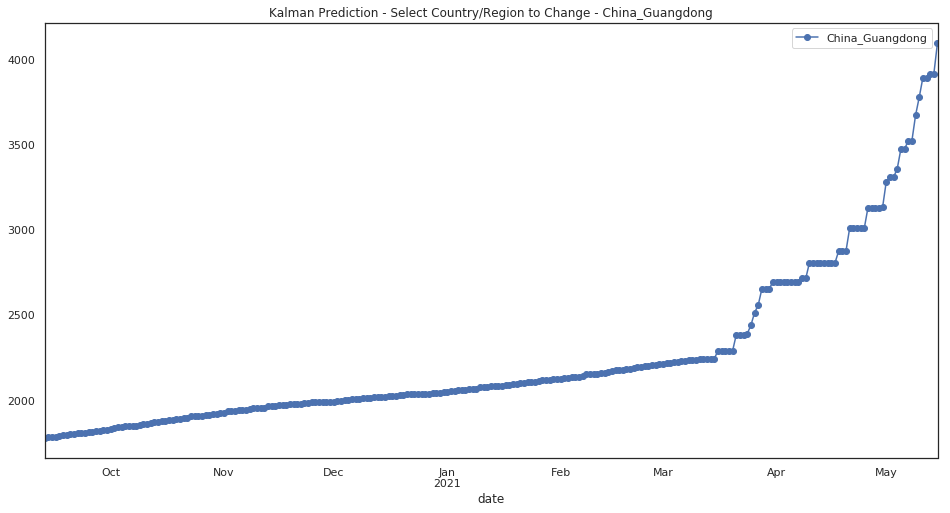

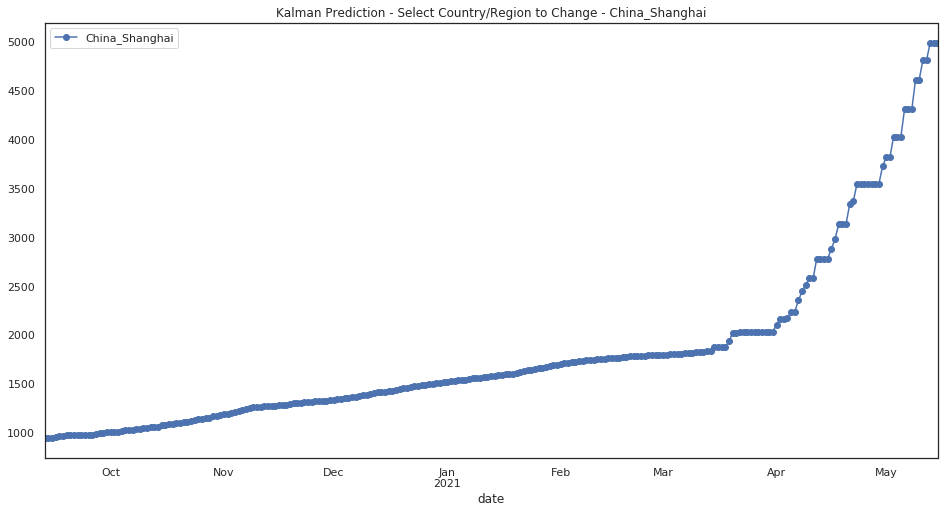

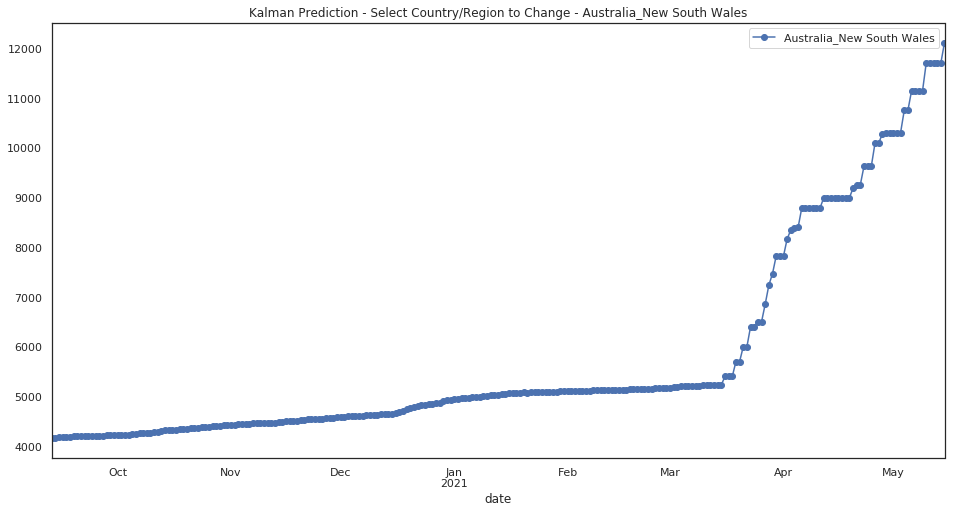

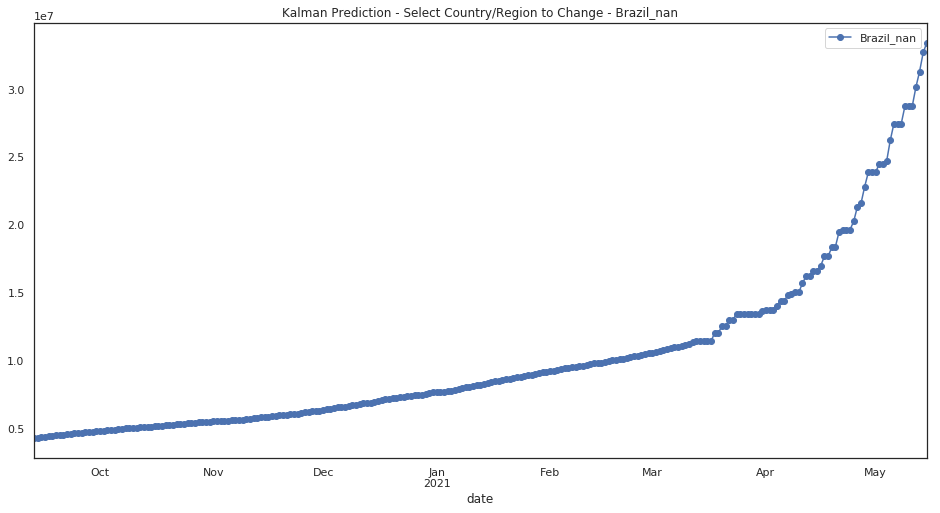

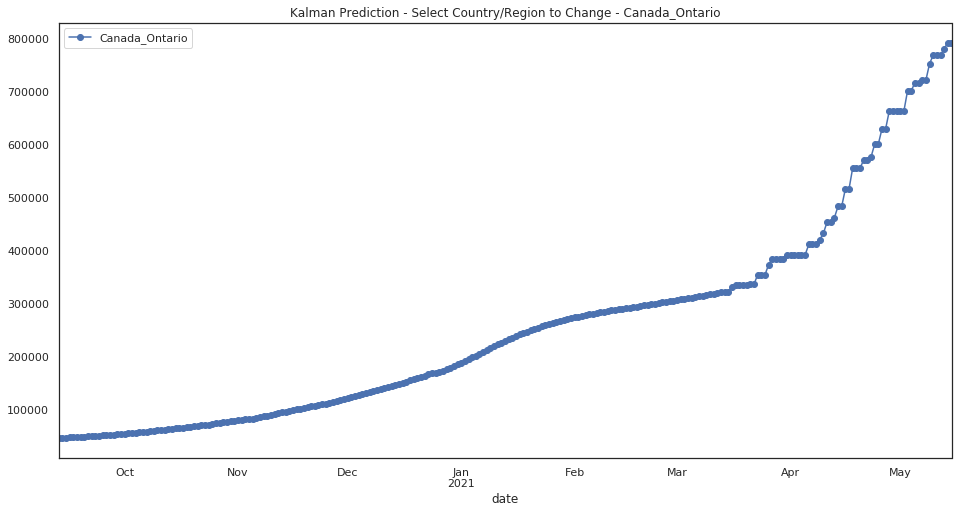

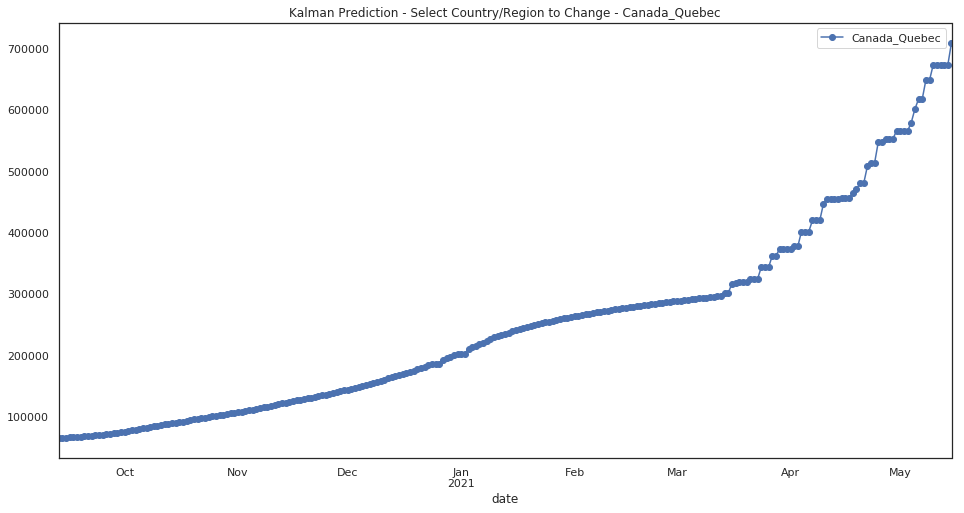

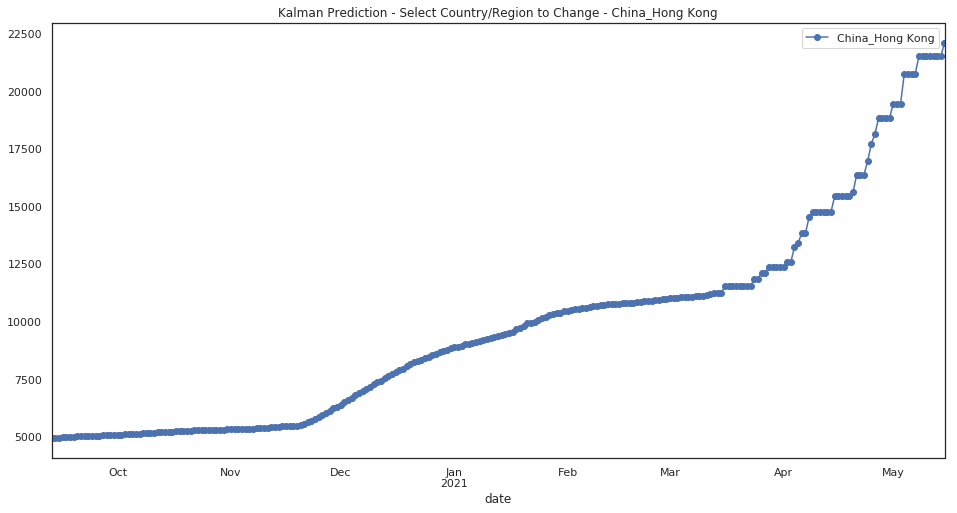

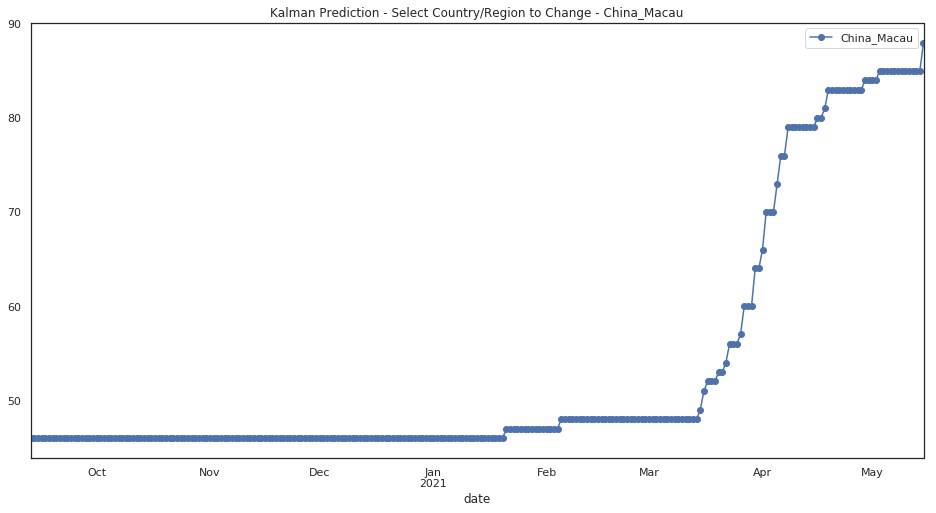

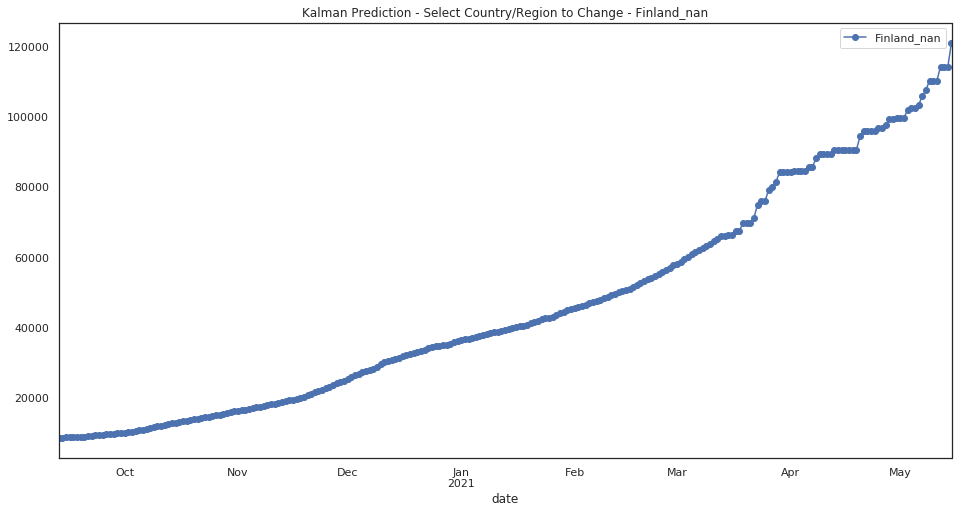

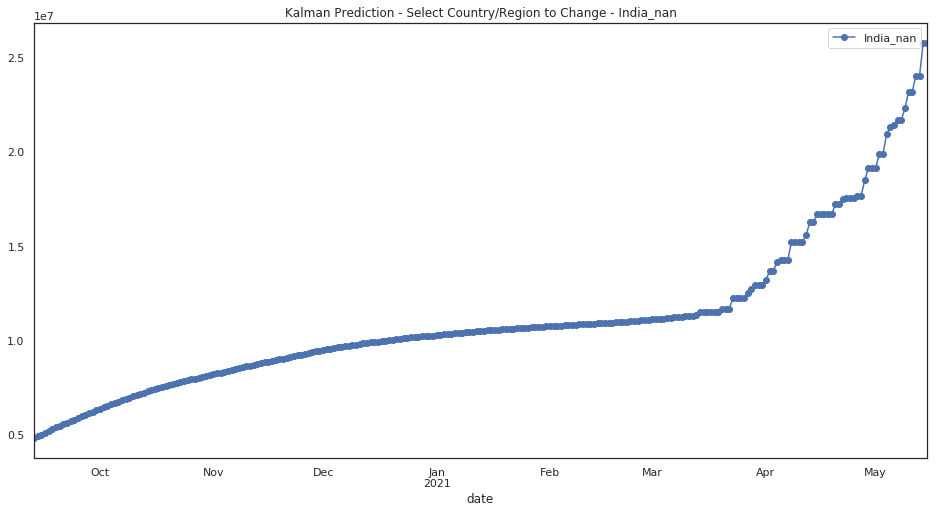

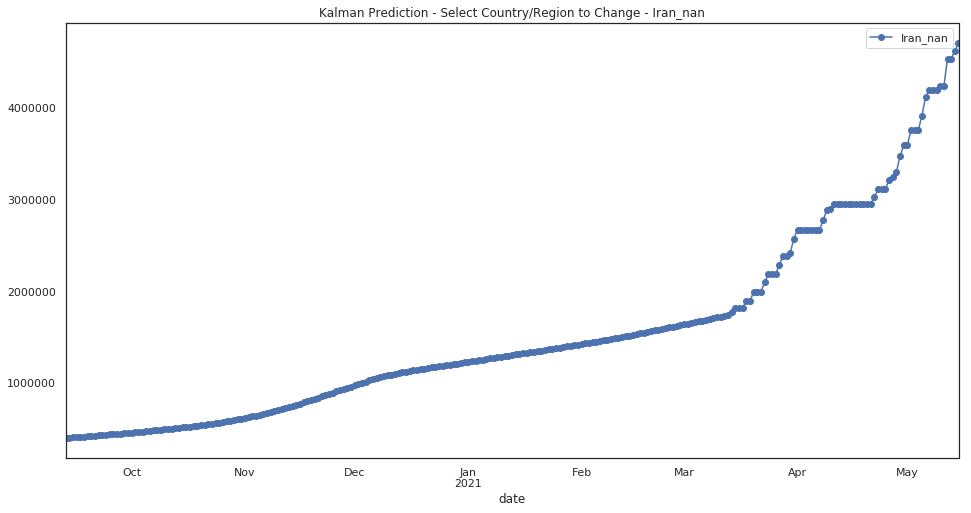

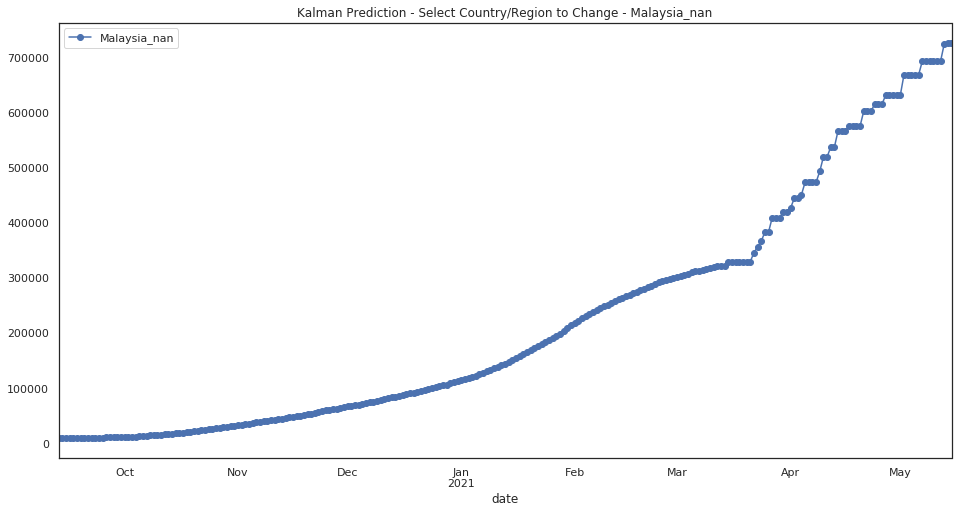

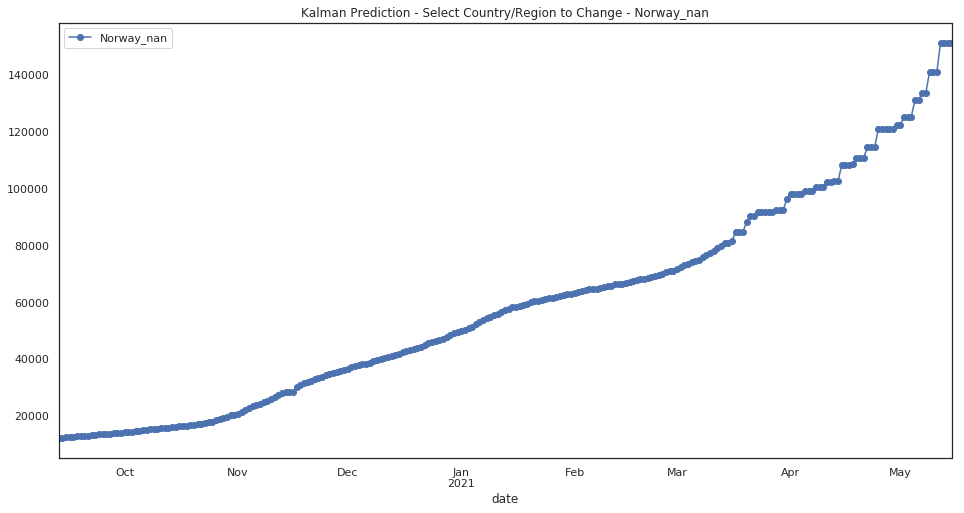

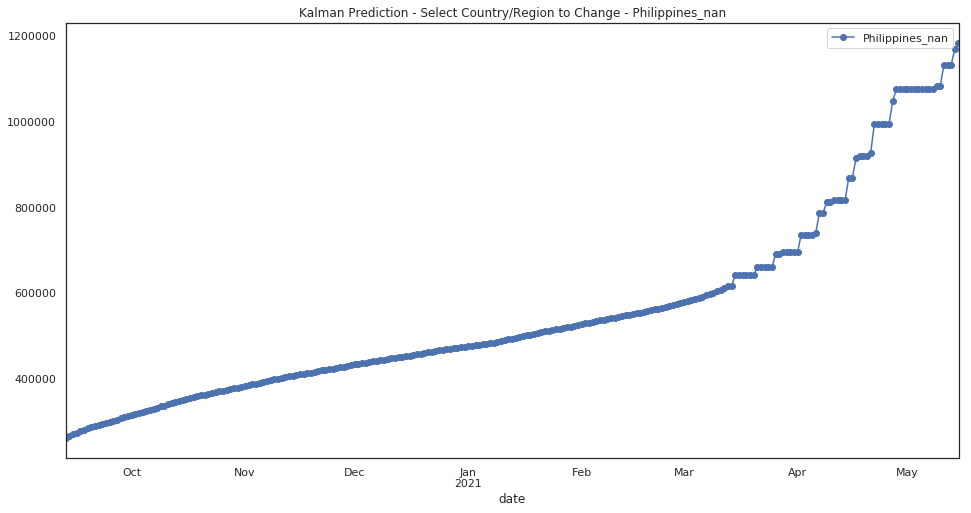

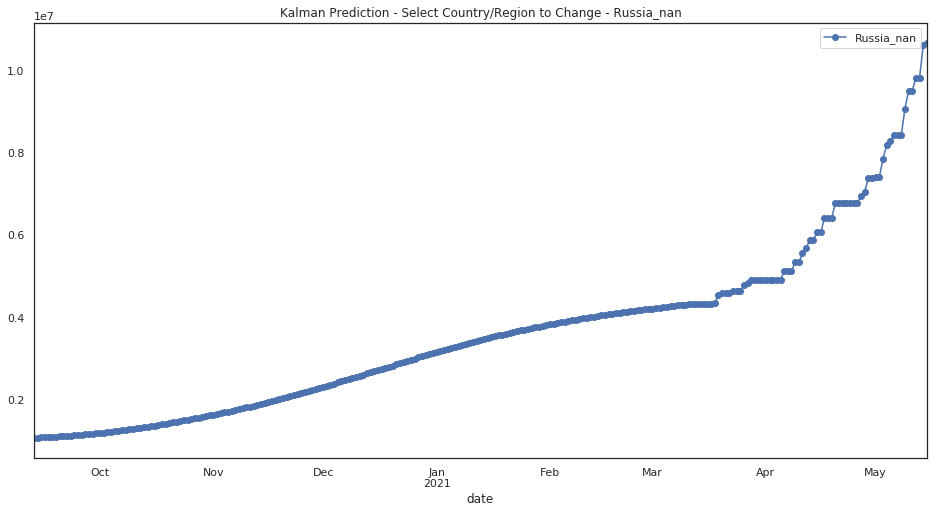

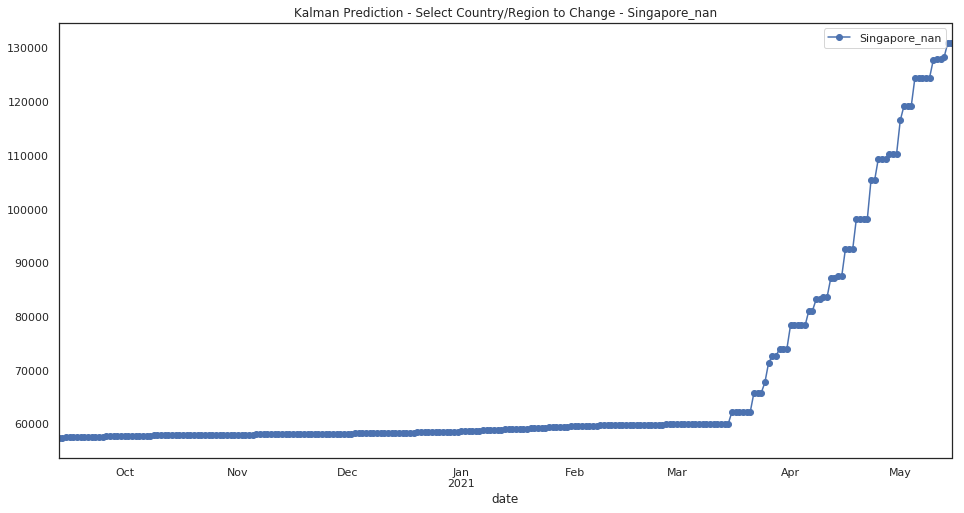

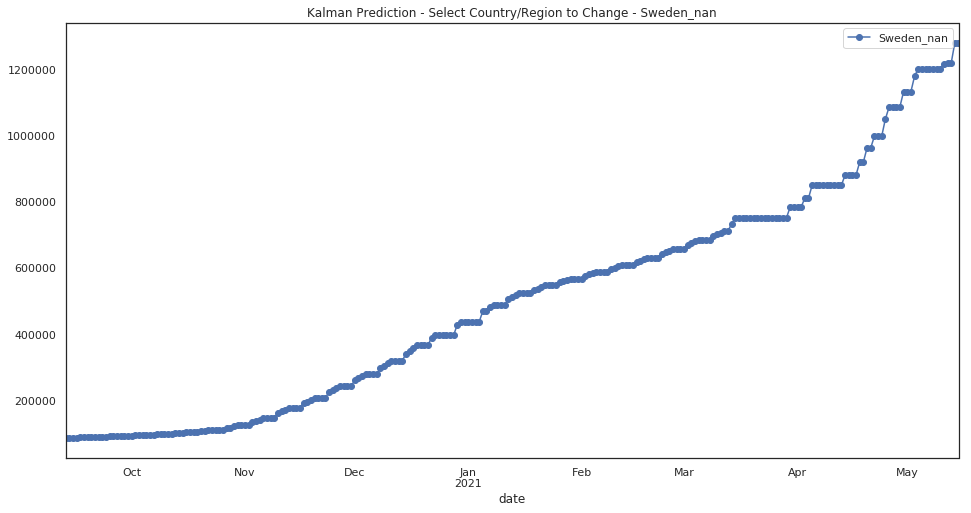

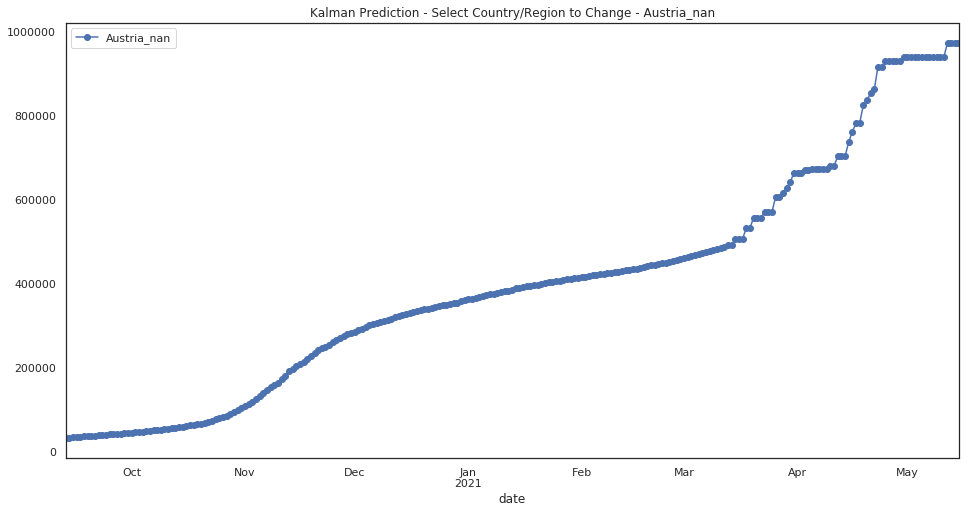

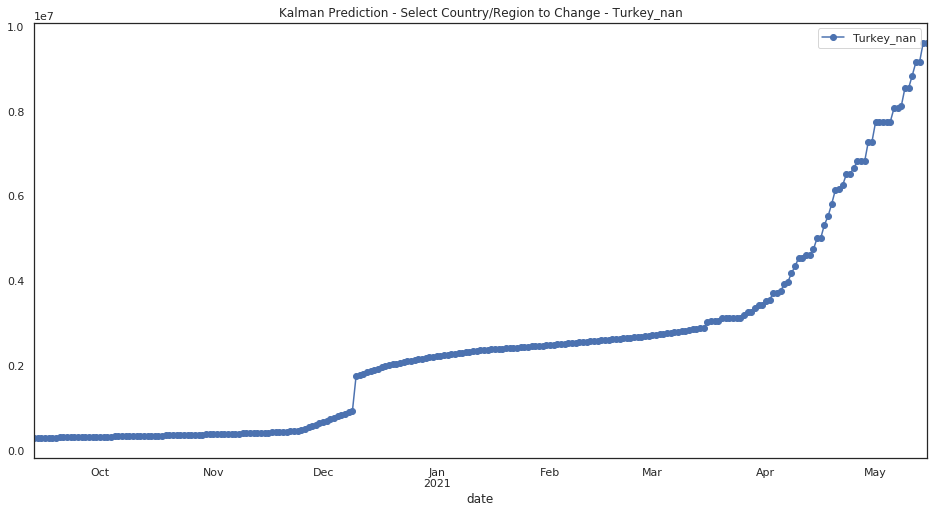

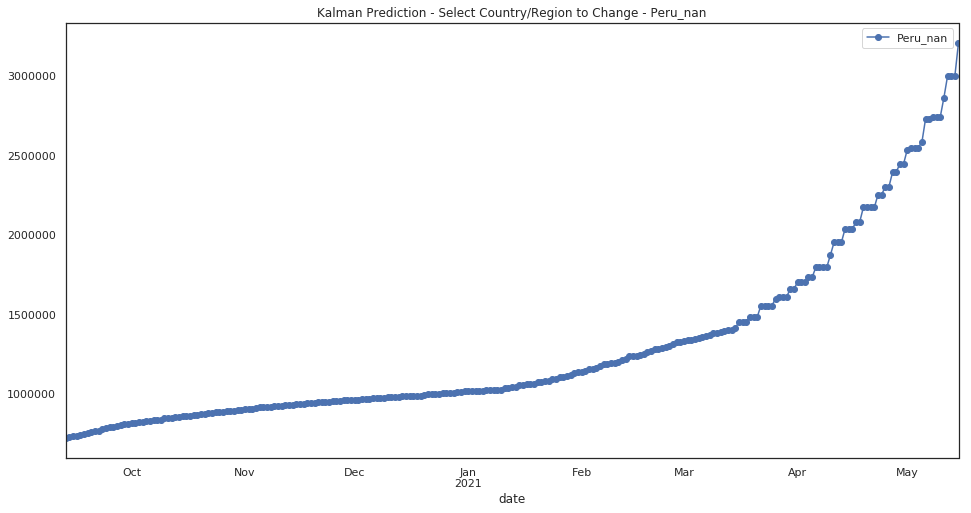

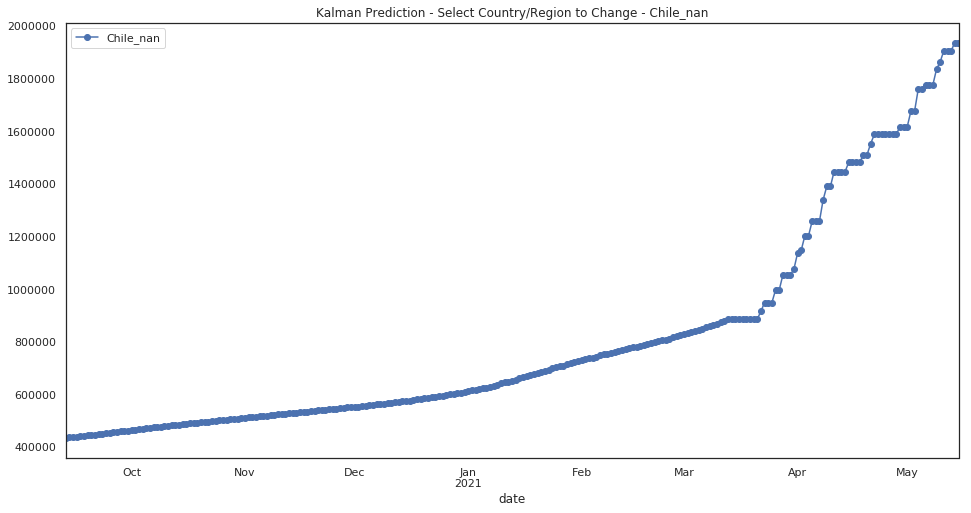

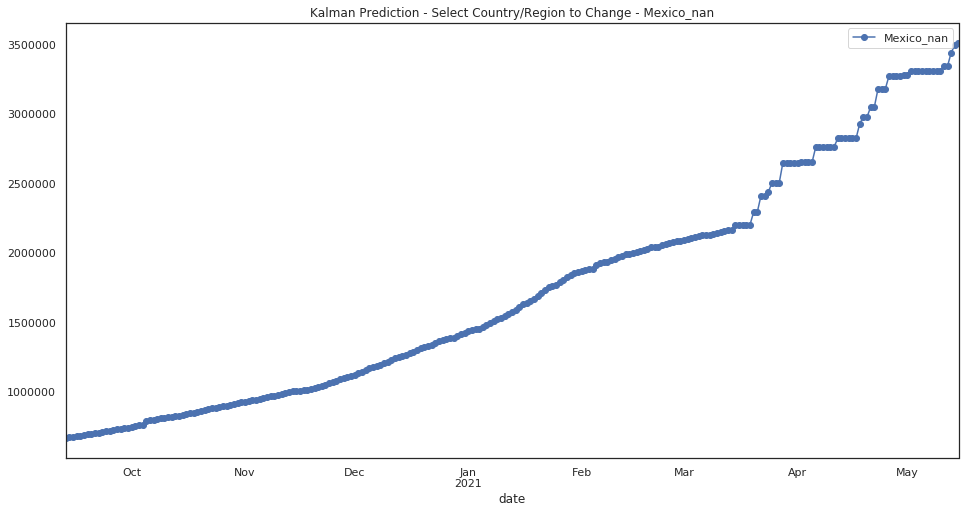

In [67]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [68]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2021-05-15 00:00:00
dtype: object


0  pred_confirmed
United States_nan                                   NaN      56941571.0
Brazil_nan                                          NaN      33425531.0
India_nan                                           NaN      25797031.0
Russia_nan                                          NaN      10683063.0
Turkey_nan                                          NaN       9622555.0
United Kingdom_nan                                  NaN       8863036.0
Italy_nan                                           NaN       8262699.0
France_nan                                          NaN       8020748.0
Spain_nan                                           NaN       6500753.0
Germany_nan                                         NaN       6333429.0
Poland_nan                                          NaN       4769848.0
Iran_nan                                            NaN       4711058.0
South Africa_nan                                    NaN       3675374.0
Colombia_nan                                        NaN       3638976.0
Argentina_nan                                       NaN       3626593.0
Mexico_nan                                          NaN       3511392.0
Peru_nan                                            NaN       3209850.0
Czechia_nan                                         NaN       3071790.0
Indonesia_nan                                       NaN       2612164.0
Ukraine_nan                                         NaN       2570173.0
Iraq_nan                                            NaN       2392454.0
Netherlands_nan                                     NaN       2347496.0
Chile_nan                                           NaN       1937073.0
Serbia_nan                                          NaN       1569794.0
Belgium_nan                                         NaN       1479783.0
Israel_nan                                          NaN       1442786.0
Romania_nan                                         NaN       1394541.0
Portugal_nan                                        NaN       1321814.0
Sweden_nan                                          NaN       1281177.0
Bolivia_nan                                         NaN       1248164.0
...                                                 ...             ...
China_Gansu                                         NaN           320.0
United Kingdom_British Virgin Islands               NaN           320.0
Australia_Australian Capital Territory              NaN           275.0
Australia_Northern Territory                        NaN           222.0
Canada_Yukon                                        NaN           215.0
China_Ningxia                                       NaN           193.0
France_New Caledonia                                NaN           186.0
Saint Kitts and Nevis_nan                           NaN           145.0
Fiji_nan                                            NaN           113.0
United Kingdom_Falkland Islands (Malvinas)          NaN           103.0
China_Macau                                         NaN            88.0
Laos_nan                                            NaN            84.0
Canada_Northwest Territories                        NaN            74.0
Holy See_nan                                        NaN            73.0
France_Saint Pierre and Miquelon                    NaN            64.0
Denmark_Greenland                                   NaN            50.0
United Kingdom_Anguilla                             NaN            45.0
Solomon Islands_nan                                 NaN            41.0
United Kingdom_Montserrat                           NaN            40.0
China_Qinghai                                       NaN            35.0
Canada_Grand Princess                               NaN            26.0
Canada_Repatriated Travellers                       NaN            25.0
MS Zaandam_nan                                      NaN             9.0
United Kingdom_Saint Helena, Ascension and Tris...  NaN             4.0
Marshall Islands_nan  

In [69]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [70]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [71]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [72]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [73]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [74]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-09-13          54939.0      31361.0      63158.0      22736.0   
2020-09-14          54987.0      31504.0      63366.0      22817.0   
2020-09-15          38772.0      11520.0      48496.0       1438.0   
2020-09-16          38815.0      11672.0      48734.0       1438.0   
2020-09-17          38855.0      11816.0      48966.0       1483.0   
2020-09-18          38872.0      11948.0      49194.0       1483.0   
2020-09-19          38897.0      12073.0      49413.0       1564.0   
2020-09-20          38919.0      12226.0      49623.0       1564.0   
2020-09-21          39235.0      12559.0      50150.0       2082.0   
2020-09-22          39275.0      12714.0      50343.0       1681.0   
2020-09-23          39323.0      12861.0      50530.0       2210.0   
2020-09-24          39339.0      13000.0      50711.0       1753.0   
2020-09-25          39359.0      13104.0      50888.0       2223.0   
2020-09-26          39368.0      13228.0      51051.0       1836.0   
2020-09-27          39397.0      13355.0      51205.0       2239.0   
2020-09-28          39412.0      13480.0      51353.0       2351.0   
2020-09-29          39431.0      13575.0      51507.0       1966.0   
2020-09-30          39446.0      13717.0      51669.0       2493.0   
2020-10-01          39462.0      13872.0      51831.0       2050.0   
2020-10-02          39469.0      14002.0      51991.0       2488.0   
2020-10-03          39477.0      14161.0      52141.0       2110.0   
2020-10-04          39515.0      14326.0      52283.0       2451.0   
2020-10-05          39587.0      14474.0      52417.0       2675.0   
2020-10-06          39652.0      14634.0      52545.0       2370.0   
2020-10-07          39721.0      14780.0      52667.0       3138.0   
2020-10-08          39788.0      14947.0      52803.0       2568.0   
2020-10-09          39859.0      15112.0      52949.0       3208.0   
2020-10-10          39875.0      15283.0      53089.0       2696.0   
2020-10-11          39964.0      15455.0      53223.0       3159.0   
2020-10-12          40026.0      15623.0      53460.0       3416.0   
...                     ...          ...          ...          ...   
2021-04-17          73744.0     183899.0     160599.0      15105.0   
2021-04-18          75839.0     188344.0     165739.0      15105.0   
2021-04-19          78933.0     195083.0     169096.0      14957.0   
2021-04-20          79460.0     198072.0     166640.0      14957.0   
2021-04-21          82508.0     195460.0     166640.0      15447.0   
2021-04-22          83601.0     197121.0     166640.0      15416.0   
2021-04-23          82815.0     197811.0     166640.0      15635.0   
2021-04-24          82815.0     197811.0     166640.0      15635.0   
2021-04-25          82815.0     205014.0     171215.0      15523.0   
2021-04-26          84263.0     209258.0     174219.0      15944.0   
2021-04-27          89275.0     211911.0     176464.0      15905.0   
2021-04-28          90572.0     214791.0     178599.0      16115.0   
2021-04-29          89930.0     212812.0     176967.0      16106.0   
2021-04-30          89791.0     212812.0     182575.0      16067.0   
2021-05-01          89652.0     212812.0     191271.0      16039.0   
2021-05-02          94200.0     212812.0     192242.0      16193.0   
2021-05-03          96087.0     212812.0     190516.0      16102.0   
2021-05-04          98493.0     212812.0     198441.0      16275.0   
2021-05-05         100157.0     212945.0     202952.0      16372.0   
2021-05-06          99064.0     218948.0     200371.0      16948.0   
2021-05-07          99064.0     222286.0     205075.0      17073.0   
2021-05-08         101890.0     224333.0     207914.0      17593.0   
2021-05-09         103239.0     226839.0     210064.0      18255.0   
2021-05-10         102763.0     224971.0     212213.0      17998.0   
2021-05-11

In [75]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
## 06Aug2020 - For all
pred=pred[:-1]

In [76]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['United States_nan',
 'Brazil_nan',
 'India_nan',
 'Russia_nan',
 'Turkey_nan',
 'United Kingdom_nan',
 'Italy_nan',
 'France_nan',
 'Spain_nan',
 'Germany_nan',
 'Poland_nan',
 'Iran_nan',
 'South Africa_nan',
 'Colombia_nan',
 'Argentina_nan',
 'Mexico_nan',
 'Peru_nan',
 'Czechia_nan',
 'Indonesia_nan',
 'Ukraine_nan',
 'Iraq_nan',
 'Netherlands_nan',
 'Chile_nan',
 'Serbia_nan',
 'Belgium_nan',
 'Israel_nan',
 'Romania_nan',
 'Portugal_nan',
 'Sweden_nan',
 'Bolivia_nan',
 'Lebanon_nan',
 'Philippines_nan',
 'Morocco_nan',
 'Jordan_nan',
 'Pakistan_nan',
 'Austria_nan',
 'Bangladesh_nan',
 'Hungary_nan',
 'Switzerland_nan',
 'Panama_nan',
 'Saudi Arabia_nan',
 'Canada_Ontario',
 'Ecuador_nan',
 'Malaysia_nan',
 'Canada_Quebec',
 'Japan_nan',
 'Slovakia_nan',
 'United Arab Emirates_nan',
 'West Bank and Gaza_nan',
 'Bulgaria_nan',
 'Georgia_nan',
 'Nigeria_nan',
 'Dominican Republic_nan',
 'Costa Rica_nan',
 'Nepal_nan',
 'Ireland_nan',
 'Belarus_nan',
 'Tunisia_nan',
 'Kazakhstan_

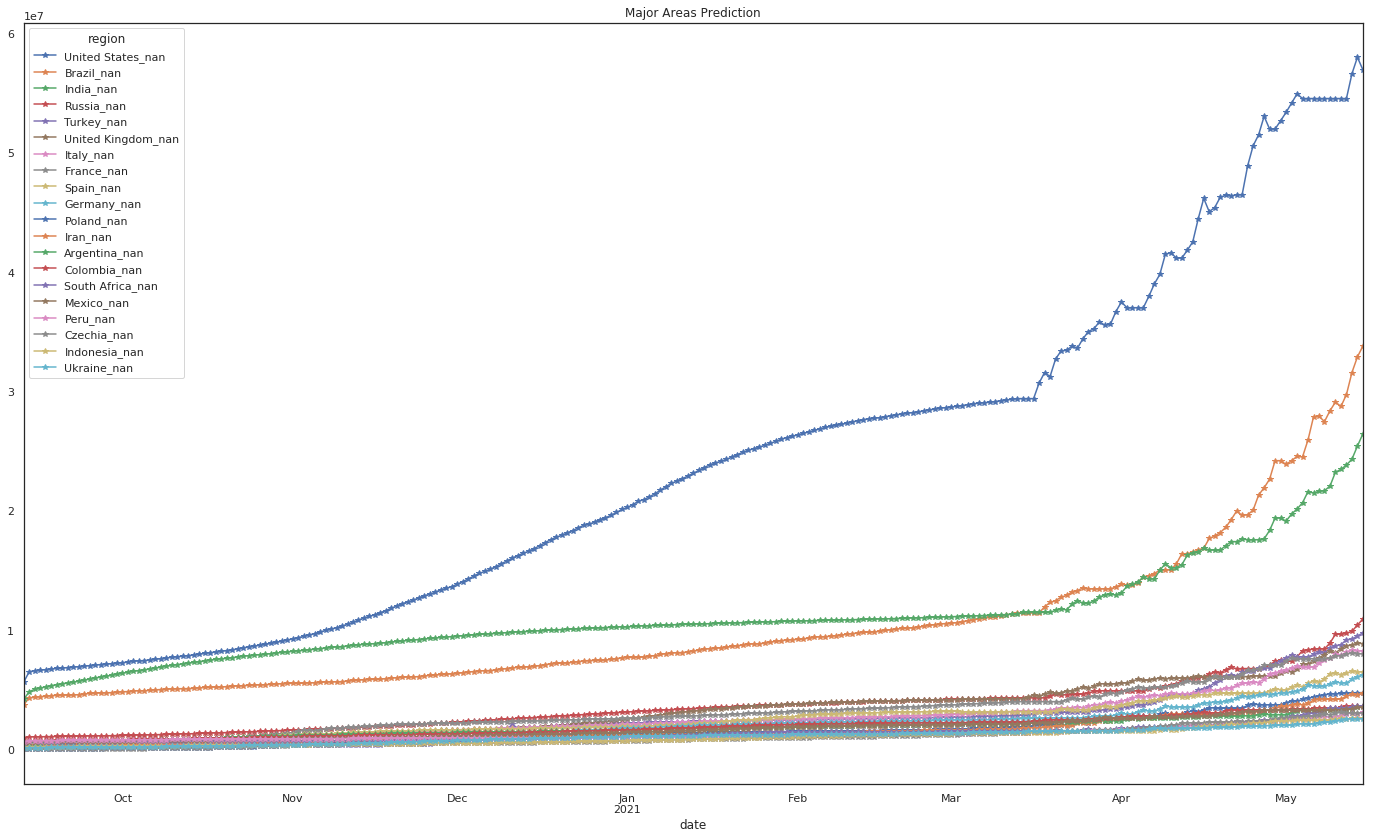

In [77]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

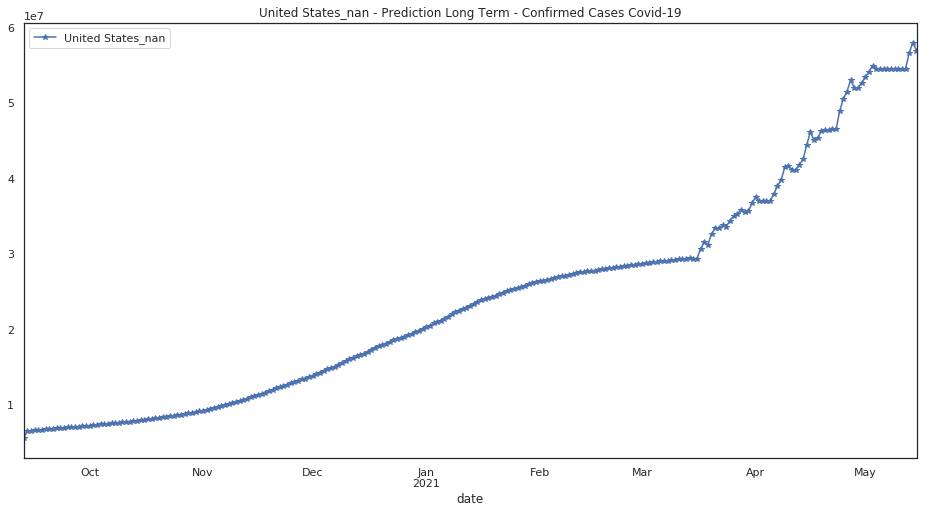

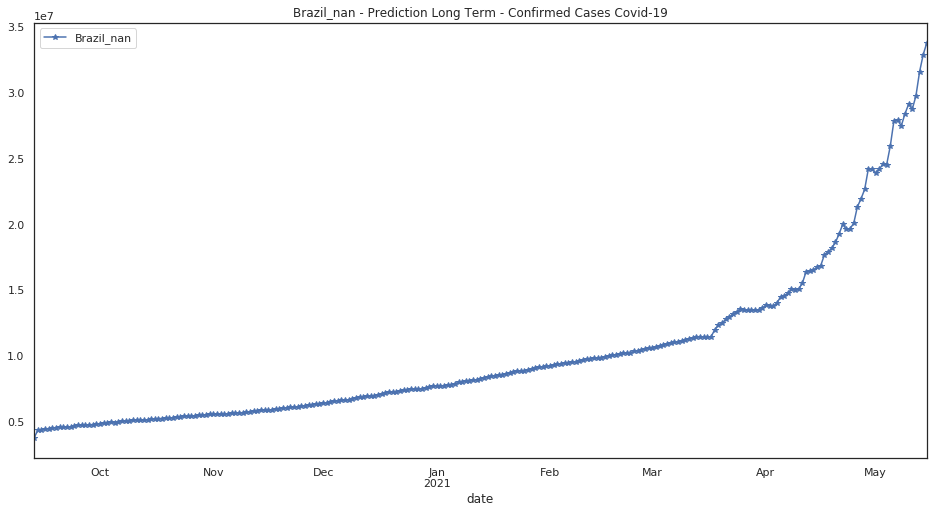

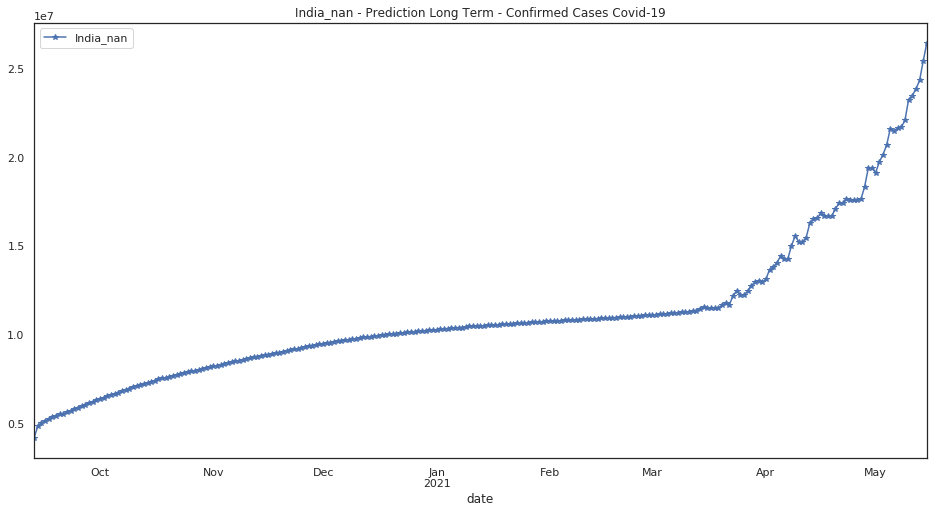

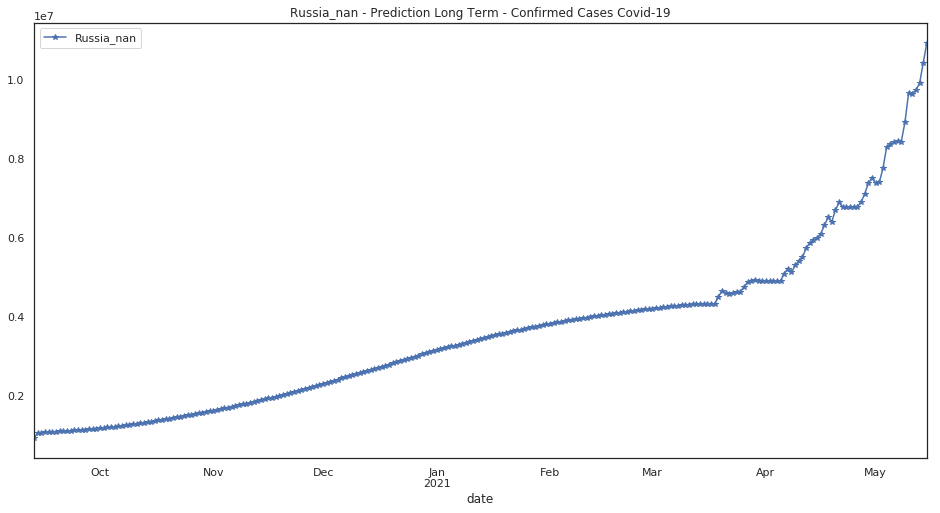

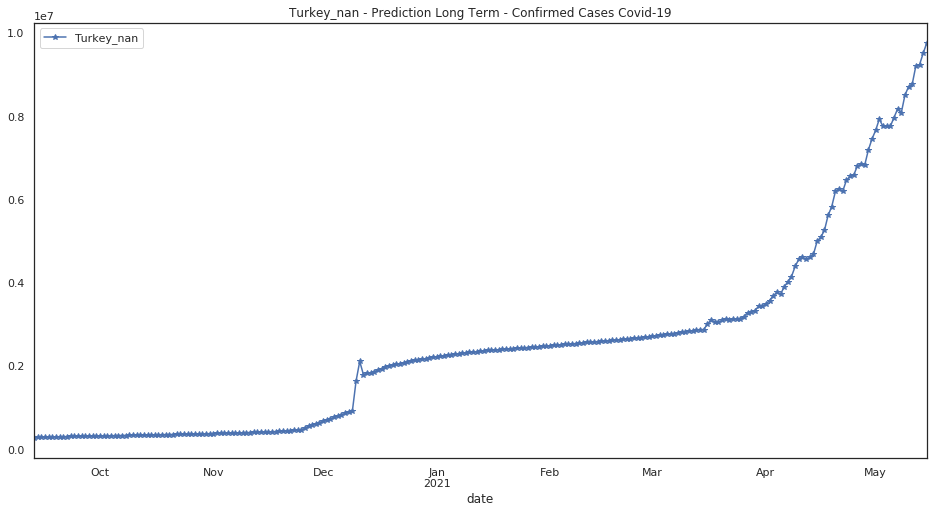

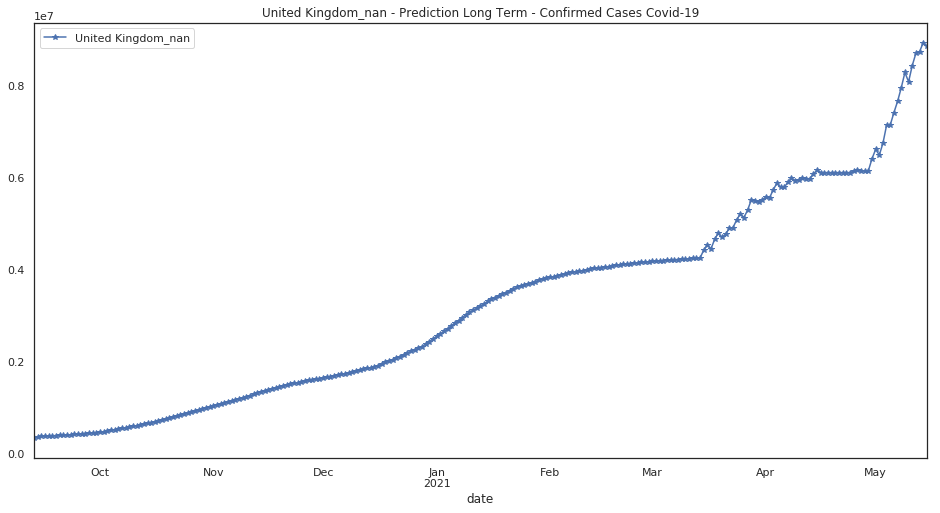

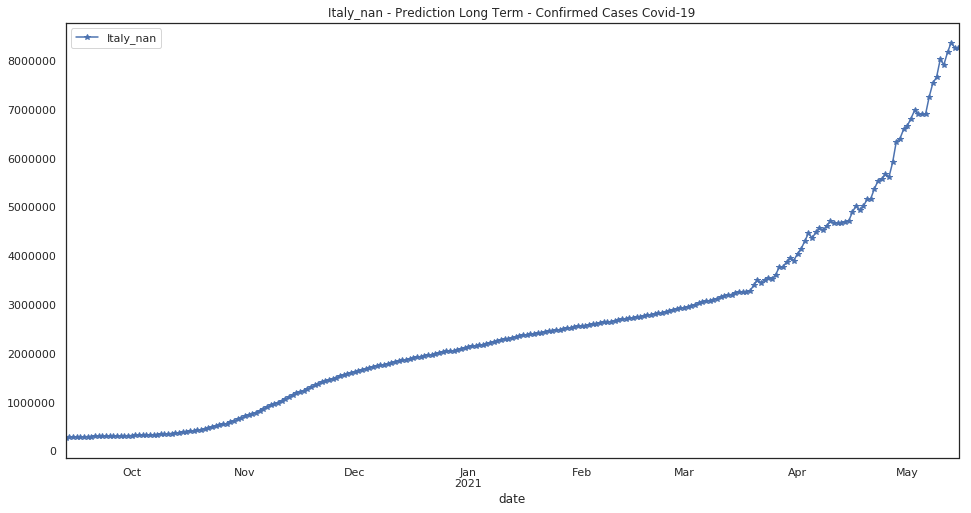

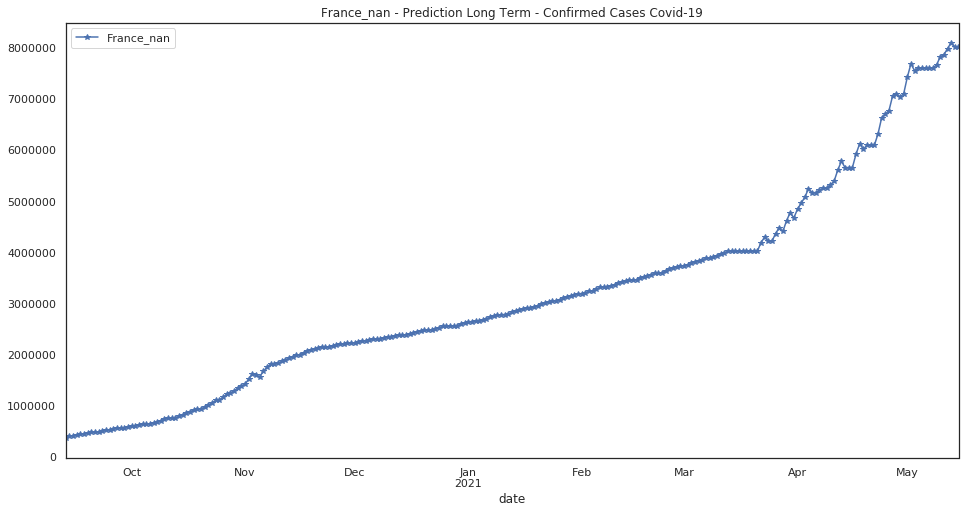

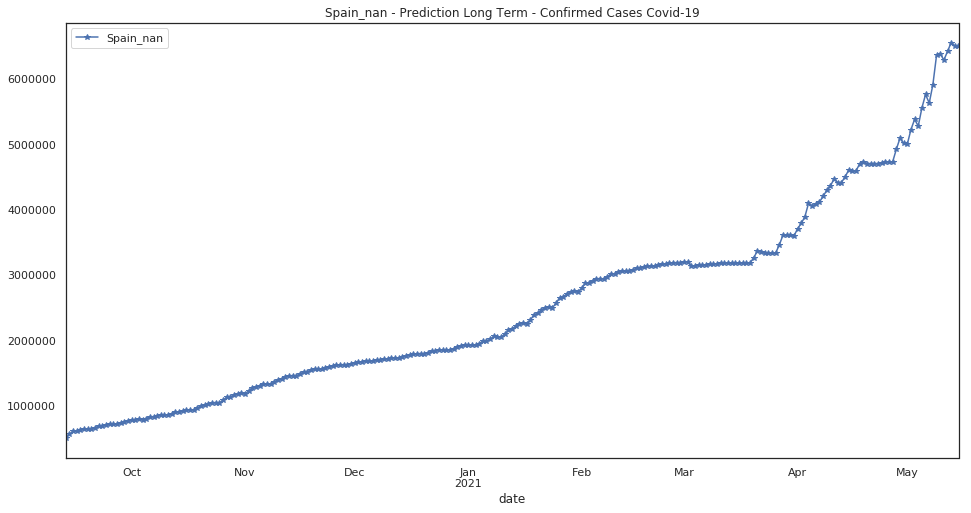

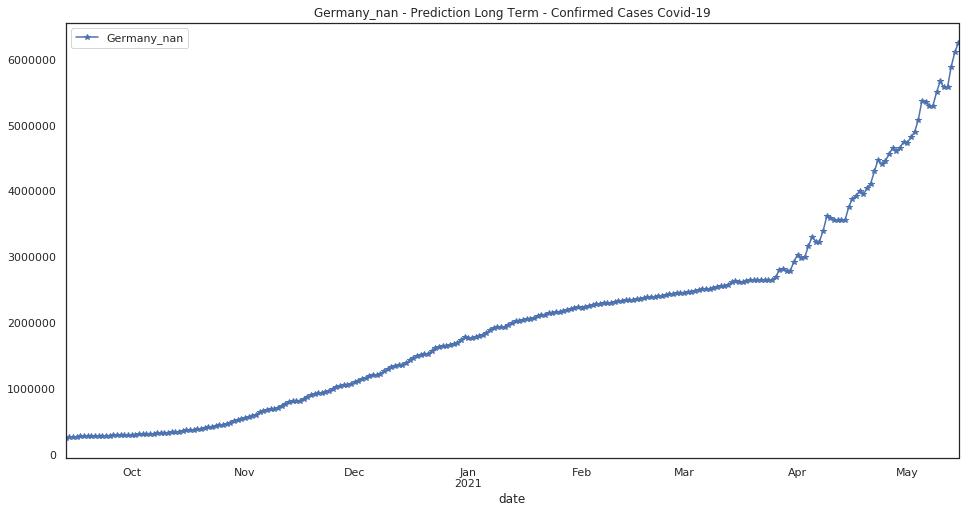

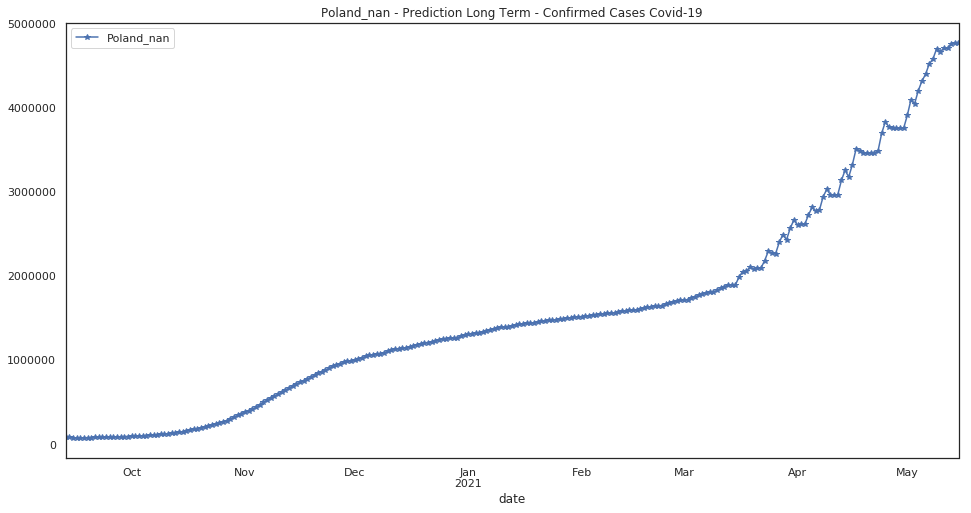

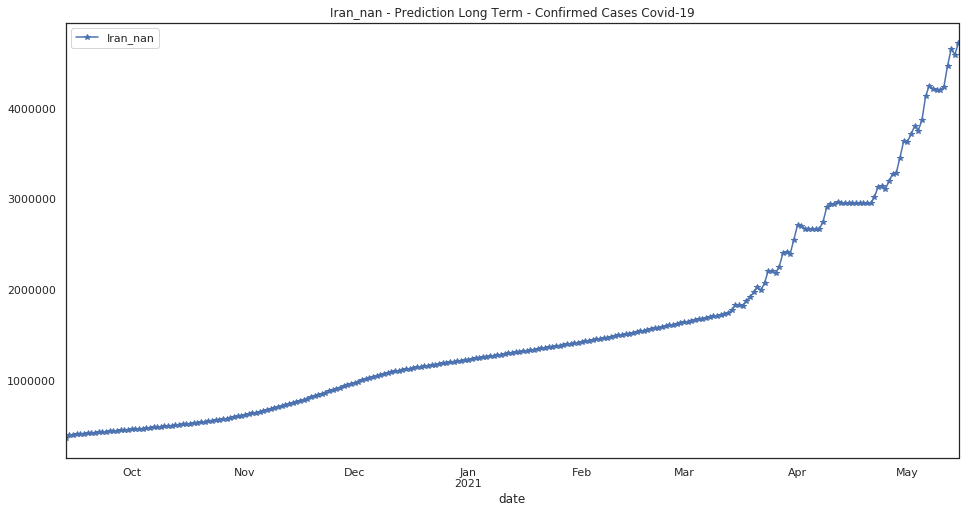

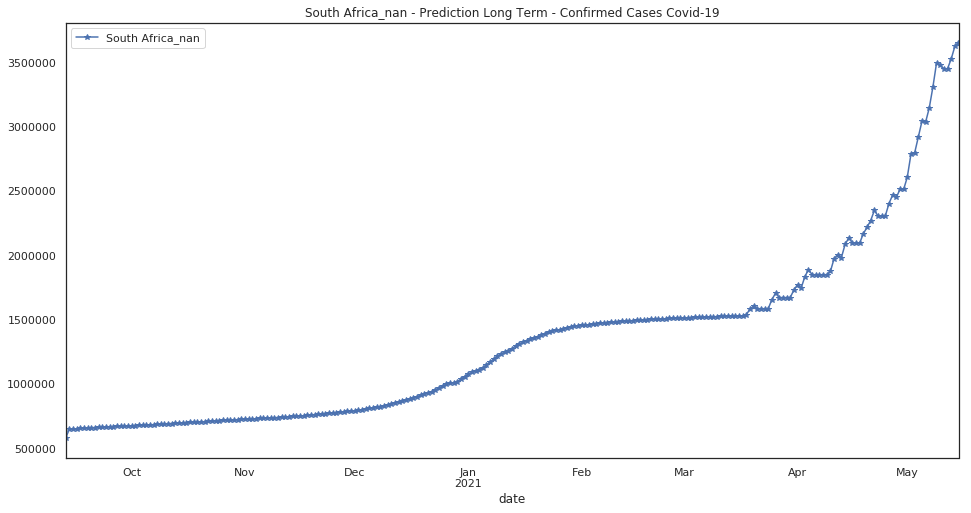

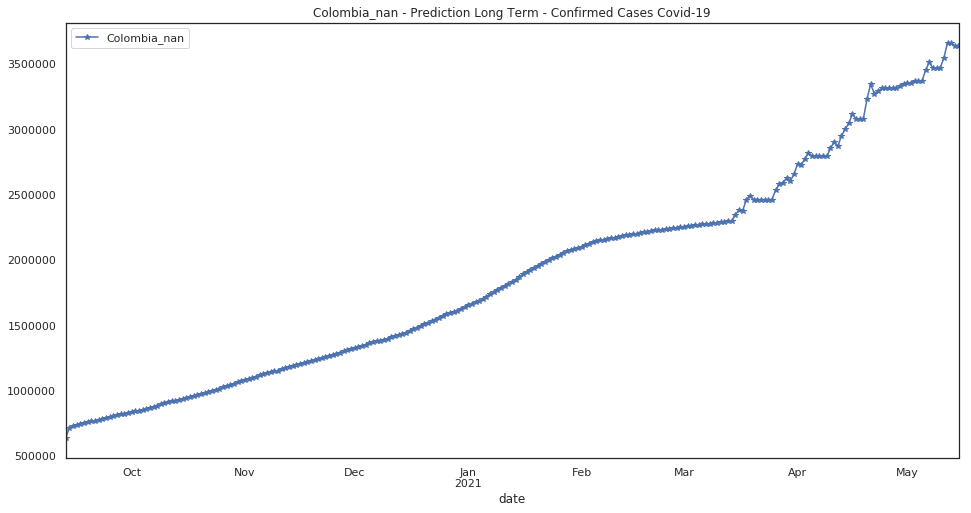

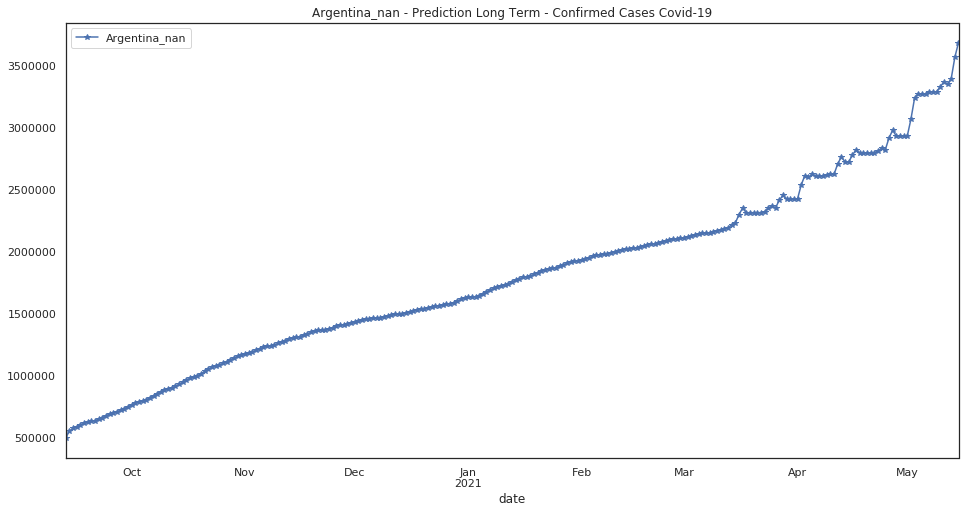

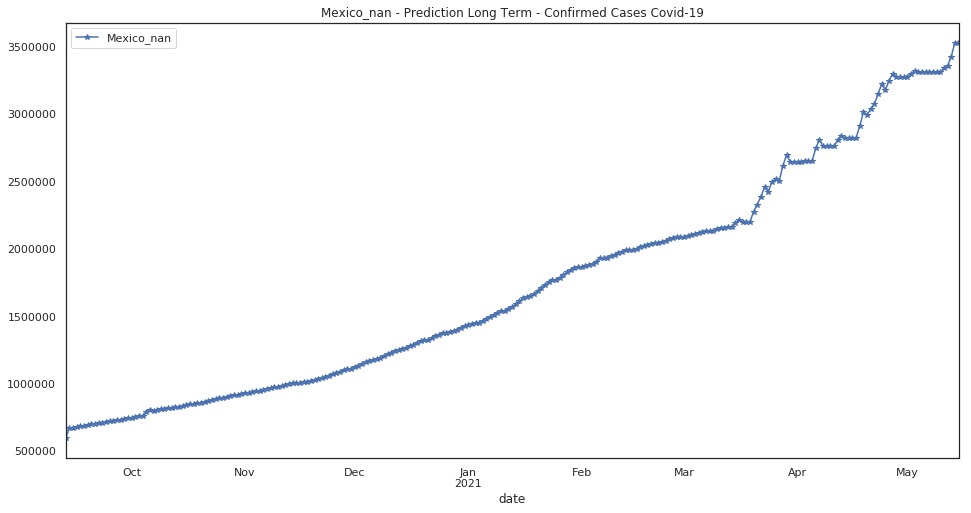

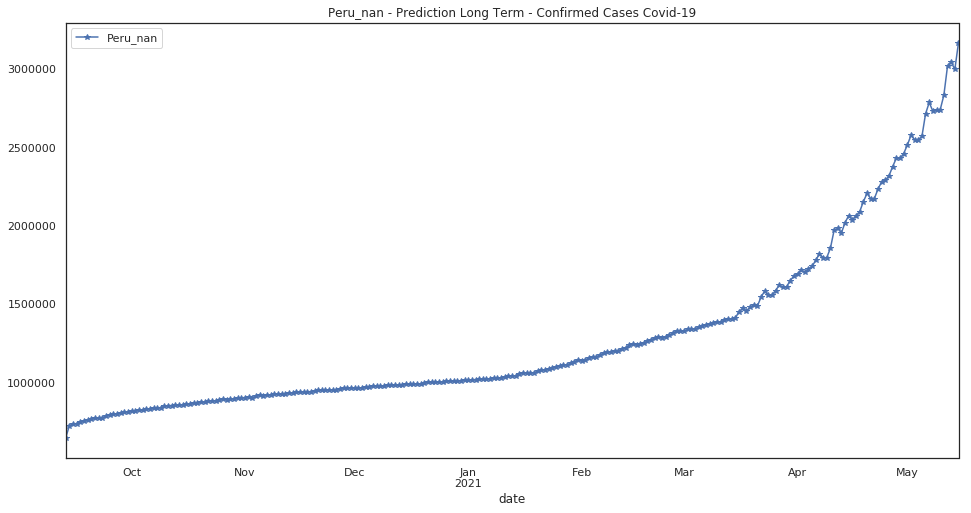

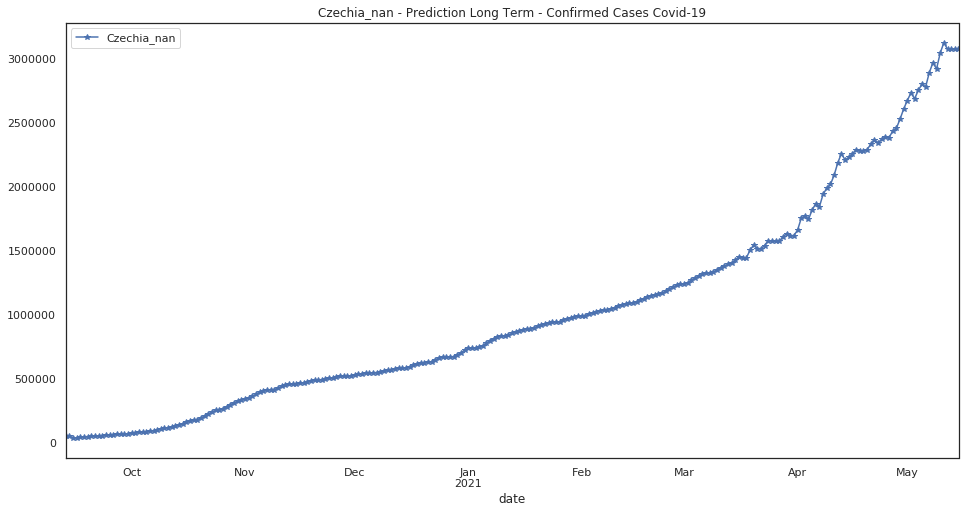

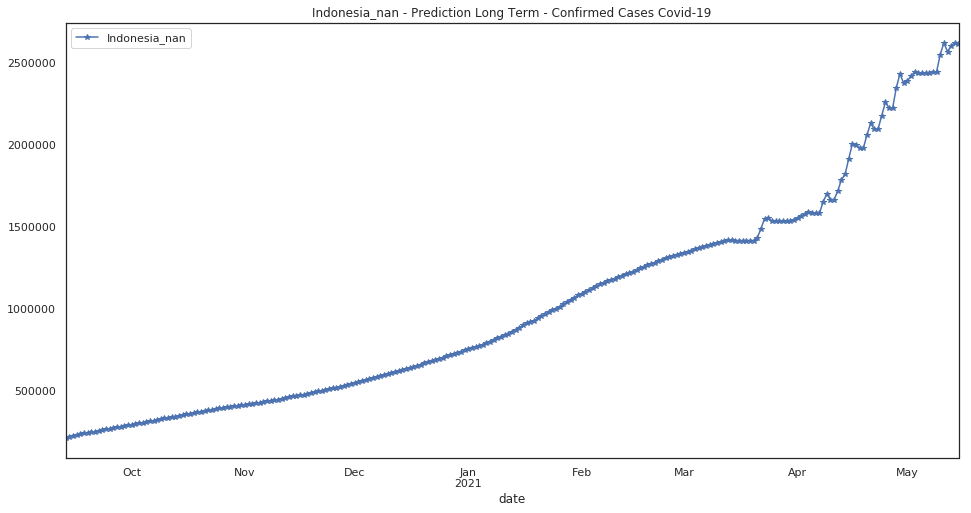

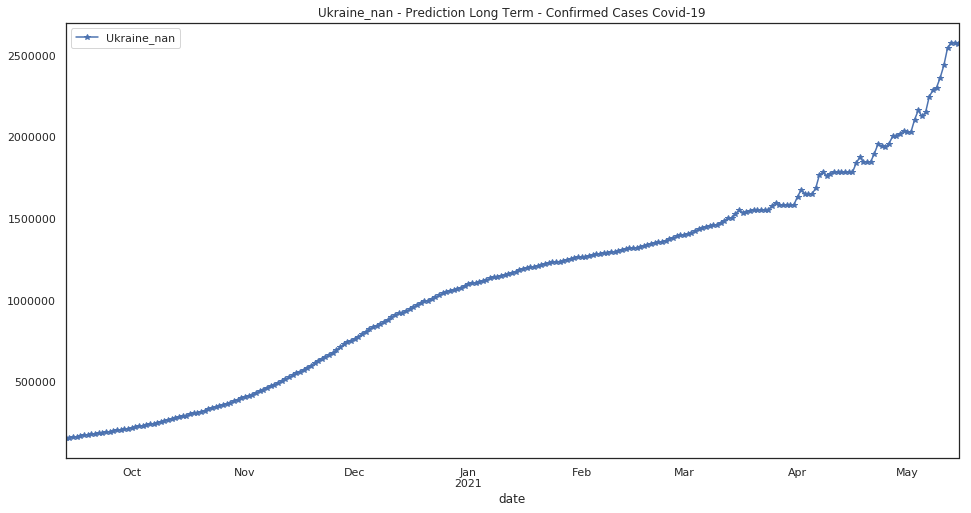

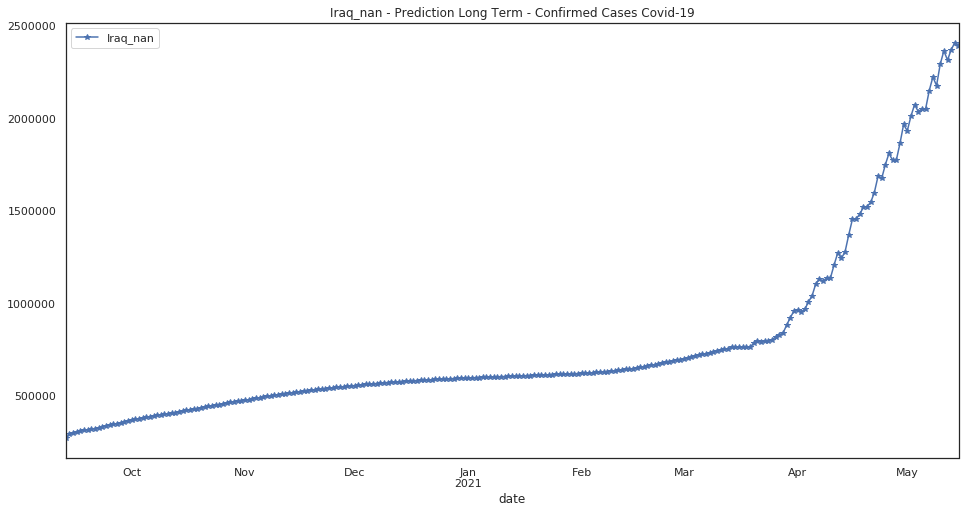

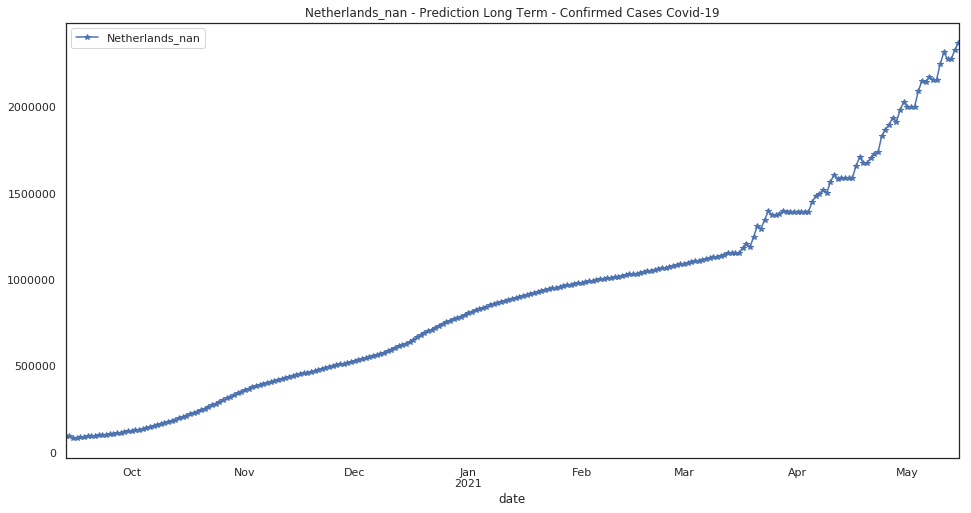

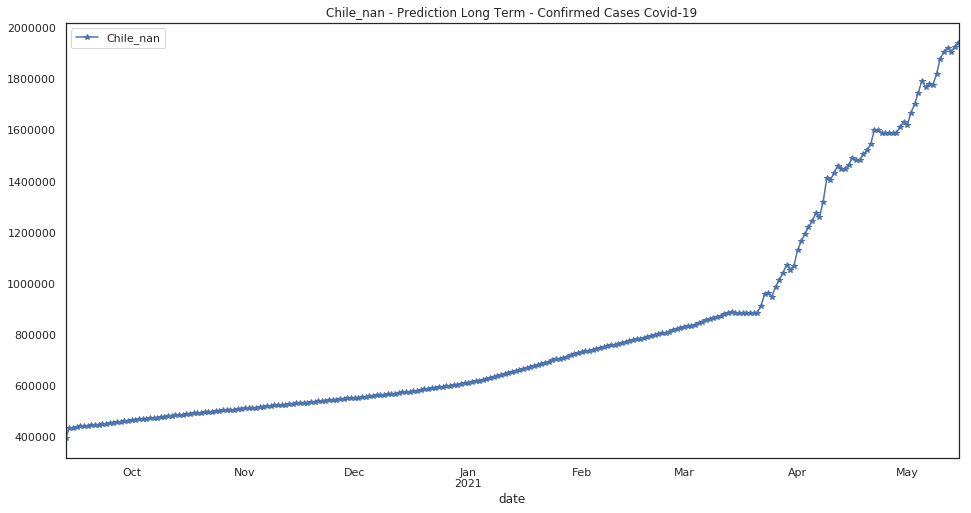

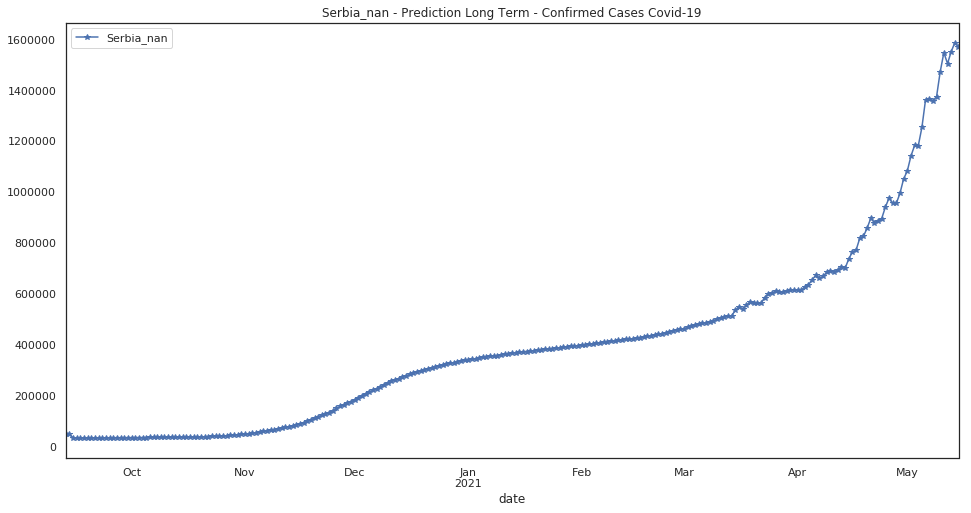

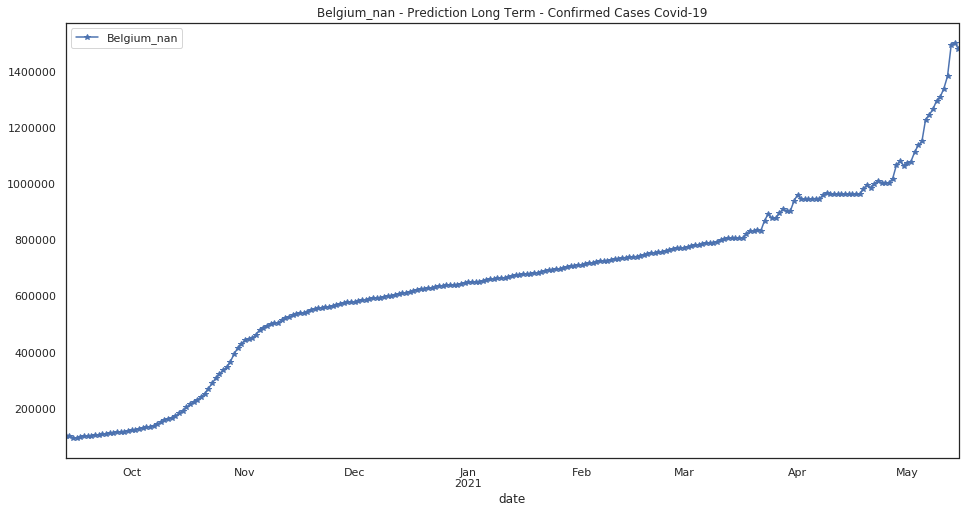

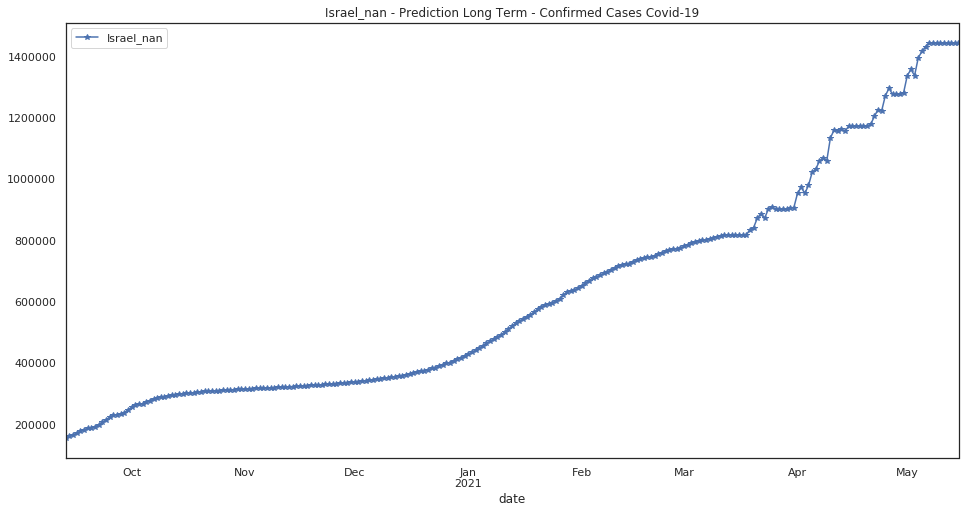

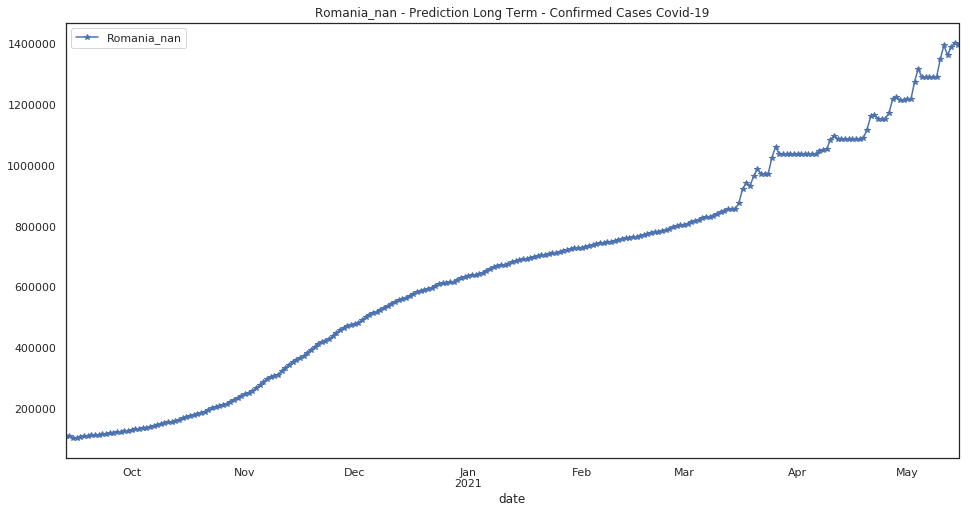

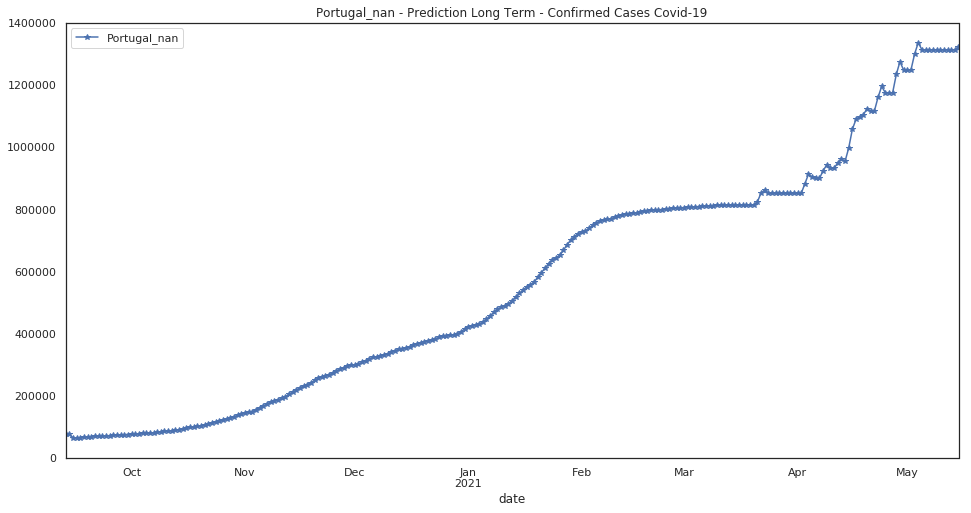

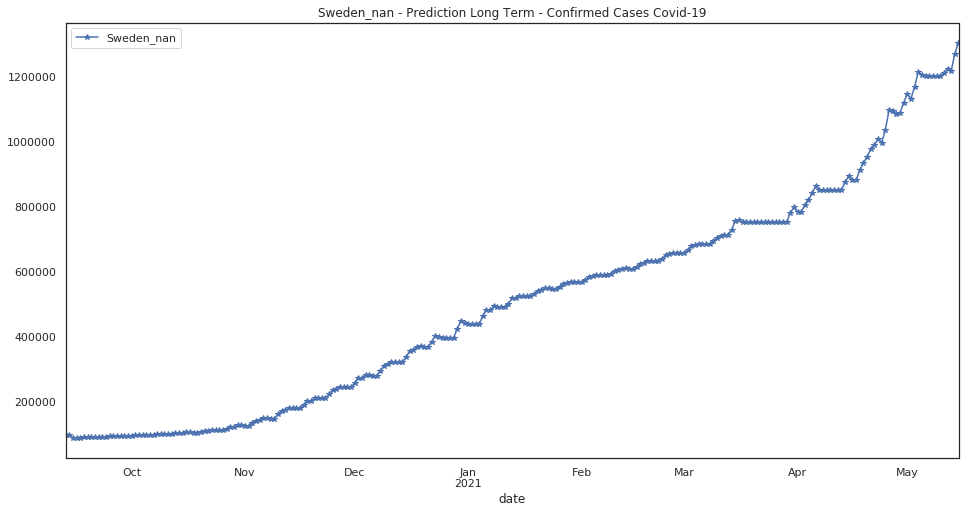

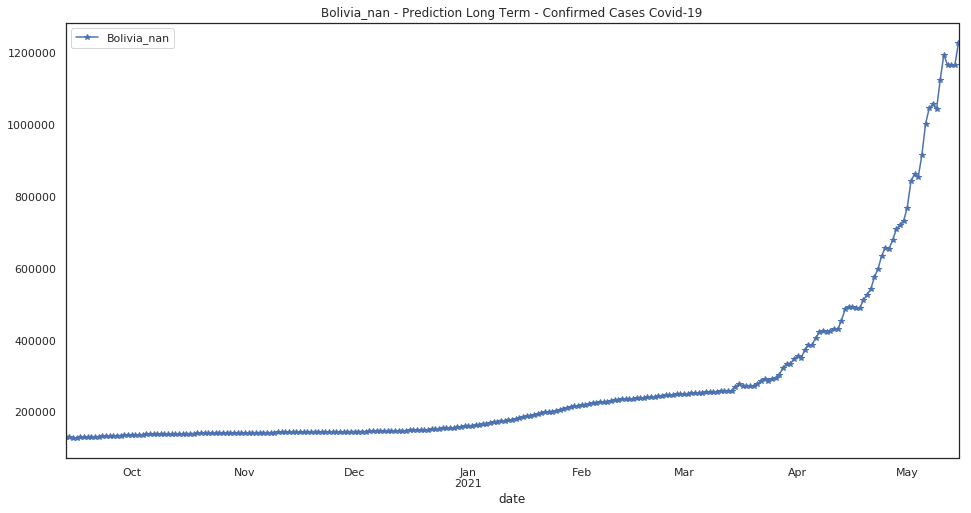

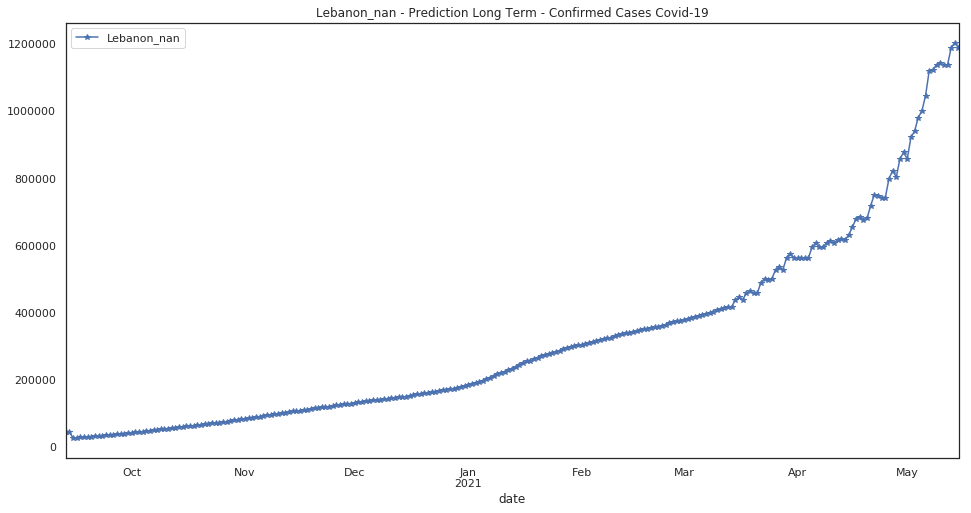

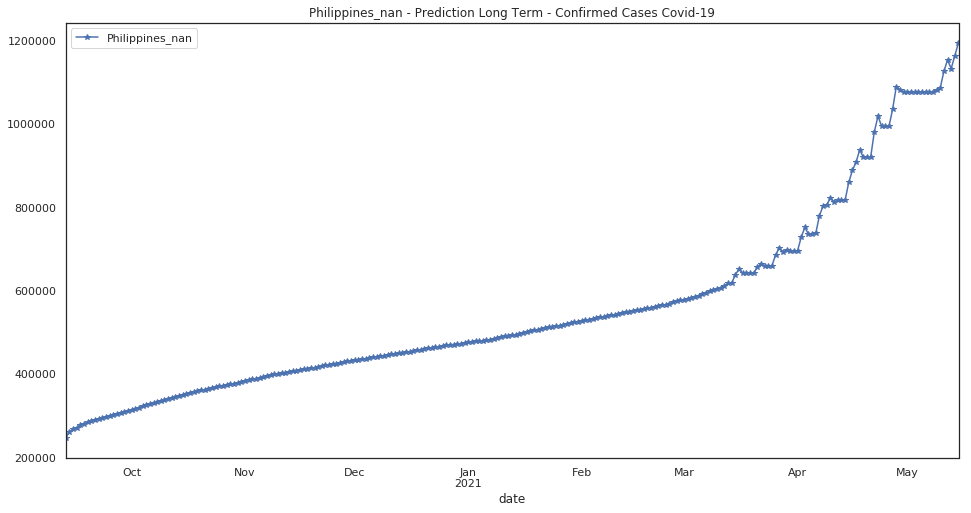

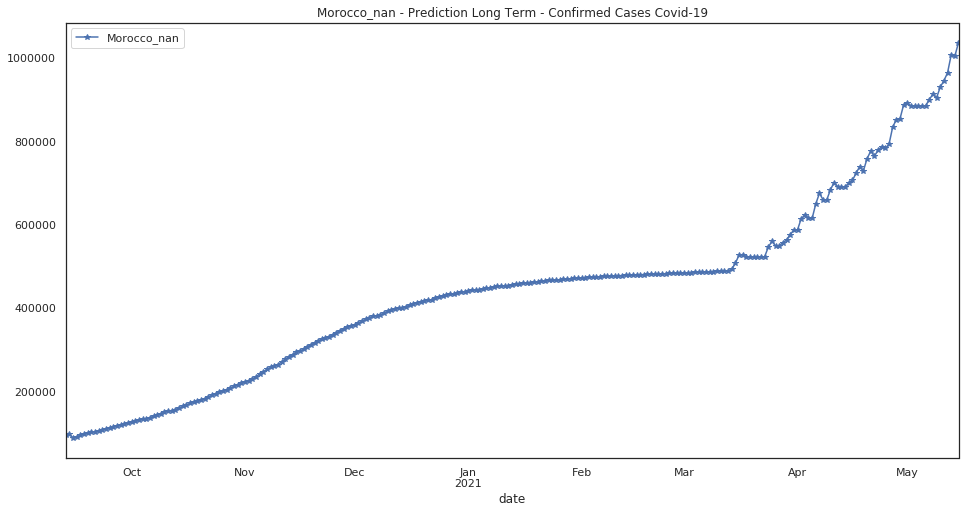

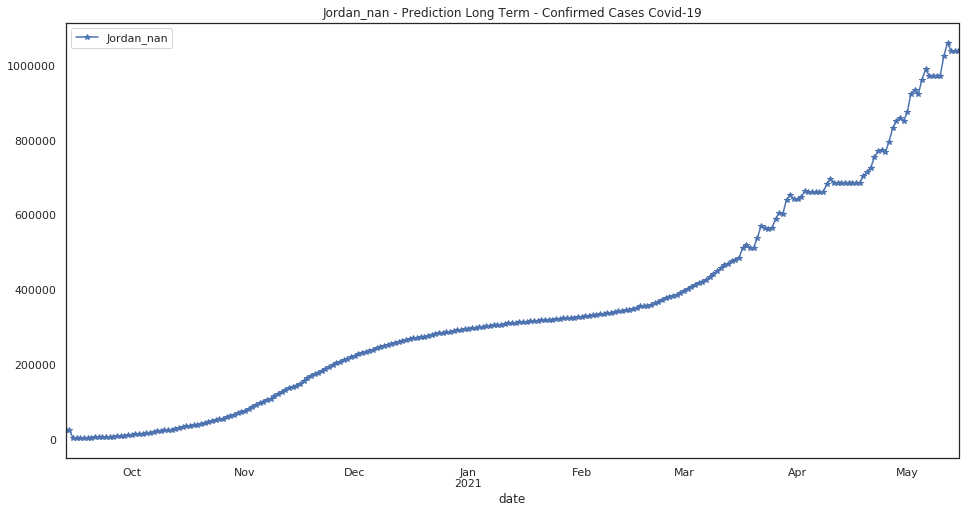

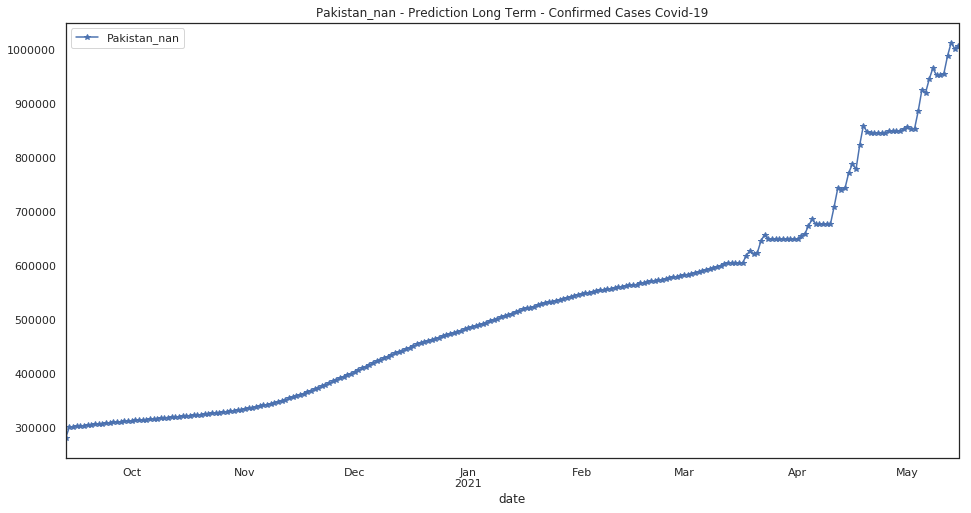

In [78]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

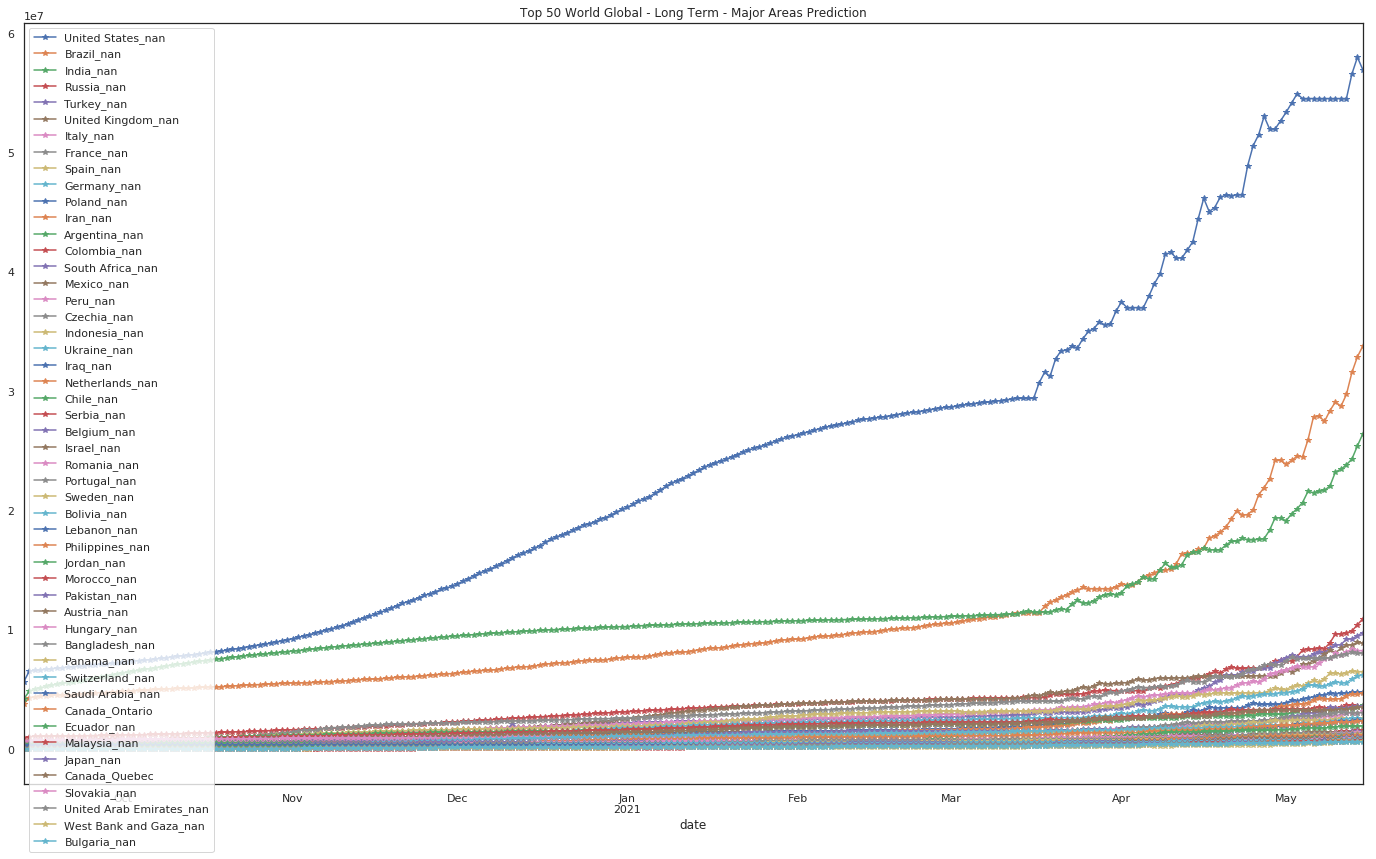

In [79]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

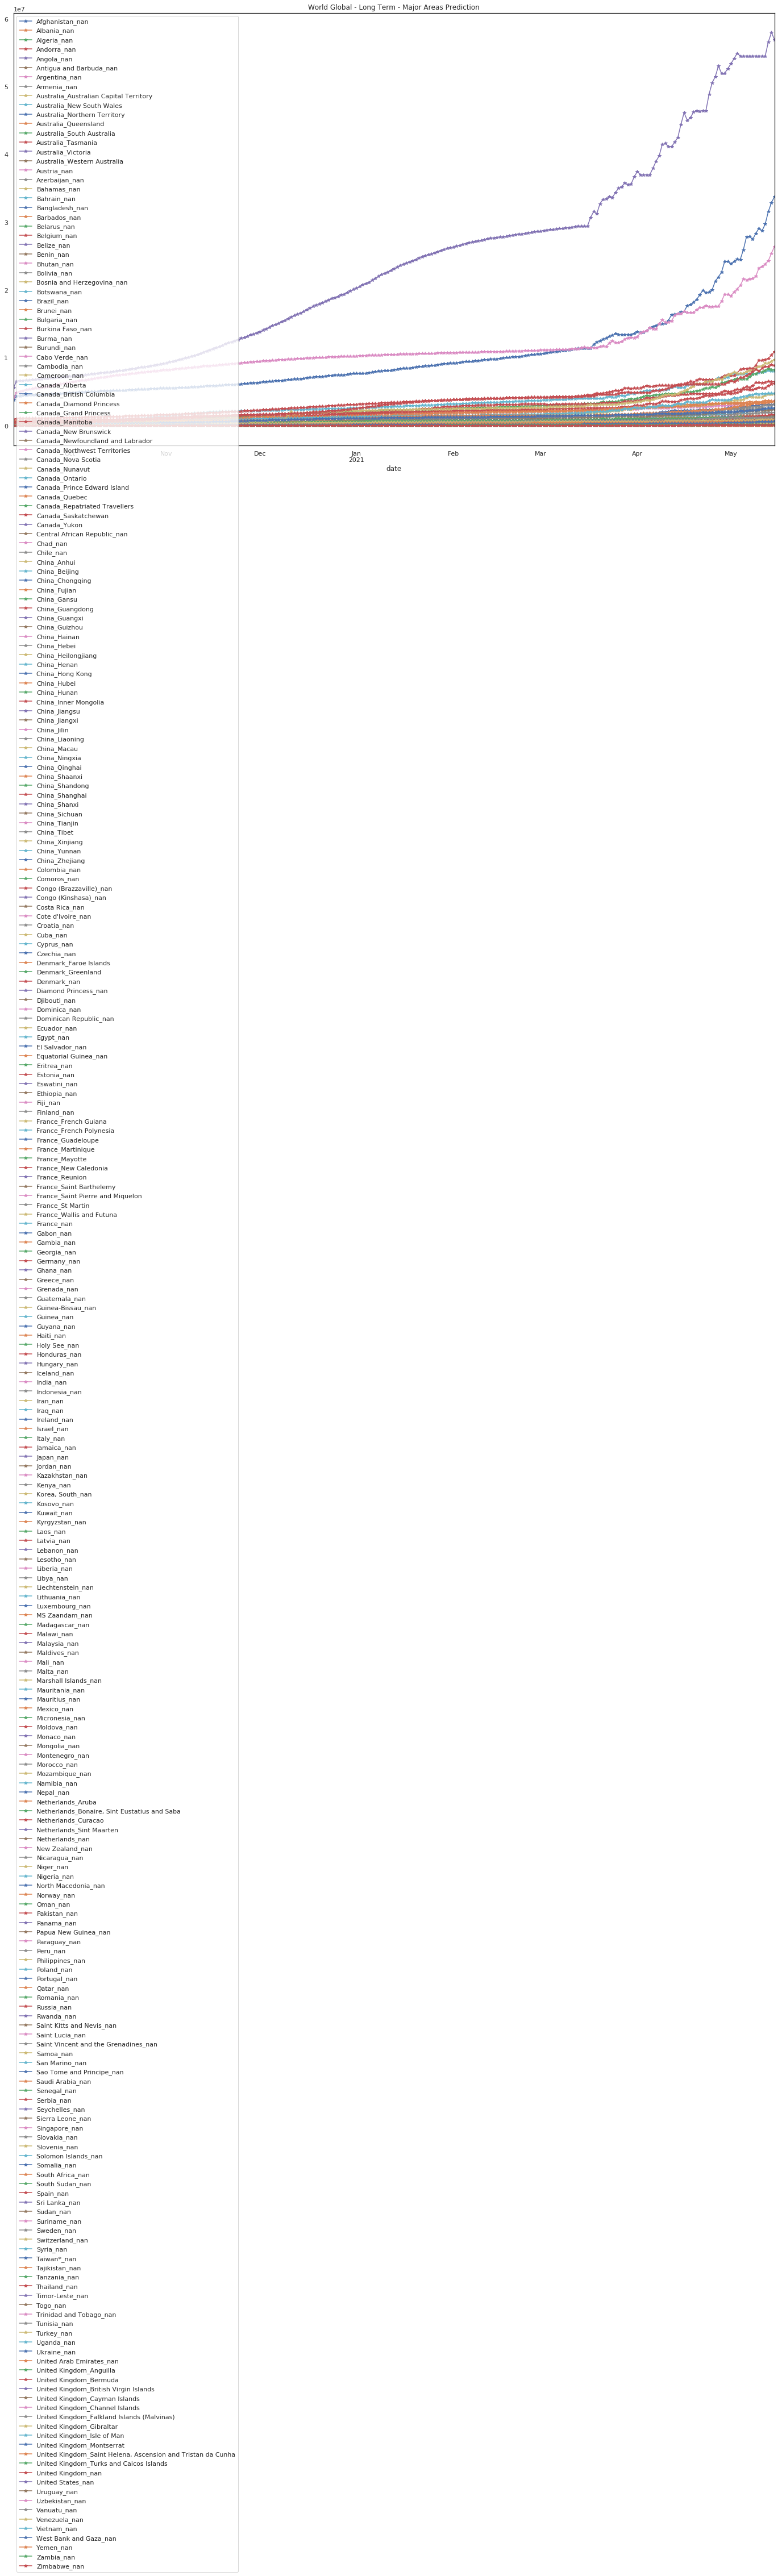

In [80]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [81]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [82]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-10-28          41295.0      20051.0      57144.0       4566.0   
2020-10-29          41420.0      20314.0      57455.0       4568.0   
2020-10-30          41494.0      20655.0      57773.0       4808.0   
2020-10-31          41586.0      20881.0      58069.0       4665.0   
2020-11-01          41659.0      21246.0      58388.0       4764.0   
2020-11-02          41780.0      21515.0      58694.0       4956.0   
2020-11-03          41878.0      21895.0      59081.0       4962.0   
2020-11-04          41970.0      22270.0      59618.0       5224.0   
2020-11-05          42090.0      22690.0      60261.0       5045.0   
2020-11-06          42136.0      23170.0      60910.0       5135.0   
2020-11-07          42197.0      23638.0      61502.0       5617.0   
2020-11-08          42310.0      24149.0      62146.0       5319.0   
2020-11-09          42437.0      24680.0      62783.0       5499.0   
2020-11-10          42607.0      25230.0      63504.0       5610.0   
2020-11-11          42760.0      25734.0      64312.0       5680.0   
2020-11-12          42942.0      26190.0      65161.0       5567.0   
2020-11-13          43115.0      26705.0      66038.0       5801.0   
2020-11-14          43192.0      27184.0      66885.0       5725.0   
2020-11-15          43381.0      27759.0      67732.0       6115.0   
2020-11-16          43589.0      28358.0      68629.0       5872.0   
2020-11-17          43803.0      29056.0      69614.0       6069.0   
2020-11-18          44056.0      29749.0      70659.0       6167.0   
2020-11-19          44304.0      30534.0      71692.0       6070.0   
2020-11-20          44498.0      31354.0      72785.0       6215.0   
2020-11-21          44648.0      32102.0      73823.0       6196.0   
2020-11-22          44833.0      32728.0      74882.0       6291.0   
2020-11-23          45094.0      33522.0      75903.0       6390.0   
2020-11-24          45293.0      34196.0      76997.0       6429.0   
2020-11-25          45514.0      34874.0      78058.0       6499.0   
2020-11-26          45730.0      35570.0      79117.0       6512.0   
...                     ...          ...          ...          ...   
2021-04-16          73744.0     179846.0     158103.0      14848.0   
2021-04-17          73744.0     183899.0     160599.0      15105.0   
2021-04-18          75839.0     188344.0     165739.0      15105.0   
2021-04-19          78933.0     195083.0     169096.0      14957.0   
2021-04-20          79460.0     198072.0     166640.0      14957.0   
2021-04-21          82508.0     195460.0     166640.0      15447.0   
2021-04-22          83601.0     197121.0     166640.0      15416.0   
2021-04-23          82815.0     197811.0     166640.0      15635.0   
2021-04-24          82815.0     197811.0     166640.0      15635.0   
2021-04-25          82815.0     205014.0     171215.0      15523.0   
2021-04-26          84263.0     209258.0     174219.0      15944.0   
2021-04-27          89275.0     211911.0     176464.0      15905.0   
2021-04-28          90572.0     214791.0     178599.0      16115.0   
2021-04-29          89930.0     212812.0     176967.0      16106.0   
2021-04-30          89791.0     212812.0     182575.0      16067.0   
2021-05-01          89652.0     212812.0     191271.0      16039.0   
2021-05-02          94200.0     212812.0     192242.0      16193.0   
2021-05-03          96087.0     212812.0     190516.0      16102.0   
2021-05-04          98493.0     212812.0     198441.0      16275.0   
2021-05-05         100157.0     212945.0     202952.0      16372.0   
2021-05-06          99064.0     218948.0     200371.0      16948.0   
2021-05-07          99064.0     222286.0     205075.0      17073.0   
2021-05-08         101890.0     224333.0     207914.0      17593.0   
2021-05-09         103239.0     226839.0     210064.0      18255.0   
2021-05-10

In [83]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [84]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [85]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [86]:
heatmap_m[:]

region        Lat        Long  \
0                                      Afghanistan_nan  33.939110   67.709953   
1                                          Albania_nan  41.153300   20.168300   
2                                          Algeria_nan  28.033900    1.659600   
3                                          Andorra_nan  42.506300    1.521800   
4                                           Angola_nan -11.202700   17.873900   
5                              Antigua and Barbuda_nan  17.060800  -61.796400   
6                                        Argentina_nan -38.416100  -63.616700   
7                                          Armenia_nan  40.069100   45.038200   
8               Australia_Australian Capital Territory -35.473500  149.012400   
9                            Australia_New South Wales -33.868800  151.209300   
10                        Australia_Northern Territory -12.463400  130.845600   
11                                Australia_Queensland -27.469800  153.025100   
12                           Australia_South Australia -34.928500  138.600700   
13                                  Australia_Tasmania -42.882100  147.327200   
14                                  Australia_Victoria -37.813600  144.963100   
15                         Australia_Western Australia -31.950500  115.860500   
16                                         Austria_nan  47.516200   14.550100   
17                                      Azerbaijan_nan  40.143100   47.576900   
18                                         Bahamas_nan  25.025885  -78.035889   
19                                         Bahrain_nan  26.027500   50.550000   
20                                      Bangladesh_nan  23.685000   90.356300   
21                                        Barbados_nan  13.193900  -59.543200   
22                                         Belarus_nan  53.709800   27.953400   
23                                         Belgium_nan  50.833300    4.469936   
24                                          Belize_nan  17.189900  -88.497600   
25                                           Benin_nan   9.307700    2.315800   
26                                          Bhutan_nan  27.514200   90.433600   
27                                         Bolivia_nan -16.290200  -63.588700   
28                          Bosnia and Herzegovina_nan  43.915900   17.679100   
29                                        Botswana_nan -22.328500   24.684900   
..                                                 ...        ...         ...   
250                                    Timor-Leste_nan  -8.874217  125.727539   
251                                           Togo_nan   8.619500    0.824800   
252                            Trinidad and Tobago_nan  10.691800  -61.222500   
253                                        Tunisia_nan  33.886917    9.537499   
254                                         Turkey_nan  38.963700   35.243300   
255                                  United States_nan  40.000000 -100.000000   
256                                         Uganda_nan   1.373333   32.290275   
257                                        Ukraine_nan  48.379400   31.165600   
258                           United Arab Emirates_nan  23.424076   53.847818   
259                            United Kingdom_Anguilla  18.220600  -63.068600   
260                             United Kingdom_Bermuda  32.307800  -64.750500   
261              United Kingdom_British Virgin Islands  18.420700  -64.640000   
262                      United Kingdom_Cayman Islands  19.313300  -81.254600   
263                     United Kingdom_Channel Islands  49.372300   -2.364400   
264         United Kingdom_Falkland Islands (Malvinas) -51.796300  -59.523600   
265                           United Kingdom_Gibraltar  36.140800   -5.353600   
266                         United Kingdom_Isle of Man  54.236100   -4.548100   
267                          United Kingdom_Montserrat  16.742498  -62.187366  

In [87]:
# Fill empty lat,long with 0
heatmap_m['Lat']=heatmap_m['Lat'].fillna(0)
heatmap_m['Long']=heatmap_m['Long'].fillna(0)
#
heatmap_m_fn="heatmap_m_"+str(num_days_R_prediction)+".csv"
heatmap_m.to_csv(r'data/'+heatmap_m_fn, index = False, header=True)

In [88]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat,lng,num,totpred,ldaygrowth in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]],  (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg ):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred))+' Roling7DayAVG='+str(round(ldaygrowth))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [89]:
# Top 50 Regions in the World impacted
#
max_cont=max_countries_map
region_m2=region[:max_cont]
#
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region        Lat        Long  \
0       6             Argentina_nan -38.416100  -63.616700   
1      16               Austria_nan  47.516200   14.550100   
2      20            Bangladesh_nan  23.685000   90.356300   
3      23               Belgium_nan  50.833300    4.469936   
4      27               Bolivia_nan -16.290200  -63.588700   
5      30                Brazil_nan -14.235000  -51.925300   
6      32              Bulgaria_nan  42.733900   25.485800   
7      51            Canada_Ontario  51.253800  -85.323200   
8      53             Canada_Quebec  52.939900  -73.549100   
9      59                 Chile_nan -35.675100  -71.543000   
10     93              Colombia_nan   4.570900  -74.297300   
11    102               Czechia_nan  49.817500   15.473000   
12    110               Ecuador_nan  -1.831200  -78.183400   
13    131                France_nan  46.227600    2.213700   
14    136               Germany_nan  51.165691   10.451526   
15    148               Hungary_nan  47.162500   19.503300   
16    150                 India_nan  20.593684   78.962880   
17    151             Indonesia_nan  -0.789300  113.921300   
18    152                  Iran_nan  32.427908   53.688046   
19    153                  Iraq_nan  33.223191   43.679291   
20    155                Israel_nan  31.046051   34.851612   
21    156                Israel_nan  31.046051   34.851612   
22    157                 Italy_nan  41.871940   12.567380   
23    159                 Japan_nan  36.204824  138.252924   
24    160                Jordan_nan  31.240000   36.510000   
25    169               Lebanon_nan  33.854700   35.862300   
26    170               Lebanon_nan  33.854700   35.862300   
27    180              Malaysia_nan   4.210484  101.975766   
28    187                Mexico_nan  23.634500 -102.552800   
29    193               Morocco_nan  31.791700   -7.092600   
30    201           Netherlands_nan  52.132600    5.291300   
31    209              Pakistan_nan  30.375300   69.345100   
32    210                Panama_nan   8.538000  -80.782100   
33    213                  Peru_nan  -9.190000  -75.015200   
34    214           Philippines_nan  12.879721  121.774017   
35    215                Poland_nan  51.919400   19.145100   
36    216              Portugal_nan  39.399900   -8.224500   
37    218               Romania_nan  45.943200   24.966800   
38    219                Russia_nan  61.524010  105.318756   
39    227          Saudi Arabia_nan  23.885942   45.079162   
40    229                Serbia_nan  44.016500   21.005900   
41    233              Slovakia_nan  48.669000   19.699000   
42    237          South Africa_nan -30.559500   22.937500   
43    239                 Spain_nan  40.463667   -3.749220   
44    243                Sweden_nan  60.128161   18.643501   
45    244           Switzerland_nan  46.818200    8.227500   
46    254                Turkey_nan  38.963700   35.243300   
47    255         United States_nan  40.000000 -100.000000   
48    257               Ukraine_nan  48.379400   31.165600   
49    258  United Arab Emirates_nan  23.424076   53.847818   
50    270        United Kingdom_nan  55.378100   -3.436000   
51    276    West Bank and Gaza_nan  31.952200   35.233200   

    2020-09-13 00:00:00  2020-09-14 00:00:00  2020-09-15 00:00:00  \
0              500278.0             555537.0             576919.0   
1               50151.0              50480.0              33541.0   
2              312415.0             337520.0             339332.0   
3              102107.0             102840.0              94306.0   
4              130832.0             131546.0             127619.0   
5             3753088.0            4330455.0            4380660.0   
6               37018.0              37141.0              18061.0   
7               61633.0              61995.0              46905.0   
8               77576.0              77813.0              65262.0   
9              396196.0    

In [90]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat2,lng2,num2,totpred2,ldaygrowth2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg ):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred2))+' Roling7DayAVG='+str(round(ldaygrowth2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [91]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [92]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [93]:
exit()